In [1]:
source('functions.R')

DATASET_FILENAME = './combined.csv'

MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily",
               "ElemStatLearn")

install.packages('e1071')
library(caret)
library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)

Warning message in install.packages("e1071"):
“installation of package ‘e1071’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice



used    (Mb)  gc trigger (Mb)  max used (Mb)
Ncells 2295185 122.6 4479851    239.3 3556699  190 
Vcells 3928930  30.0 8388608     64.0 7469874   57

null device 
          1

Warning message:
“package ‘ElemStatLearn’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ElemStatLearn’”
Warning message in pacman::p_load(char = MYLIBRARIES, install = TRUE, character.only = TRUE):
“Failed to install/load:
ElemStatLearn”


# Load a passenger satisfaction dataset 

### Load 2 version of a Airline passenger satisfaction dataset

In this project we will be using 2 version of datset to analyse the passenger satisfaction to the airline.
Starting from combinding both version together.

 

In [2]:
dataset1<-NreadDataset('./dataset/satisfaction.csv')
dataset2<-NreadDataset('./dataset/satisfaction_2015.csv')

[1] "CSV dataset ./dataset/satisfaction.csv has been read. Records= 129880"
[1] "CSV dataset ./dataset/satisfaction_2015.csv has been read. Records= 129880"


### Check the similar field in both dataset 

Before merging both datasets together, It is necessary for both dataset to have same number of columns with the same name and attribute.


In [3]:
# remove ID field which index is at 1 (-1 will remove index at position 1 )
dataset1 = dataset1[, -which(names(dataset1) %in% c('id'))]
dataset2 = dataset2[, -which(names(dataset2) %in% c('id'))]

print(paste("Names of Similar fields : ",names(dataset1[,(names(dataset1) %in% names(dataset2))])))

 [1] "Names of Similar fields :  satisfactionv2"                
 [2] "Names of Similar fields :  Gender"                        
 [3] "Names of Similar fields :  CustomerType"                  
 [4] "Names of Similar fields :  Age"                           
 [5] "Names of Similar fields :  TypeofTravel"                  
 [6] "Names of Similar fields :  Class"                         
 [7] "Names of Similar fields :  FlightDistance"                
 [8] "Names of Similar fields :  Seatcomfort"                   
 [9] "Names of Similar fields :  DepartureArrivaltimeconvenient"
[10] "Names of Similar fields :  Foodanddrink"                  
[11] "Names of Similar fields :  Gatelocation"                  
[12] "Names of Similar fields :  Inflightwifiservice"           
[13] "Names of Similar fields :  Inflightentertainment"         
[14] "Names of Similar fields :  EaseofOnlinebooking"           
[15] "Names of Similar fields :  Onboardservice"                
[16] "Names of Similar fi

### Check different in both Dataframe



In [4]:
# Field that dataset 1 have but dataset 2 doesnt have
diff1<-names(dataset1)[-which(names(dataset1) %in% names(dataset2))]

# Field that dataset 2 have but dataset 1 doesnt have 
diff2<-names(dataset2)[-which(names(dataset2) %in% names(dataset1))]
differ <-c(diff1,diff2)
print(paste("Name of different fields : ",differ))

[1] "Name of different fields :  Onlinesupport"  
[2] "Name of different fields :  Inflightservice"


We can see that both of version of dataset contains 1 different fields each that are ***('Onlinesupport')*** and ***('Inflightservice')*** and other remaining 22 fields are simlar to each others with the same name and attributes.


### Field a different with NA and combine both dataset

Since both dataset different columns, we decide to fill a NA values to a columns in a does not exist in each dataset. So that both dataset have same number of columns and be able to merge.

In [5]:
dataset1[setdiff(names(dataset2), names(dataset1))] <- NA
dataset2[setdiff(names(dataset1), names(dataset2))] <- NA
# combine both tables
combined<-rbind(dataset1, dataset2)
# Visualize combined dataset
print(paste("Number of columns after combined: ", ncol(combined)))
print(paste("Number of rows after combined: ",nrow(combined)))
head(combined)

[1] "Number of columns after combined:  24"
[1] "Number of rows after combined:  259760"


satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1 satisfied      Female Loyal Customer 65  Personal Travel Eco     
2 satisfied      Male   Loyal Customer 47  Personal Travel Business
3 satisfied      Female Loyal Customer 15  Personal Travel Eco     
4 satisfied      Female Loyal Customer 60  Personal Travel Eco     
5 satisfied      Female Loyal Customer 70  Personal Travel Eco     
6 satisfied      Male   Loyal Customer 30  Personal Travel Eco     
  FlightDistance Seatcomfort DepartureArrivaltimeconvenient Foodanddrink ⋯
1  265           0           0                              0            ⋯
2 2464           0           0                              0            ⋯
3 2138           0           0                              0            ⋯
4  623           0           0                              0            ⋯
5  354           0           0                              0            ⋯
6 1894           0           0                              0            ⋯
  EaseofOnlinebooking Onboardservice Legroomservice Baggagehandling
1 3                   3              0              3              
2 3                   4              4              4              
3 2                   3              3              4              
4 1                   1              0              1              
5 2                   2              0              2              
6 2                   5              4              5              
  Checkinservice Cleanliness Onlineboarding DepartureDelayinMinutes
1 5              3           2                0                    
2 2              3           2              310                    
3 4              4           2                0                    
4 4              1           3                0                    
5 4              2           5                0                    
6 5              4           2                0                    
  ArrivalDelayinMinutes Inflightservice
1   0                   NA             
2 305                   NA             
3   0                   NA             
4   0                   NA             
5   0                   NA             
6   0                   NA

After the dataset merged together, its contains 24 columns and 259760 rows.

# Data cleaning

Next step, we first visualize a summary of combined dataset to see the its details and statistic 

In [6]:
summary(combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4

After look in through a details of dataset we can see that three columns have a missing values, that are ***('ArrivalDelayinMinutes'), ('Onlinesupport') and ('Inflight')***. The missing values in ***('Onlinesupport')*** and ***('Inflightservice')*** are value that was filled because these two fields were a field that each dataset uniquely has. The amount of missing value in both of these field are 129880 rows which is 50 % of totak number of rows. We decide not filling a missing value by imputation process nor taking mean or meadian of each columns and remove both of these field. Since the number of missing value is 50 % of dataset the value fill might be inaccurate. But for field ***('ArrivalDelayMinutes')***, the missing value were filling by using median value in that field


In [7]:
#remove colums which field which have more that 50 % is NA value. Inflightservice and Onlinesupport

rm_combined<-combined[, -which(names(combined) %in% c('Inflightservice','Onlinesupport'))]

# Filling a Null value with median value of that field which is 0
# the reseason of choosing median over mean of the field to prevent a chance of creating new outlier
rm_combined$ArrivalDelayinMinutes[is.na(rm_combined$ArrivalDelayinMinutes)] <- 0 

In [8]:
summary(rm_combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [9]:
dataset<-rm_combined

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [10]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [11]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [12]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [13]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

###############################################################################################################

print(paste("Type of attribute in Numeric Fields"))

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Type of attribute in Numeric Fields"
[1] "Satisf

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 ***Satifactionv2 , Gender, Customer , TypeofTravel and Class***

### Numeric fields are :-

***Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes***

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute



# Visualizing Numeric fields

## Visualizing a correlation of numeric fields

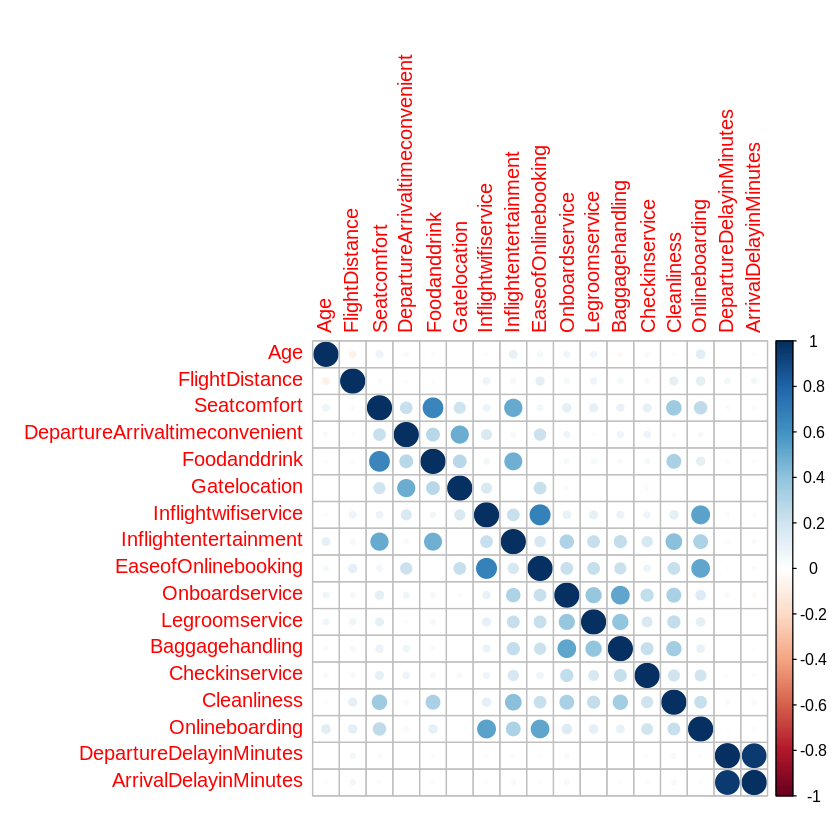

In [14]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

## Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a some outliers and also positive and negative skewing such in ***("Onboard service"), ("Baggehandling"), ("Checkinservice") and ("Cleanliness")***

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

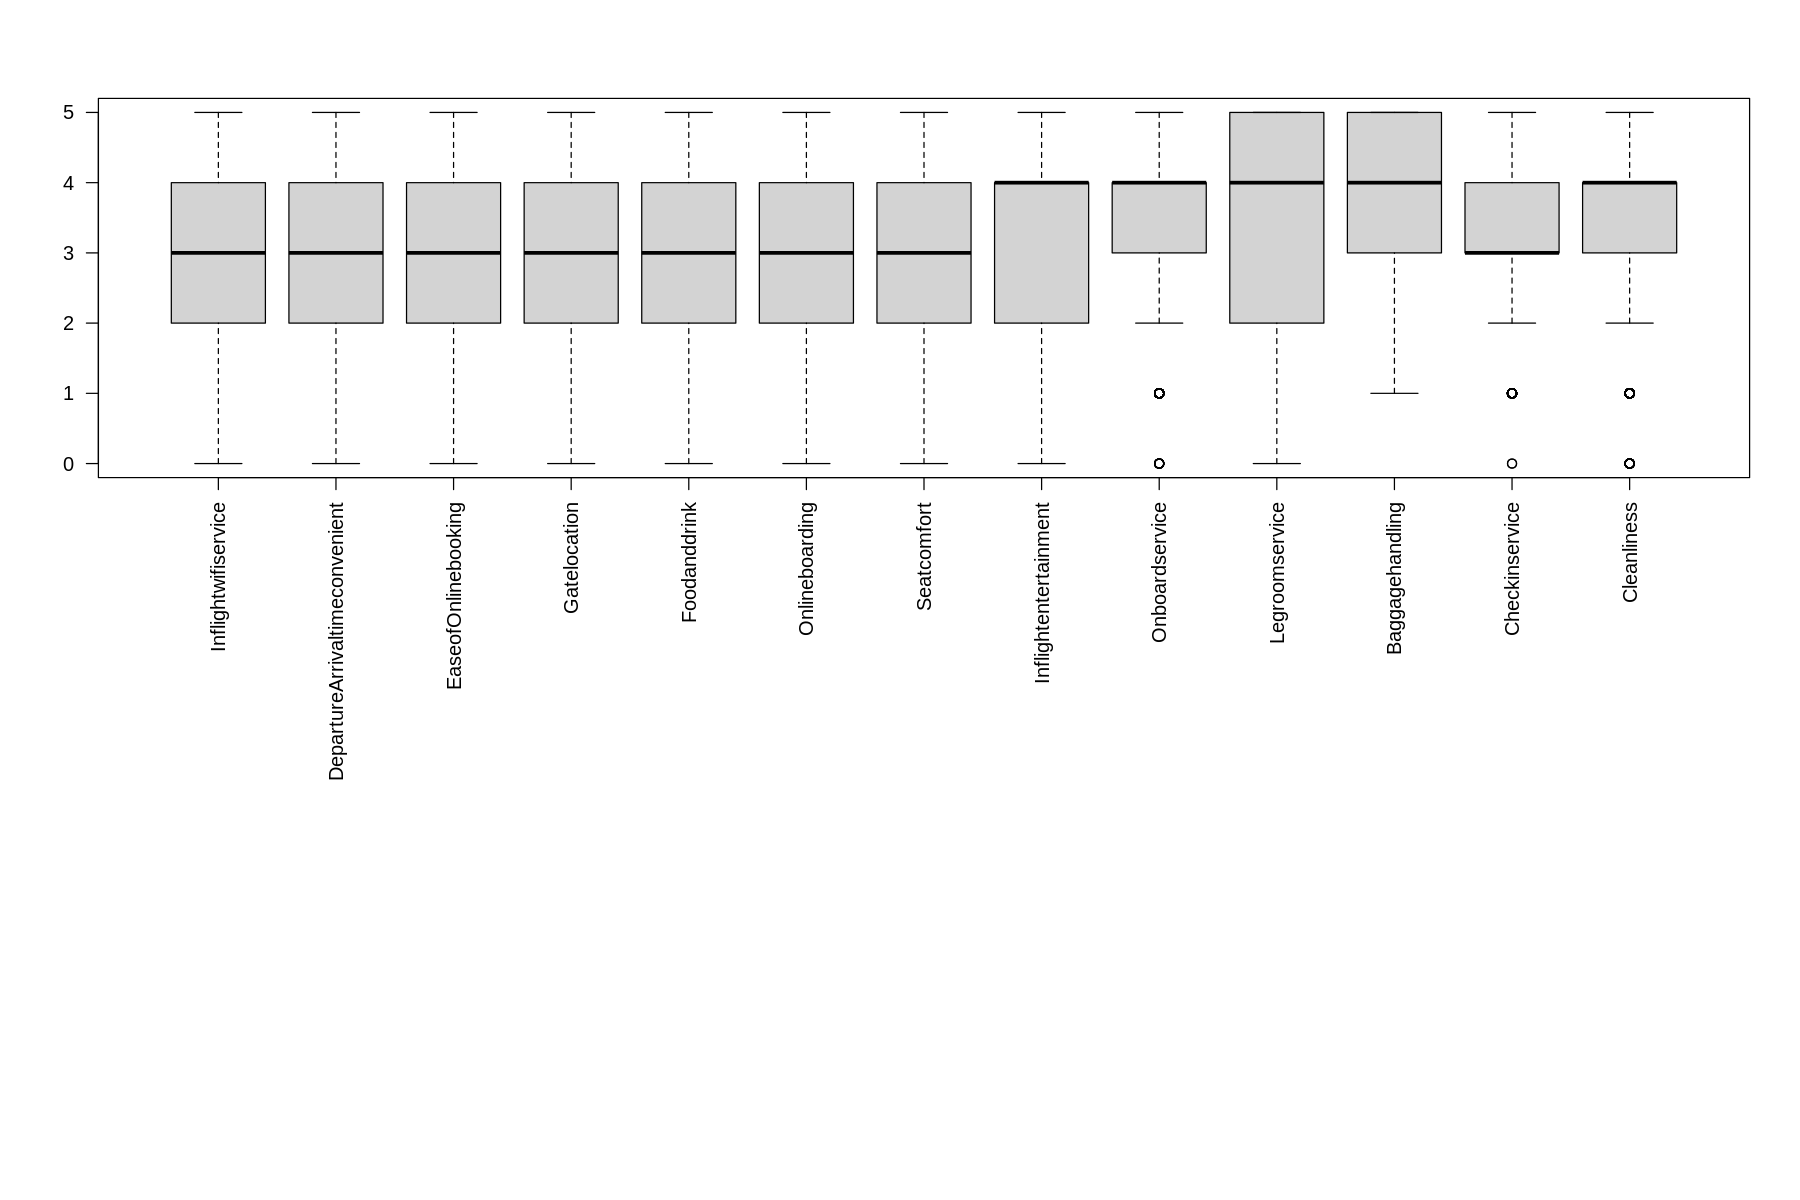

In [15]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


## Visualizing a Historgram in in other numeric fields'

For visualizing other numeric fields, using Histogram are suitable for visualizing a distribution of data in those field.

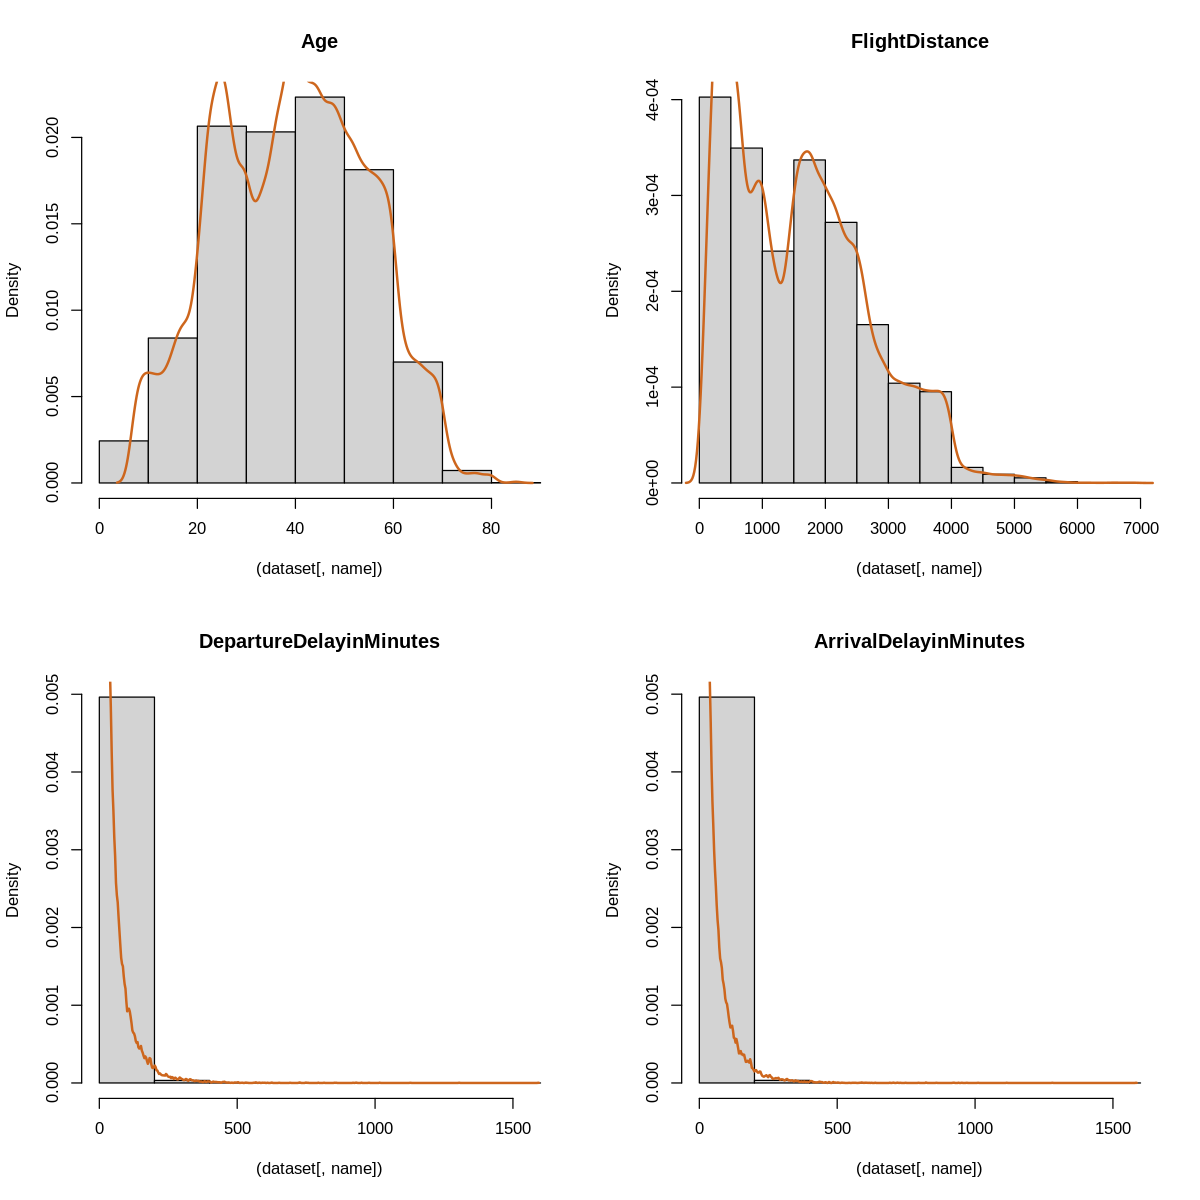

In [16]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=10,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


Histrogram show that in columns ***('Age')*** has a perfect normal distribution where in ***('Flightdistance')*** the distribution of a data is skew to the left and have small number which means the frequency of a data  passenger short flight distance is more than longer flight distance. After looking through distibution of these columns, both of them can be treat as ordinal value and use Linear normalization to normalize a value in a range of 0.0 to 1.0 in the processing part.

But in other 2 columns, the DepatureDelayinMinutes and ArrivalDelayinMinutes are clearly have distribution skew to the left and large value of outlier in a columns. Both of these need to be treat as a Discrete value and will be preprocess using one hot encoding.



# Visualize Symbolic Fields

## Use BarChart to display a distribution of each categories in each fields

Barchar is suitable for visualizing distribution of a symbolic fields. For example we can cleary visualize the number of a satisfy passenger and unsatisfy

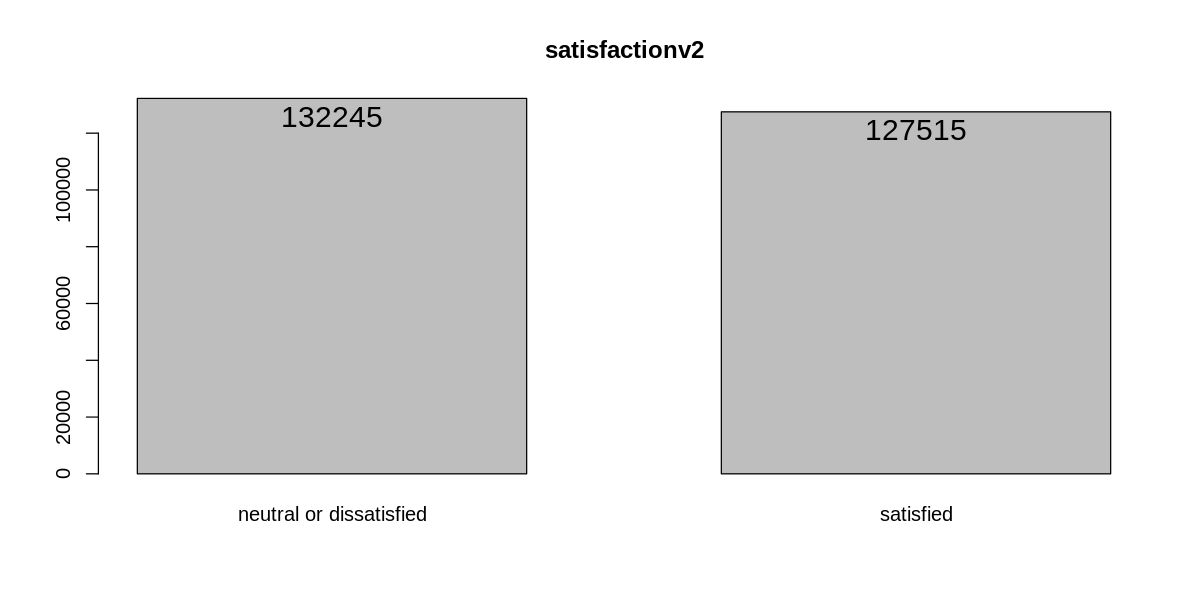

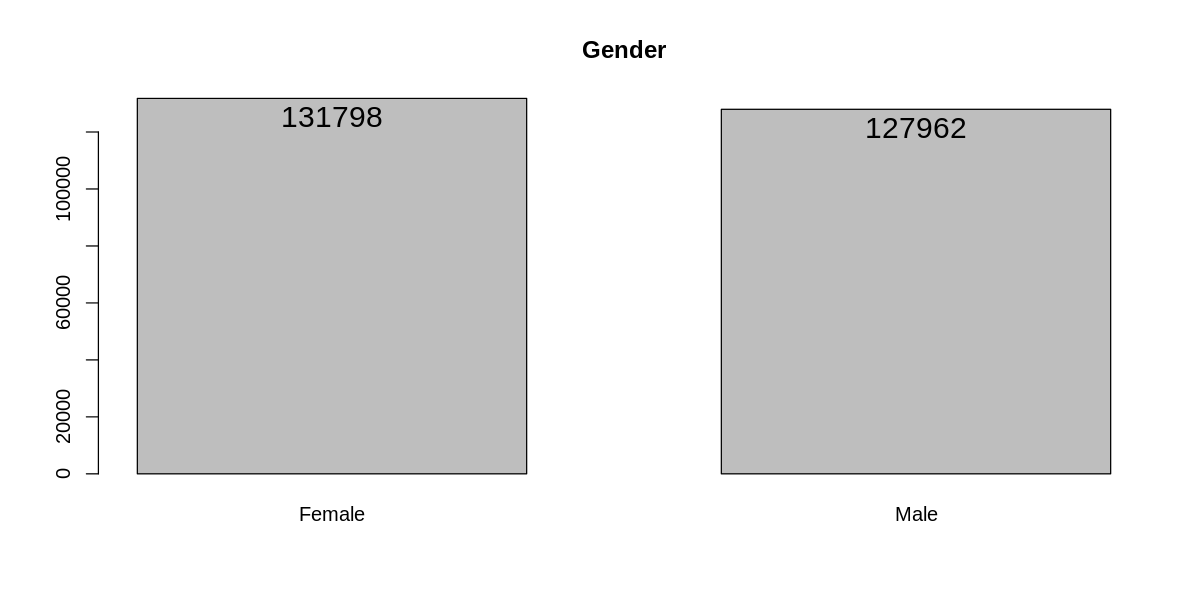

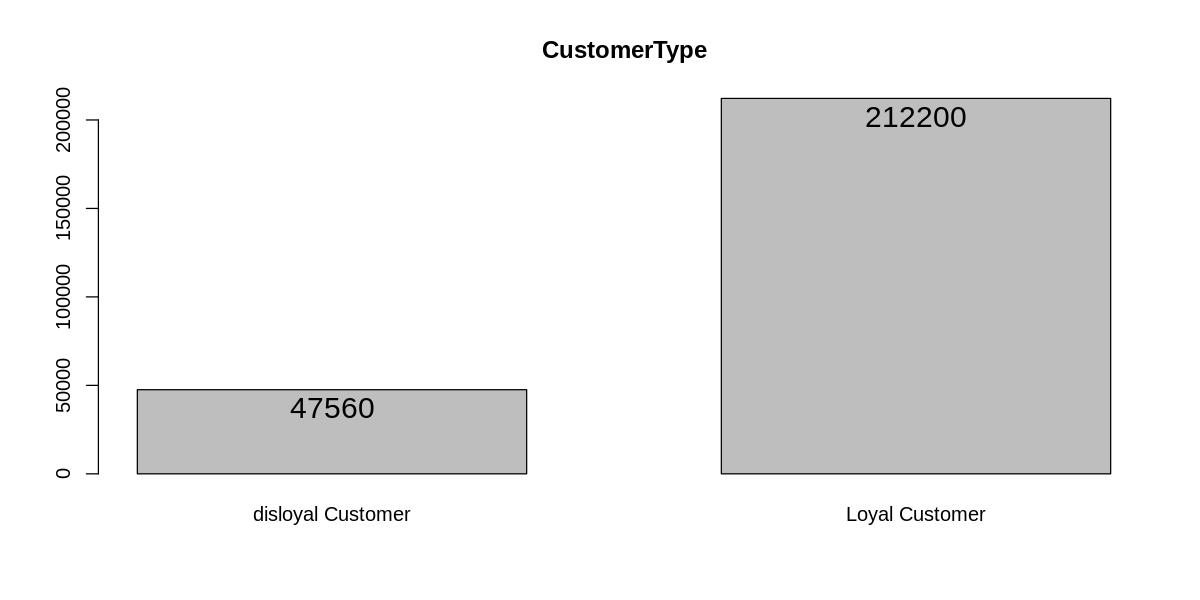

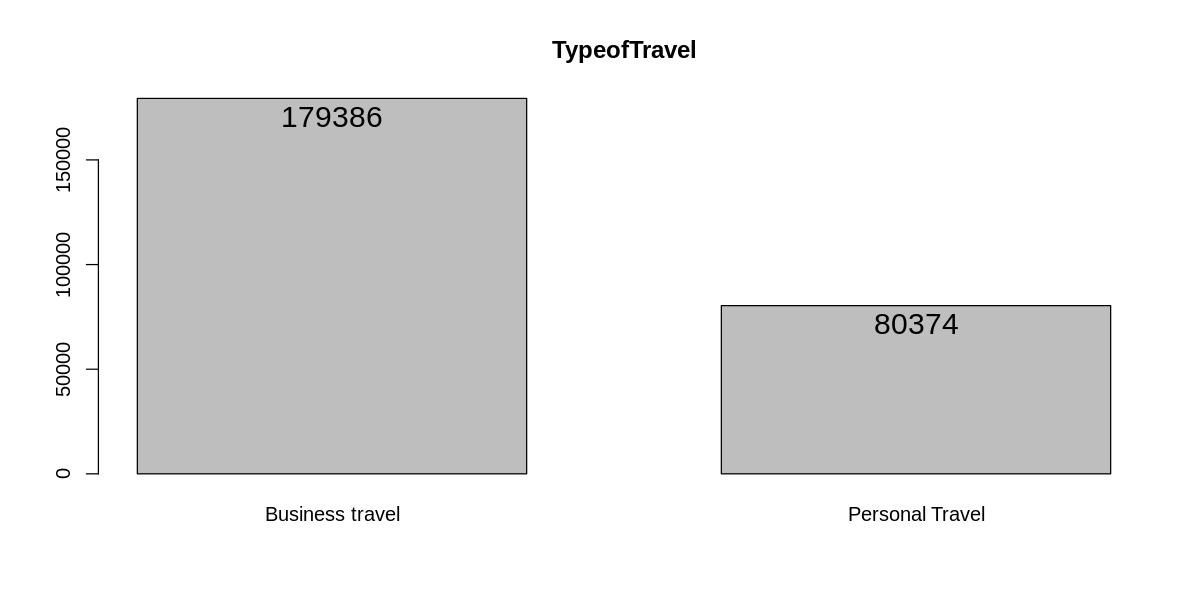

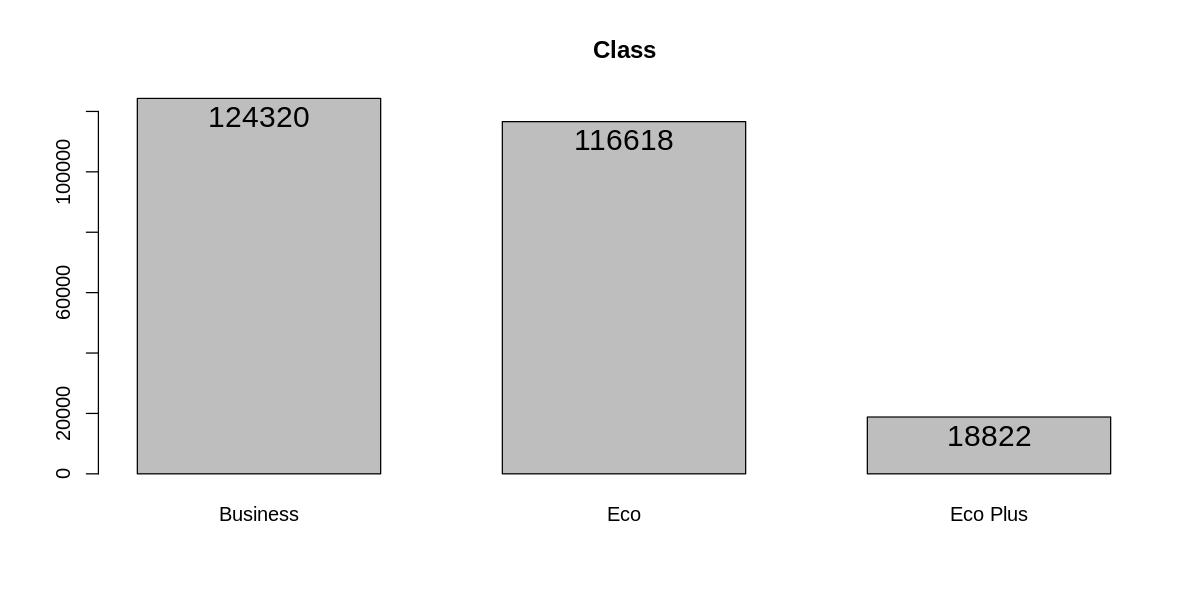

In [17]:
par(mfrow=c(1,1),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- table(dataset[,name])
    xx<-barplot(counts, main=name,space=0.5) 
    text(x = xx, y = counts, label = counts , pos = 1, cex = 1.5, col = "black")     
}



## Visualizing Relationship between a symbolic fields

Here we are using a barchart to visualize a relationship of satiscation fields on other symbolic fields.

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

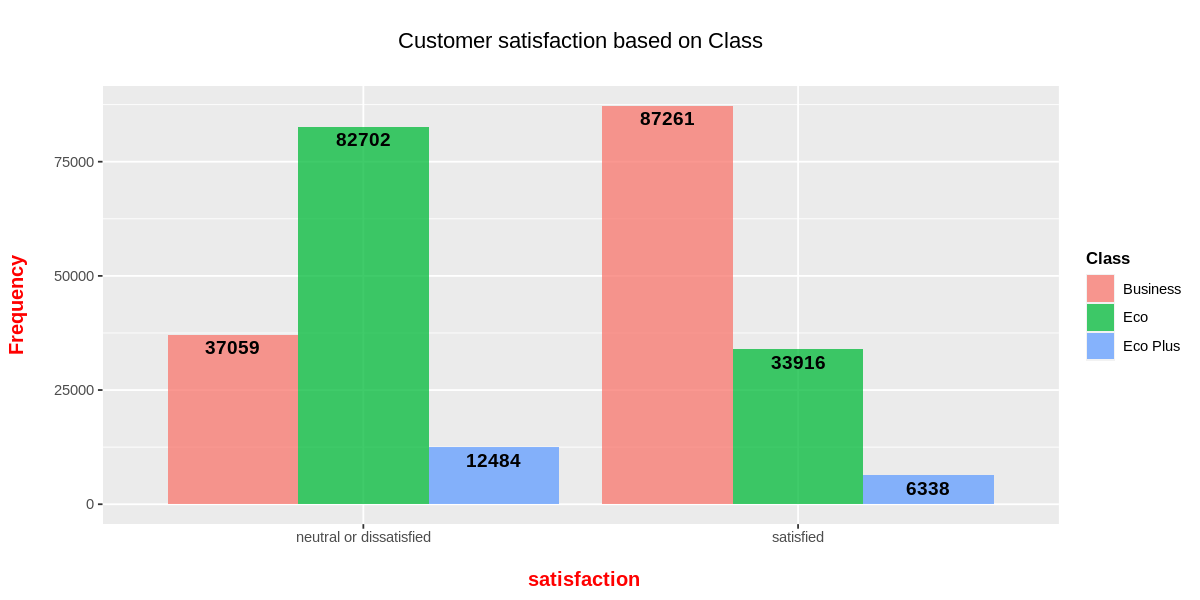

In [18]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

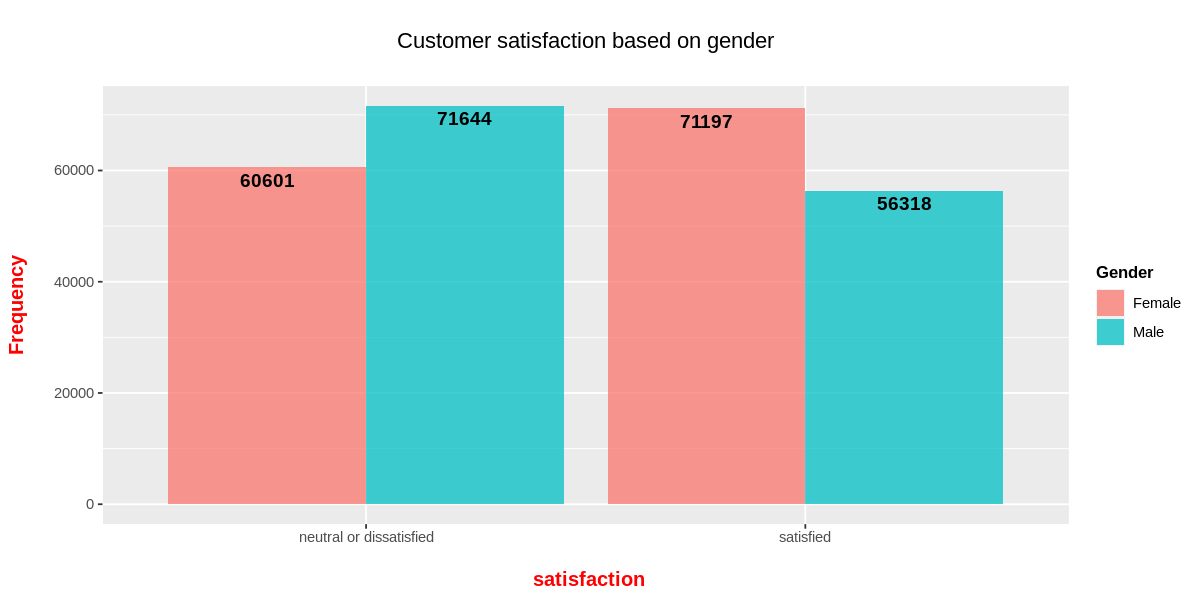

In [19]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

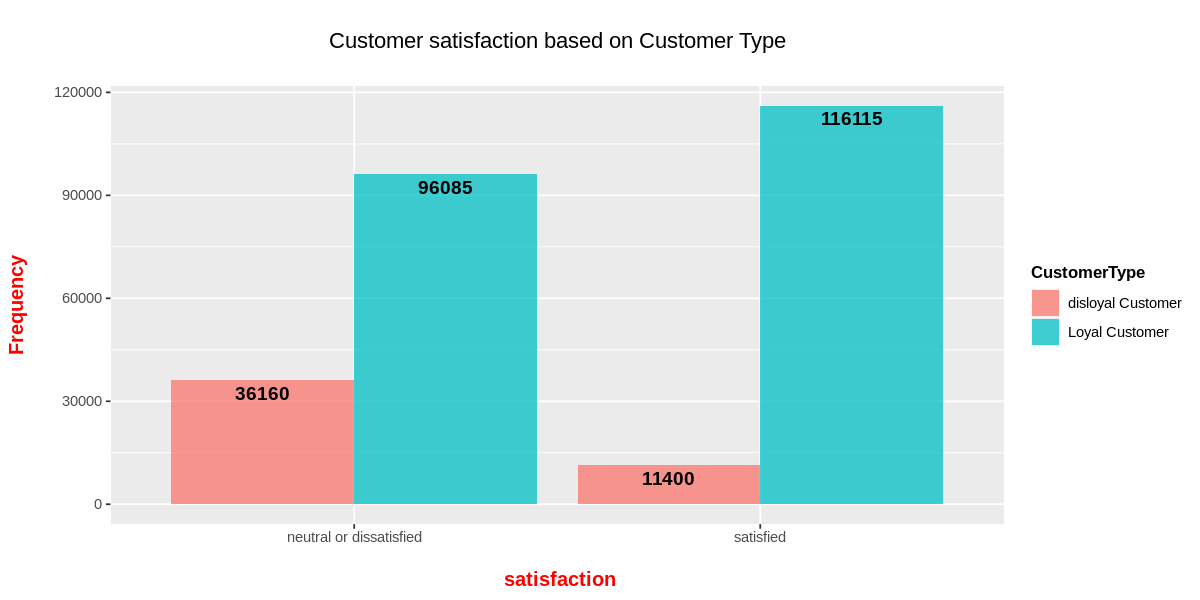

In [20]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

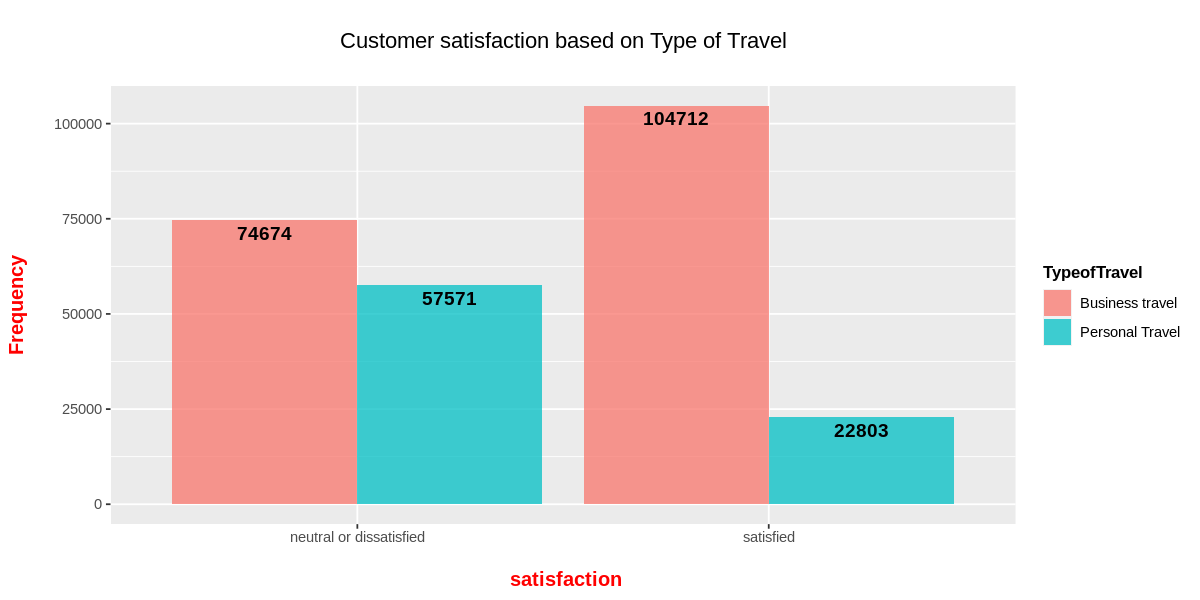

In [21]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

## Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale


Here again, we are using a barchart to visualize a relationship of satiscation fields with all a fields containing a rating of customer satisfaction in each categories.

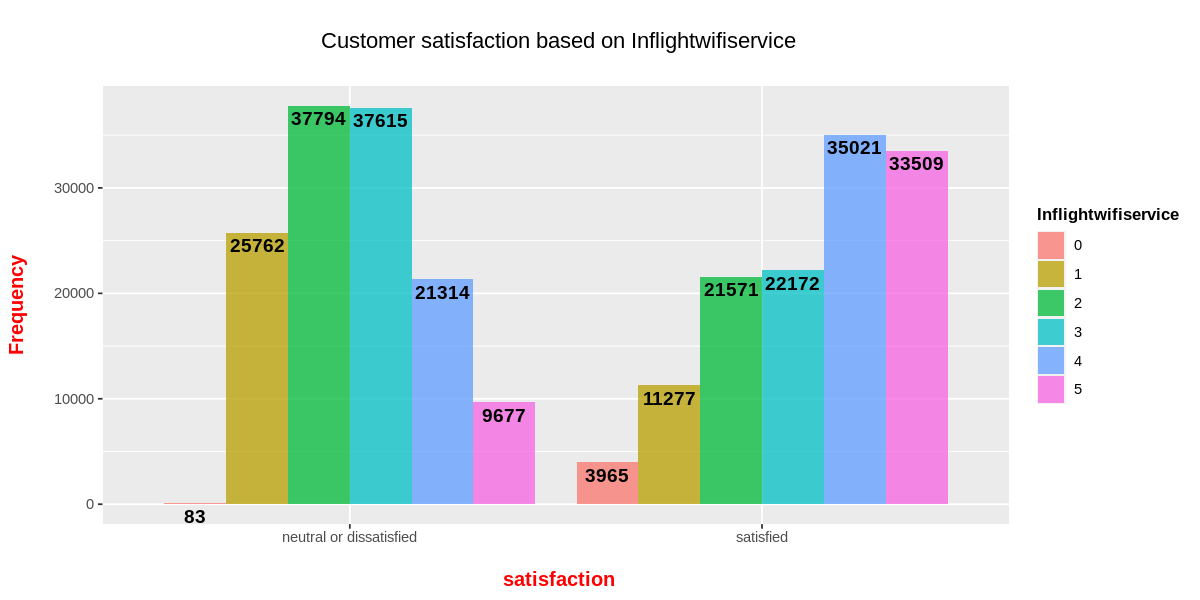

In [22]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

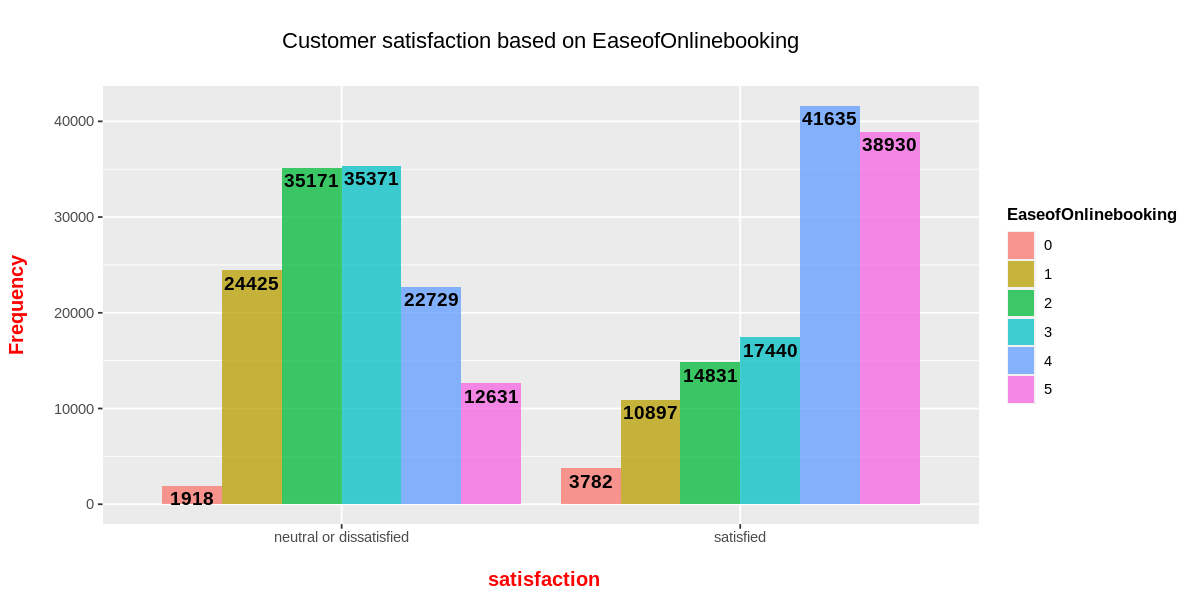

In [23]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

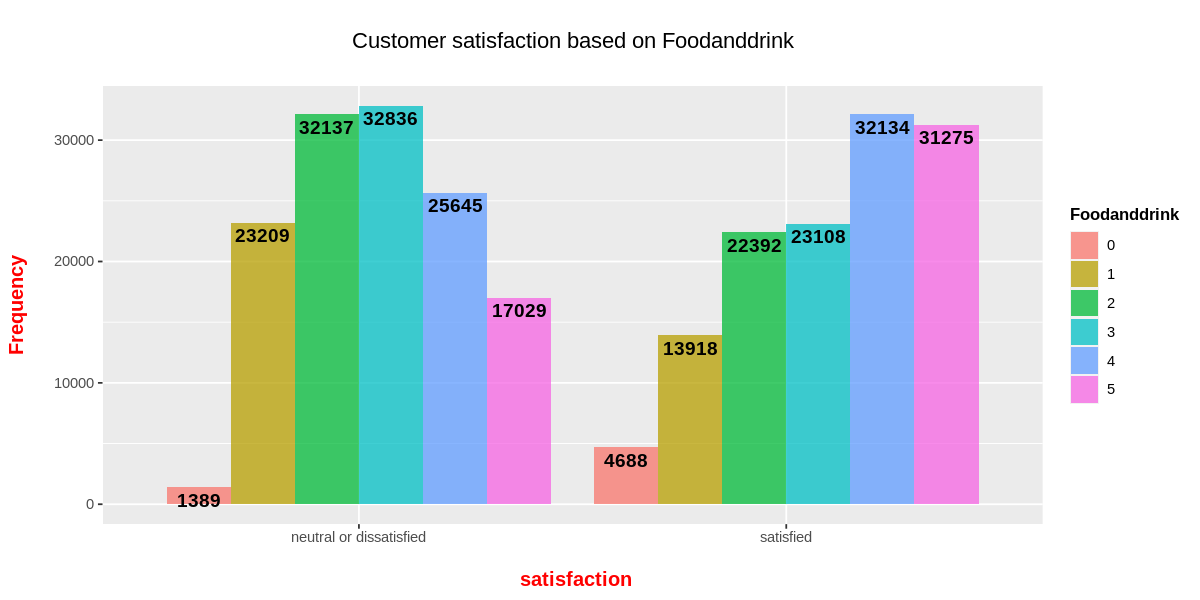

In [24]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

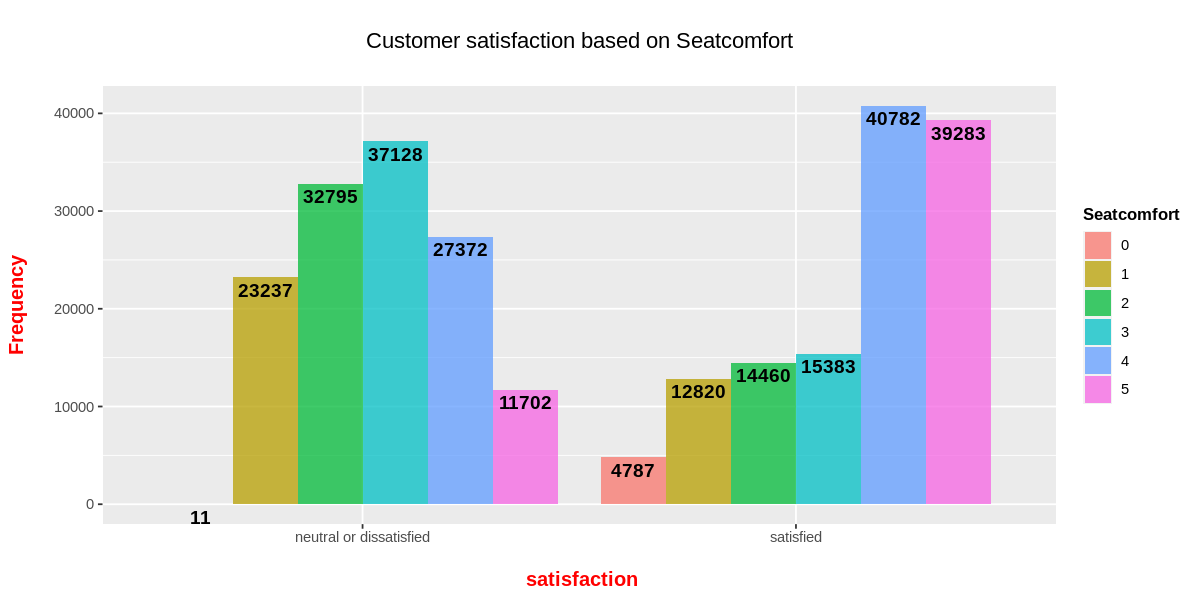

In [25]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

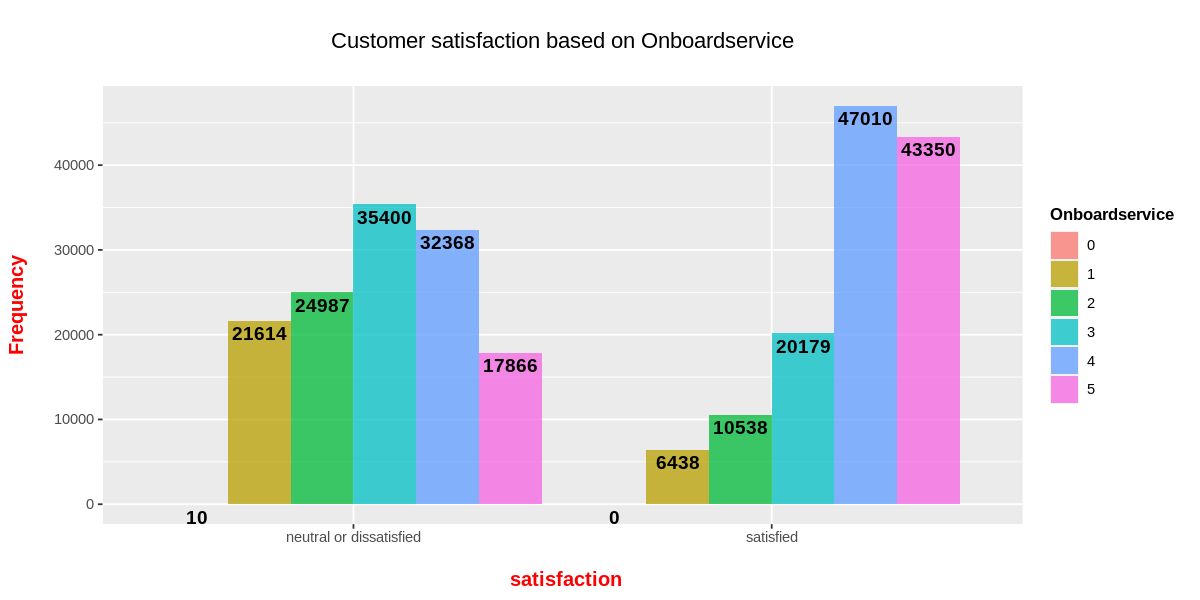

In [26]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

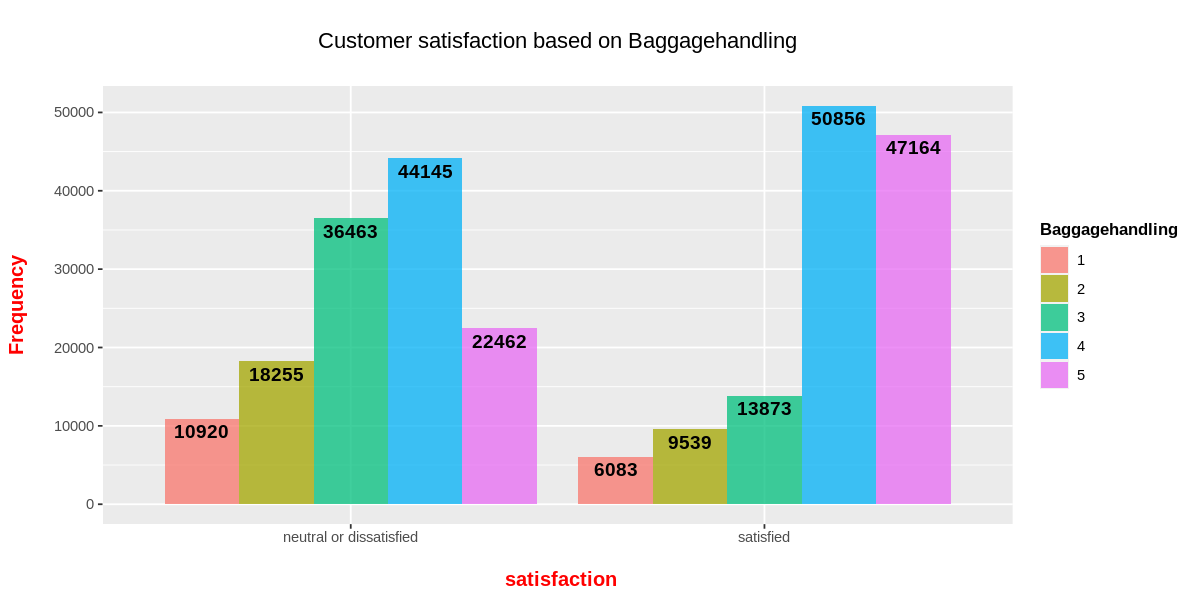

In [27]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

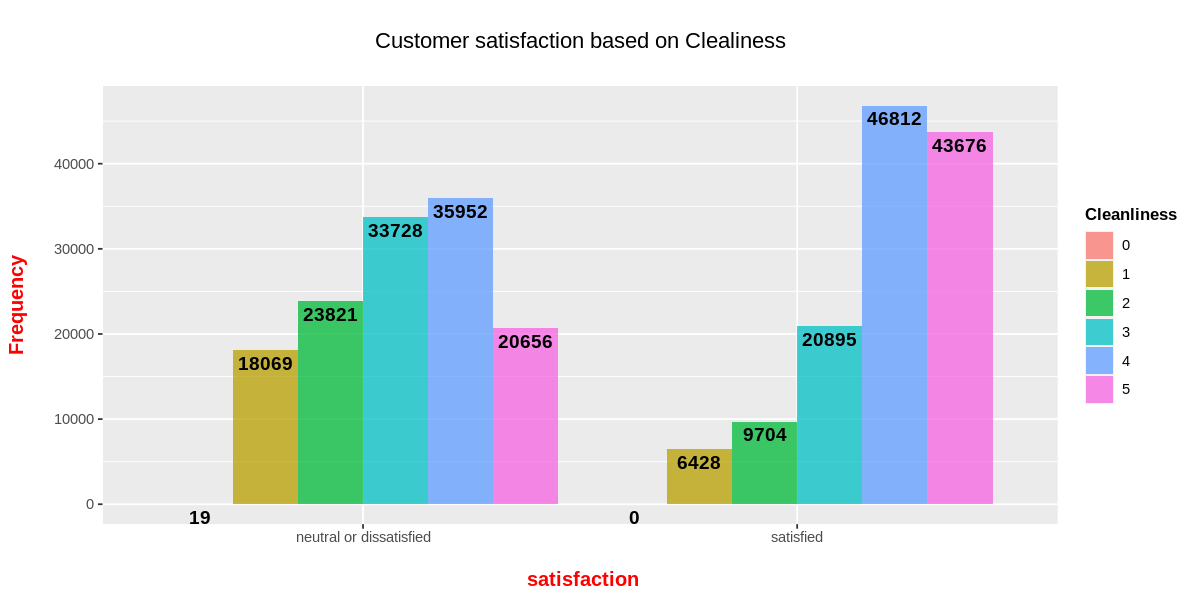

In [28]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

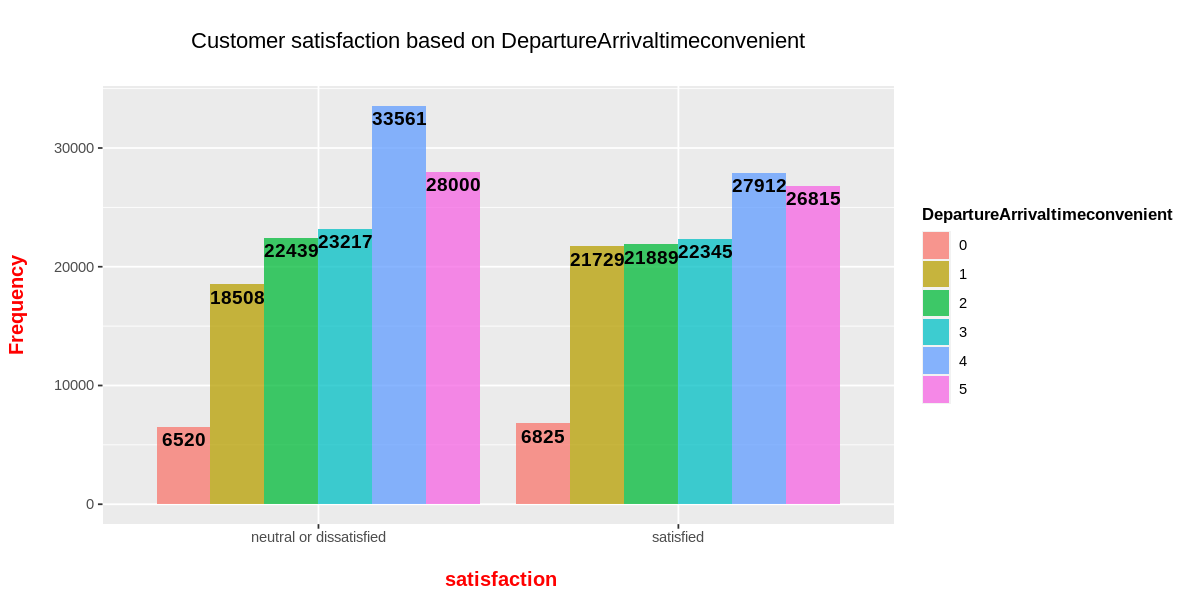

In [29]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

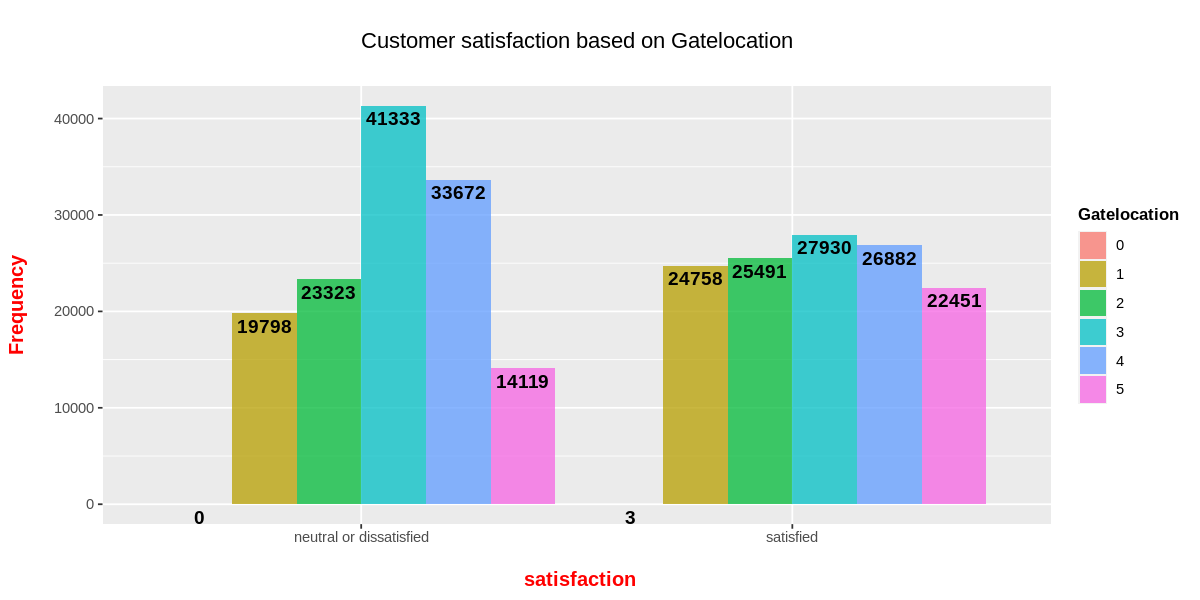

In [30]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

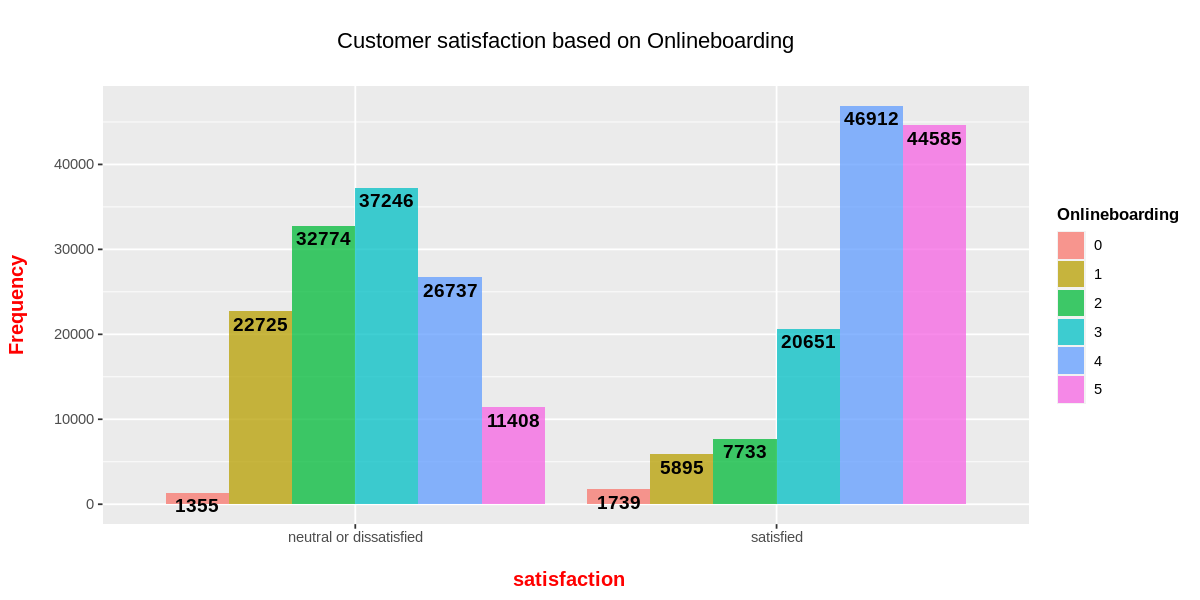

In [31]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

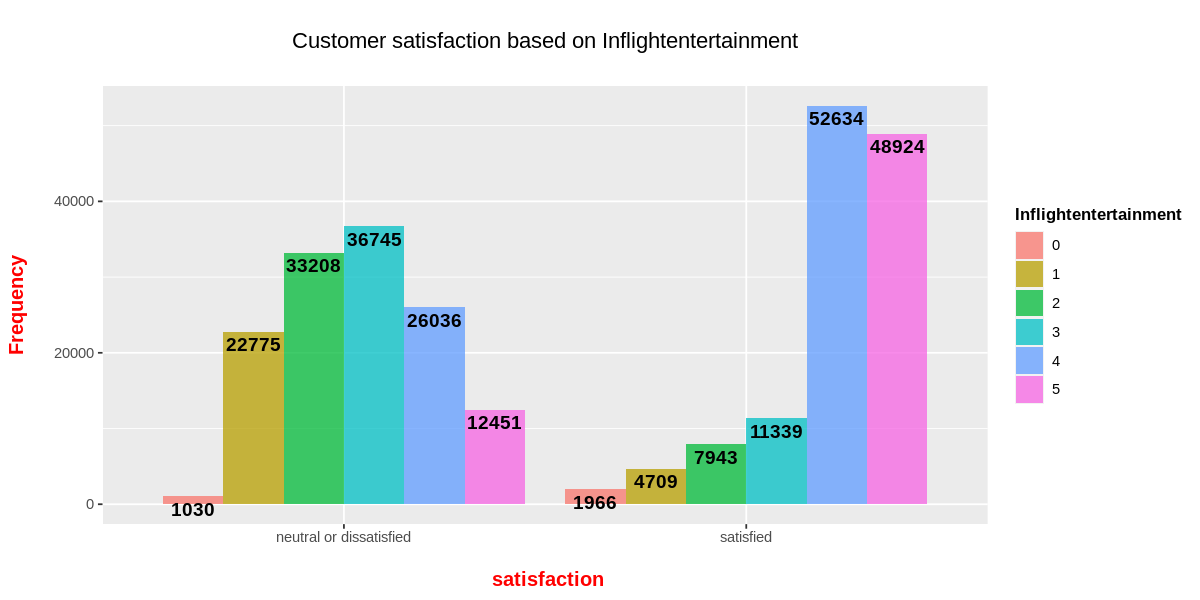

In [32]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

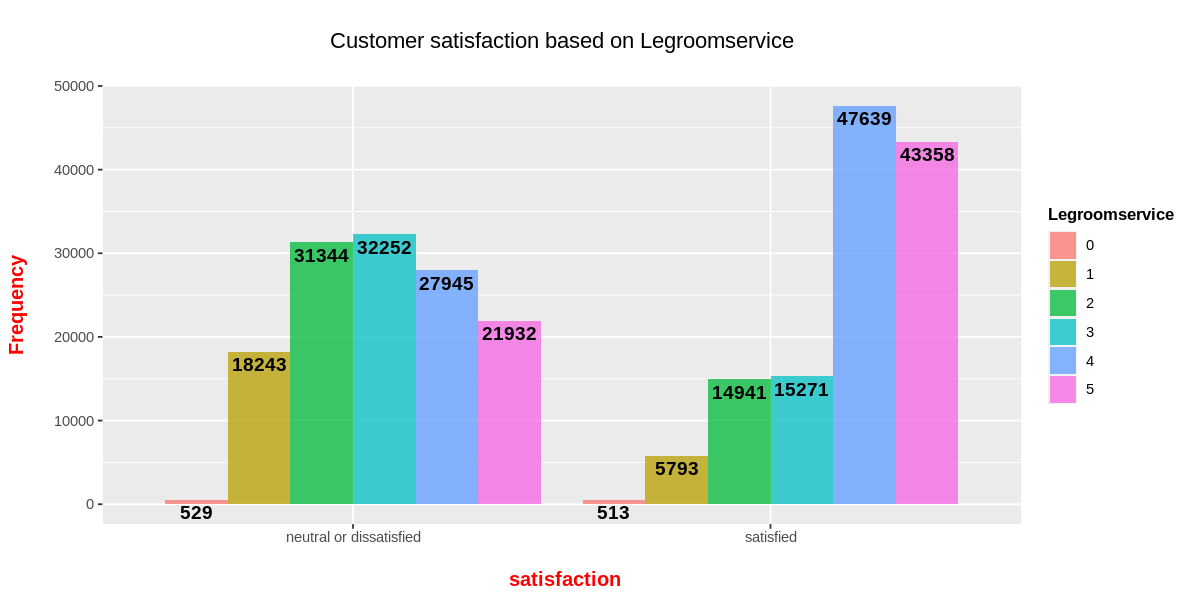

In [33]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

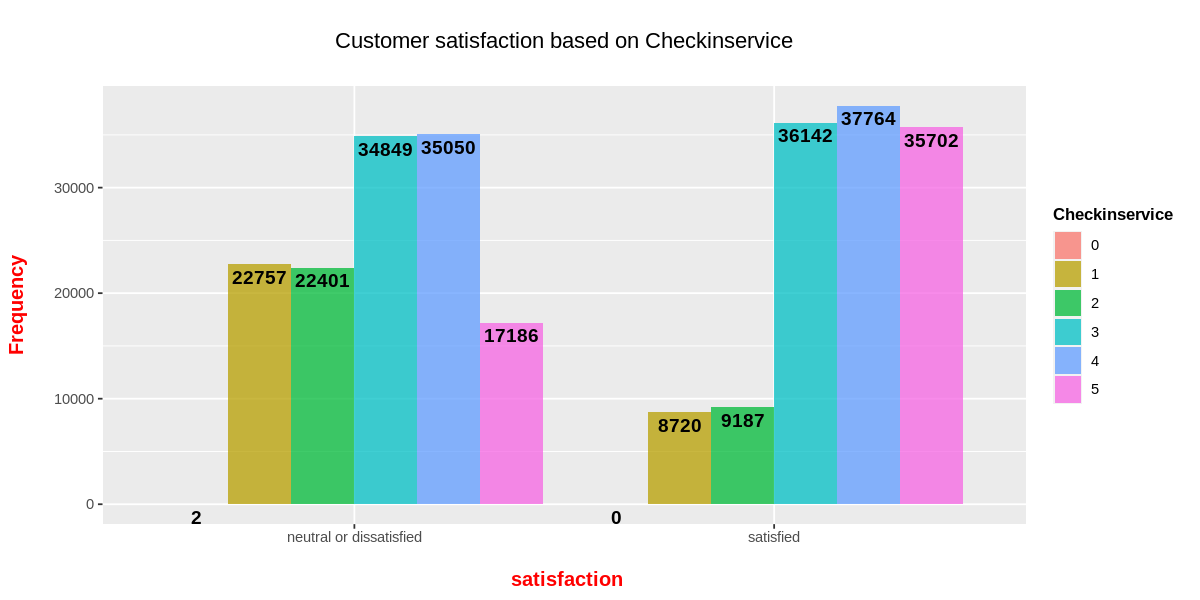

In [34]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance of a rating from all satisfation scale for each passenger

Looking at the a plot of relationship individually might be too difficult to understand the relationship and satisfaction rating in each categories to passenger satisfation. Instead, we count the occurance of customers' rating and take the maximum rating occur for each customer and use barchart to visualize a relationship with final satisfaction

In [35]:
sat_data=dataset[,sat_cols]

# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [36]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)

sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)


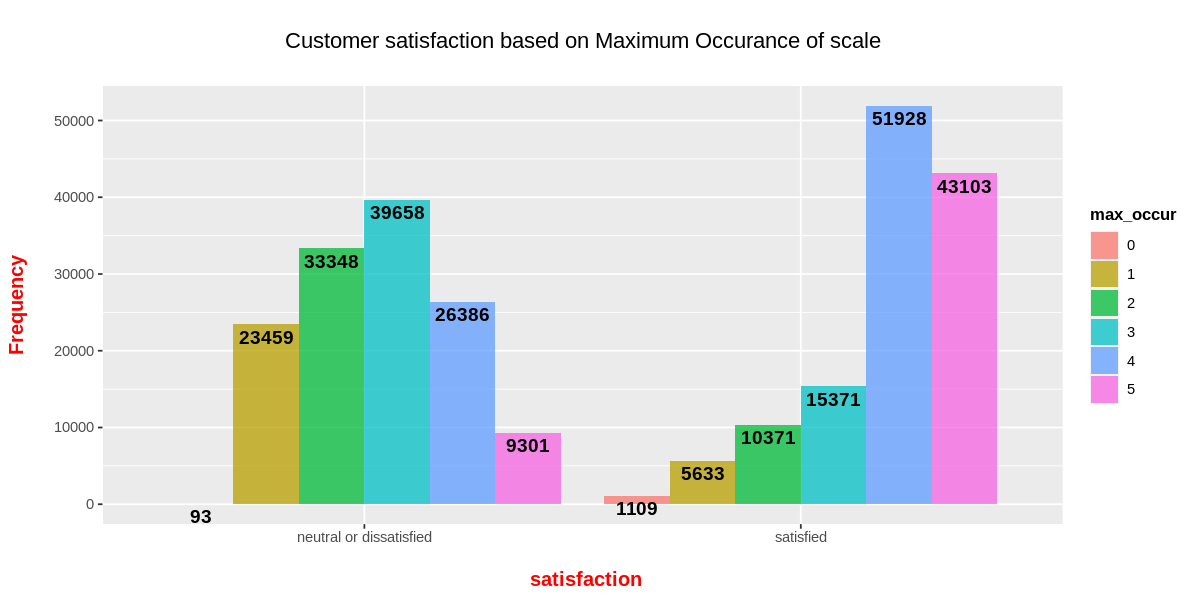

In [37]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

From this visualization we can see that statiscally passengers that have neutral or disstasified to a service of an airlines mostly have a maximum occurance of rating from 1 to 4. While on the other hand for a passenger with who satisfied a service has maximum occurance from 4 to 5.

# Data preprocessing

Data preprocessing is a crucial process before feeding a data into a models

In [38]:
dataset

satisfactionv2 Gender CustomerType   Age TypeofTravel    Class   
1      satisfied      Female Loyal Customer 65  Personal Travel Eco     
2      satisfied      Male   Loyal Customer 47  Personal Travel Business
3      satisfied      Female Loyal Customer 15  Personal Travel Eco     
4      satisfied      Female Loyal Customer 60  Personal Travel Eco     
5      satisfied      Female Loyal Customer 70  Personal Travel Eco     
6      satisfied      Male   Loyal Customer 30  Personal Travel Eco     
7      satisfied      Female Loyal Customer 66  Personal Travel Eco     
8      satisfied      Male   Loyal Customer 10  Personal Travel Eco     
9      satisfied      Female Loyal Customer 56  Personal Travel Business
10     satisfied      Male   Loyal Customer 22  Personal Travel Eco     
11     satisfied      Female Loyal Customer 58  Personal Travel Eco     
12     satisfied      Female Loyal Customer 34  Personal Travel Eco     
13     satisfied      Male   Loyal Customer 62  Personal Travel Eco     
14     satisfied      Male   Loyal Customer 35  Personal Travel Eco     
15     satisfied      Female Loyal Customer 47  Personal Travel Eco     
16     satisfied      Male   Loyal Customer 60  Personal Travel Eco     
17     satisfied      Female Loyal Customer 13  Personal Travel Eco     
18     satisfied      Female Loyal Customer 52  Personal Travel Business
19     satisfied      Female Loyal Customer 55  Personal Travel Eco     
20     satisfied      Female Loyal Customer 28  Personal Travel Eco     
21     satisfied      Female Loyal Customer  9  Personal Travel Eco     
22     satisfied      Female Loyal Customer 10  Personal Travel Eco     
23     satisfied      Female Loyal Customer 25  Personal Travel Eco     
24     satisfied      Male   Loyal Customer 53  Personal Travel Business
25     satisfied      Female Loyal Customer 16  Personal Travel Eco Plus
26     satisfied      Male   Loyal Customer 30  Personal Travel Eco     
27     satisfied      Male   Loyal Customer 64  Personal Travel Eco     
28     satisfied      Female Loyal Customer 42  Personal Travel Eco     
29     satisfied      Male   Loyal Customer  9  Personal Travel Eco     
30     satisfied      Female Loyal Customer 35  Personal Travel Eco     
⋮      ⋮              ⋮      ⋮              ⋮   ⋮               ⋮       
259731 satisfied      Male   Loyal Customer 42  Business travel Business
259732 satisfied      Female Loyal Customer 46  Business travel Business
259733 satisfied      Male   Loyal Customer 20  Business travel Eco Plus
259734 satisfied      Female Loyal Customer 50  Business travel Business
259735 satisfied      Female Loyal Customer 43  Business travel Business
259736 satisfied      Male   Loyal Customer 35  Business travel Business
259737 satisfied      Male   Loyal Customer 53  Business travel Business
259738 satisfied      Female Loyal Customer 45  Business travel Business
259739 satisfied      Male   Loyal Customer 53  Business travel Business
259740 satisfied      Male   Loyal Customer 47  Business travel Business
259741 satisfied      Male   Loyal Customer 43  Business travel Business
259742 satisfied      Male   Loyal Customer 18  Business travel Eco     
259743 satisfied      Female Loyal Customer 31  Business travel Business
259744 satisfied      Female Loyal Customer 52  Business travel Business
259745 satisfied      Male   Loyal Customer 50  Business travel Business
259746 satisfied      Male   Loyal Customer 47  Business travel Business
259747 satisfied      Male   Loyal Customer 39  Business travel Business
259748 satisfied      Male   Loyal Customer 16  Business travel Eco     
259749 satisfied      Female Loyal Customer 48  Business travel Business
259750 satisfied      Male   Loyal Customer 64  Business travel Business
259751 satisfied      Female Loyal Customer 56  Business travel Business
259752 satisfied      Male   Loyal Customer 30  Business travel Business
259753 satisfied      Male   Loyal Customer 39  Business travel B

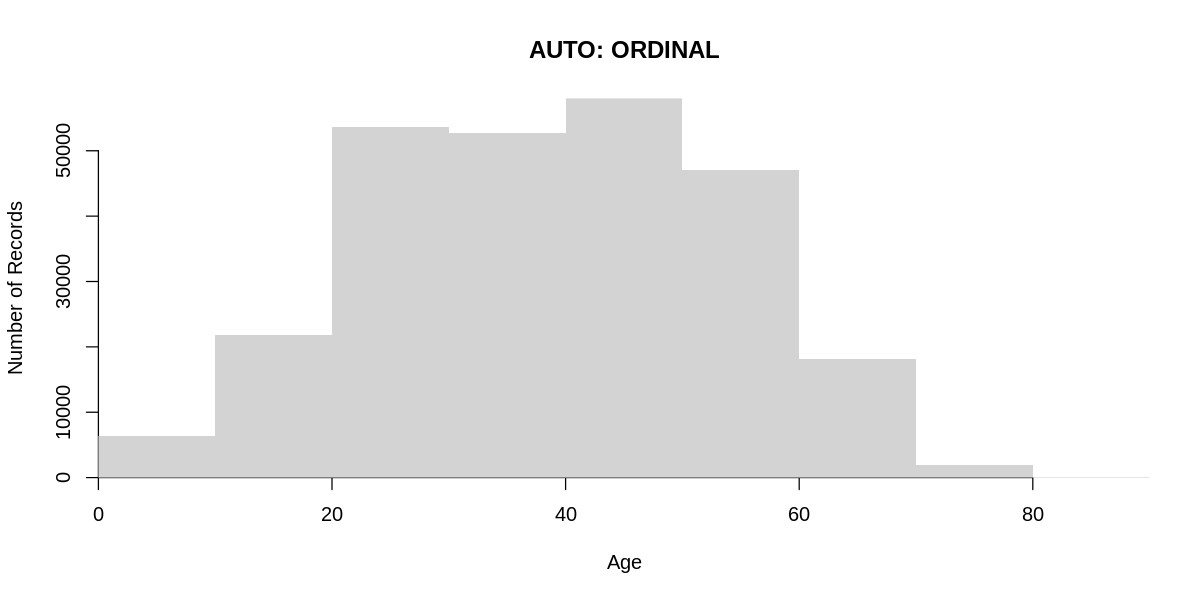

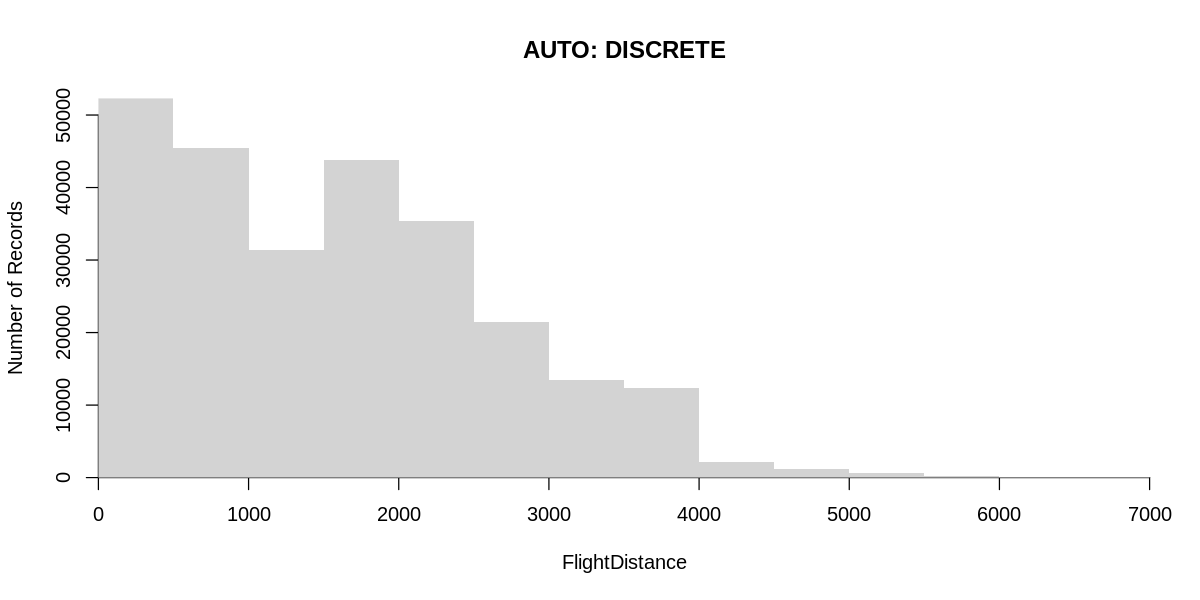

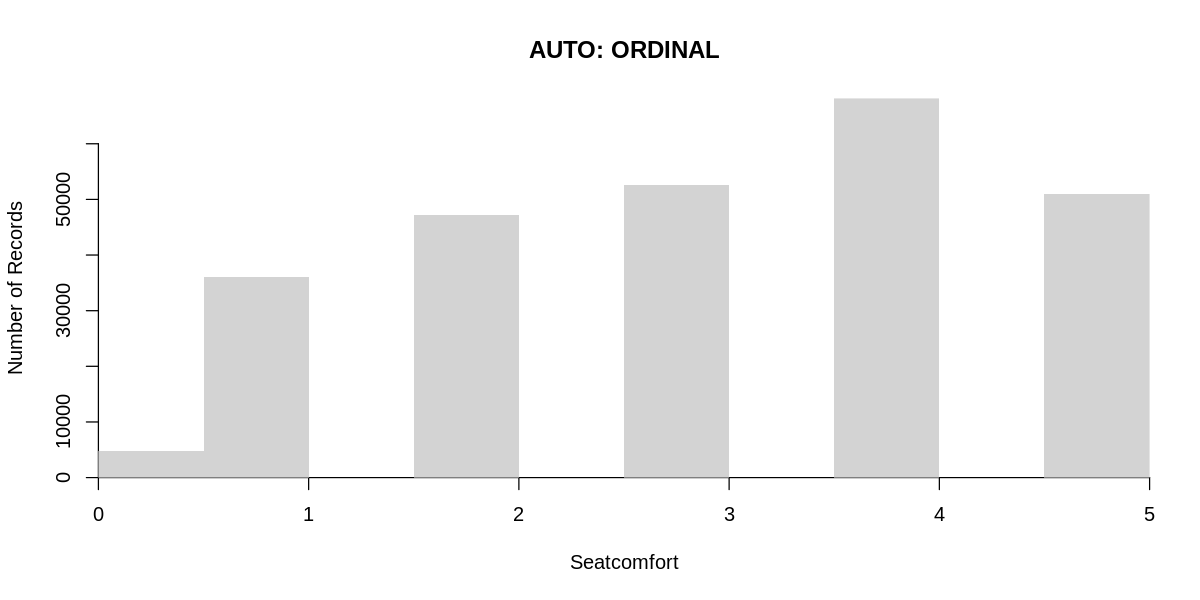

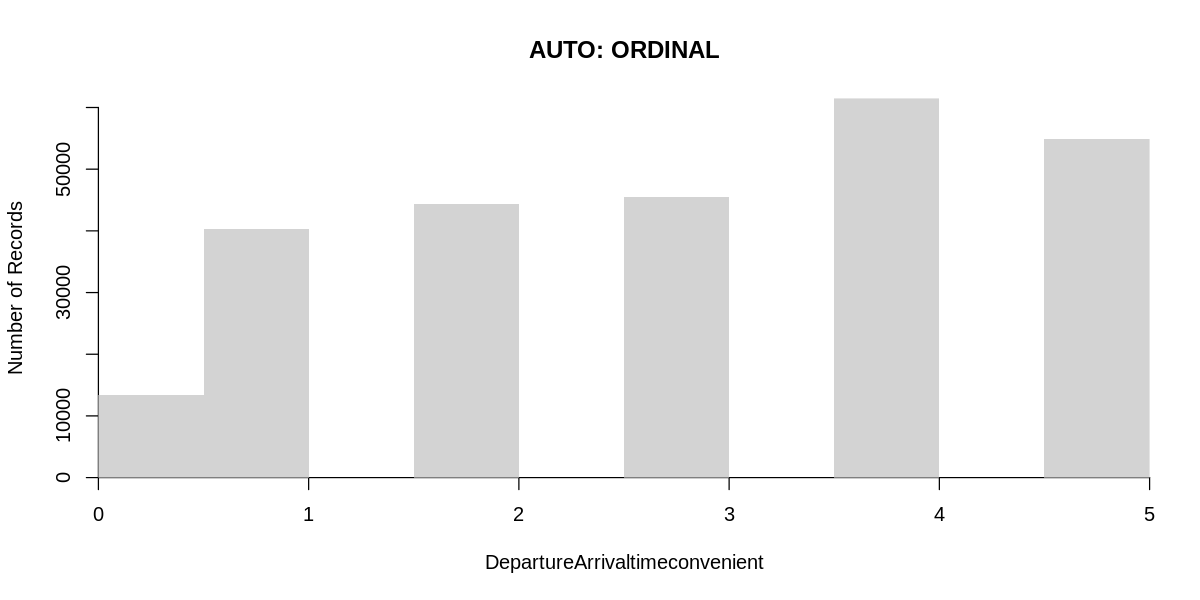

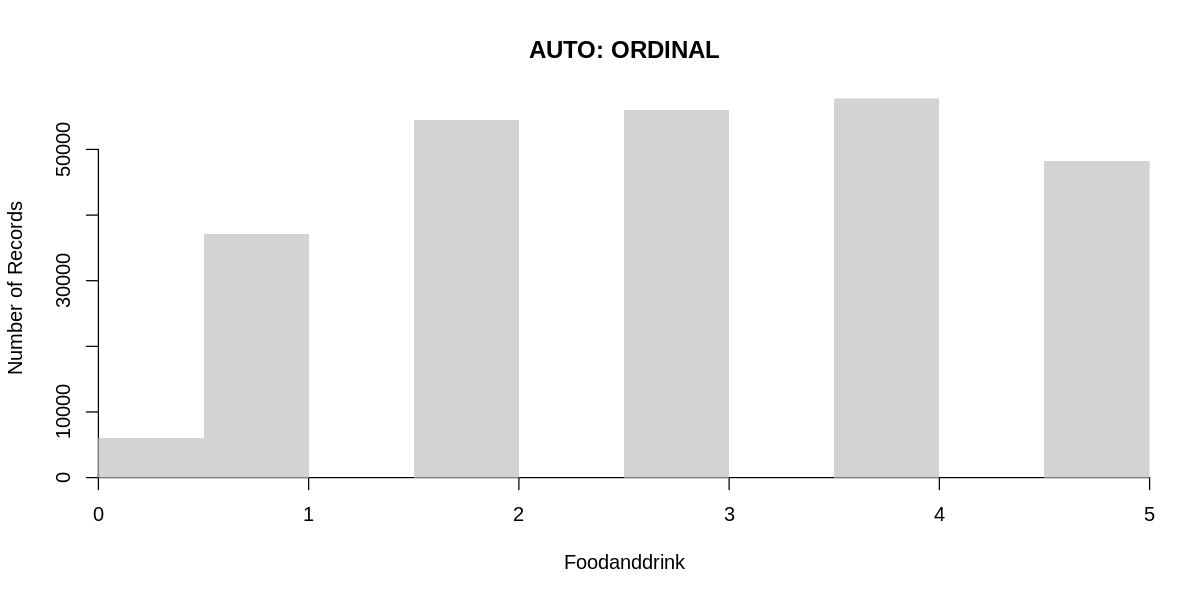

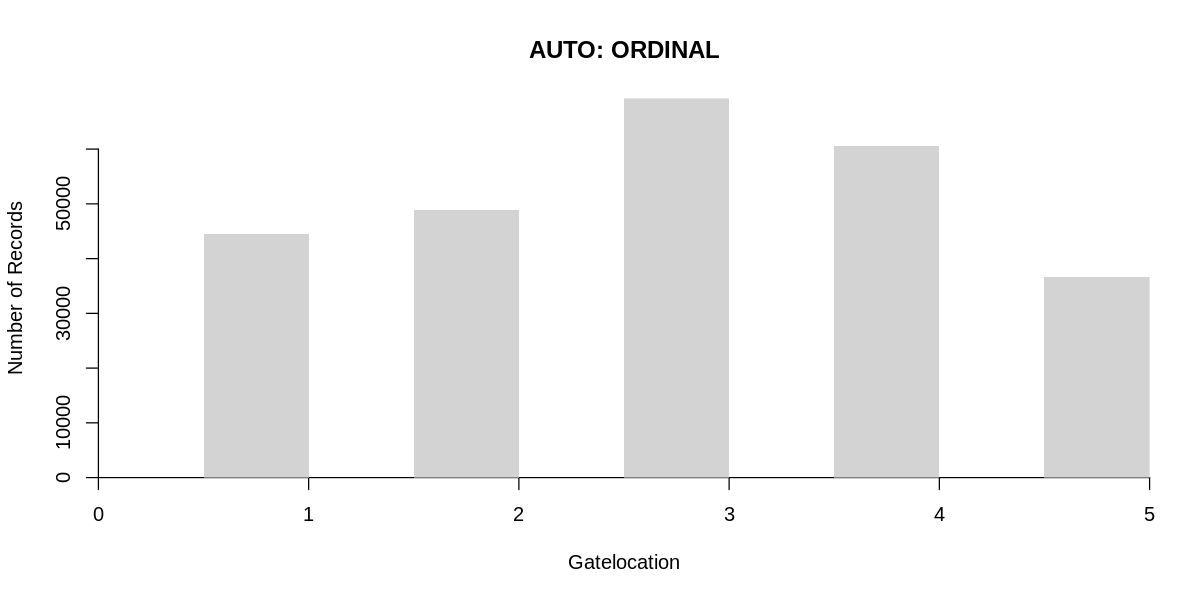

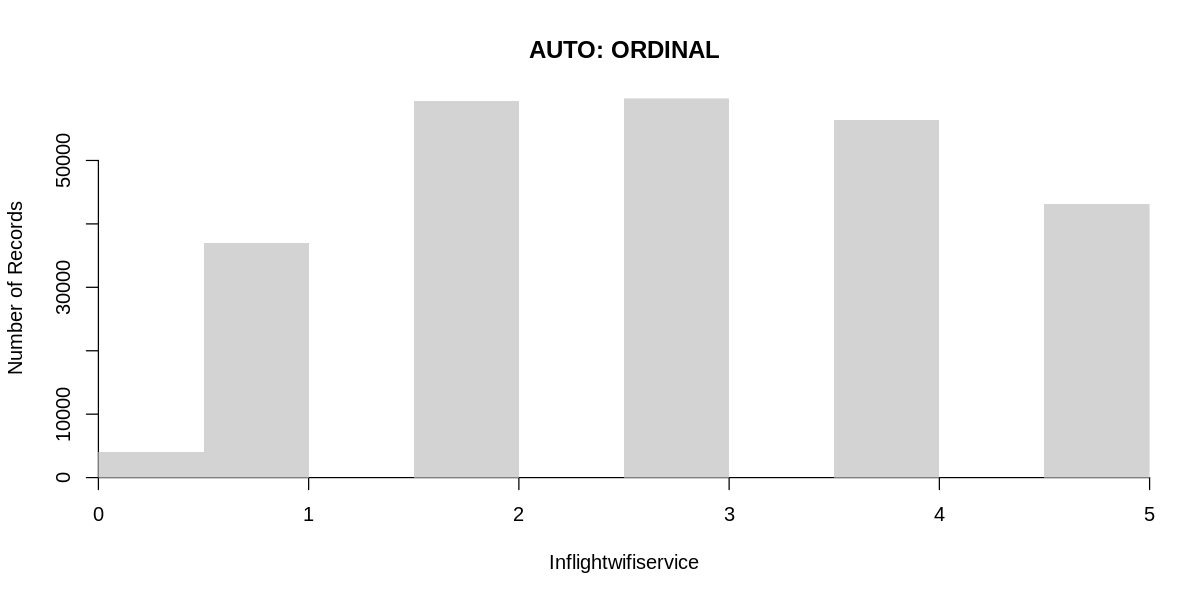

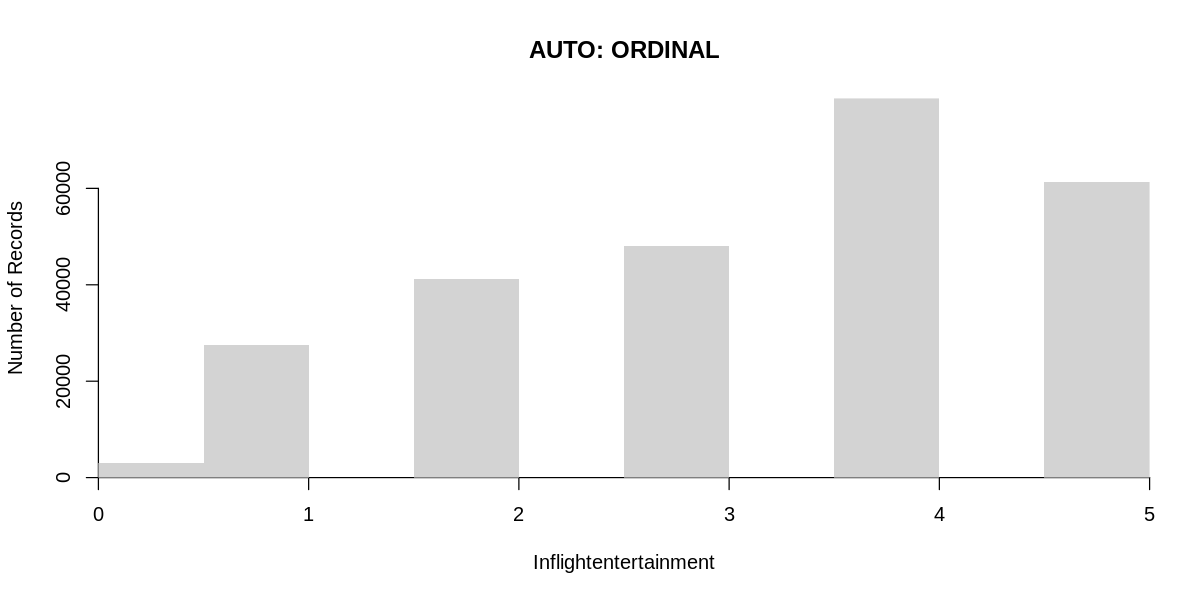

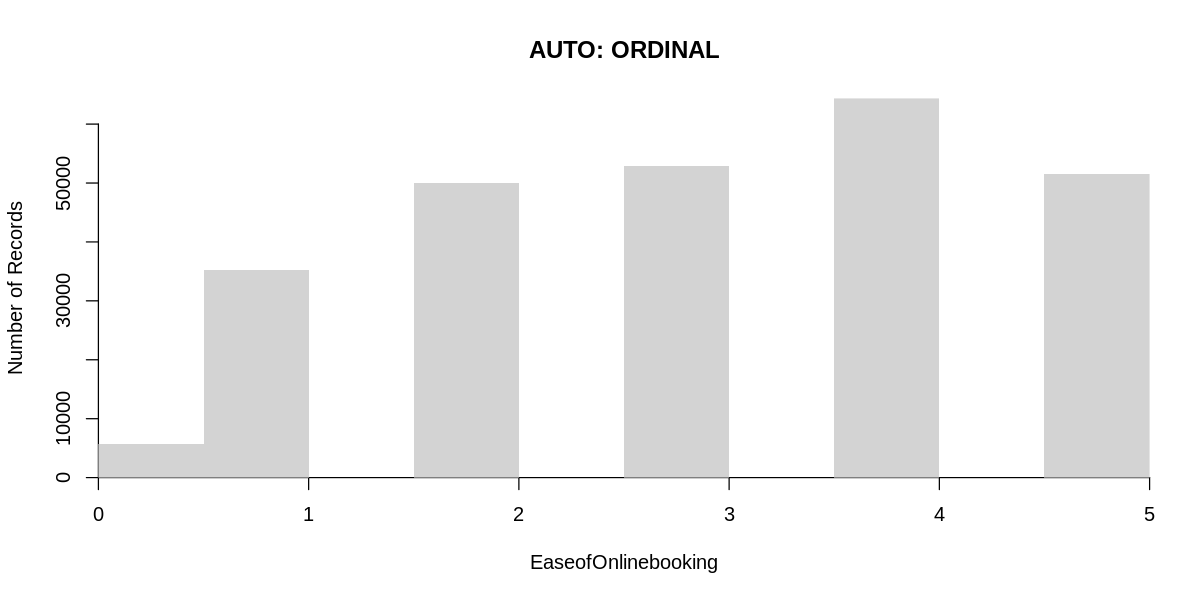

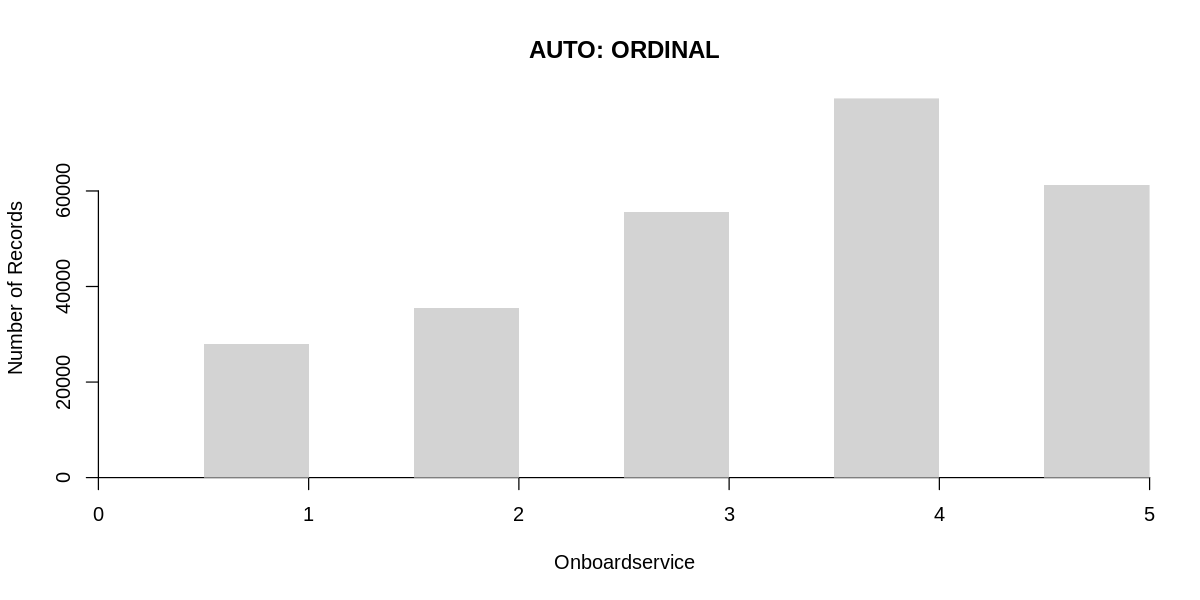

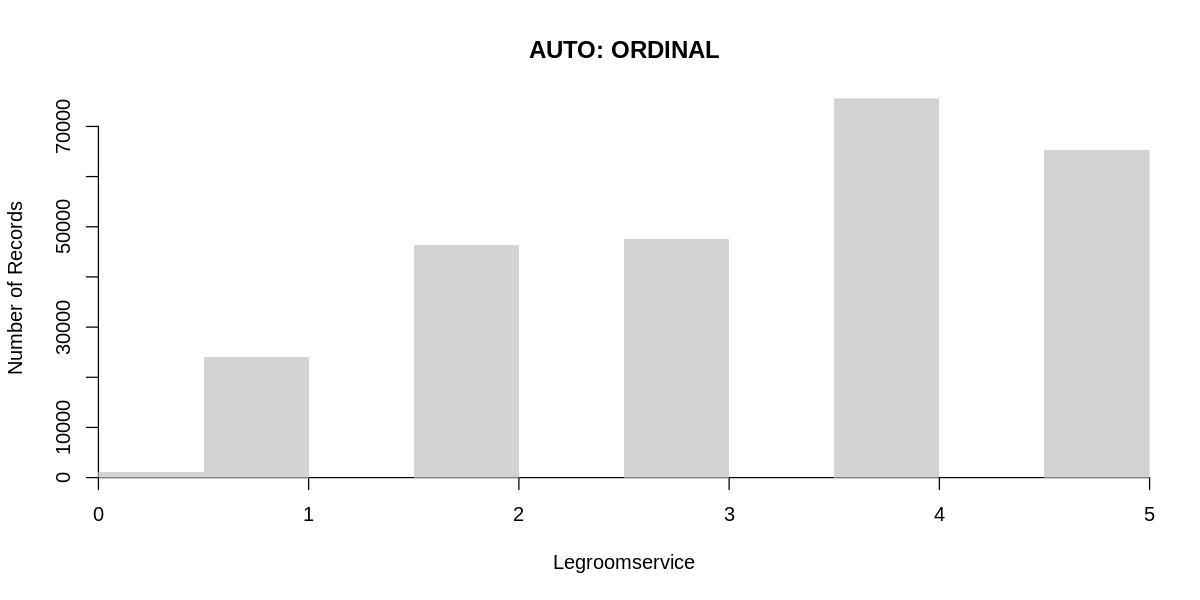

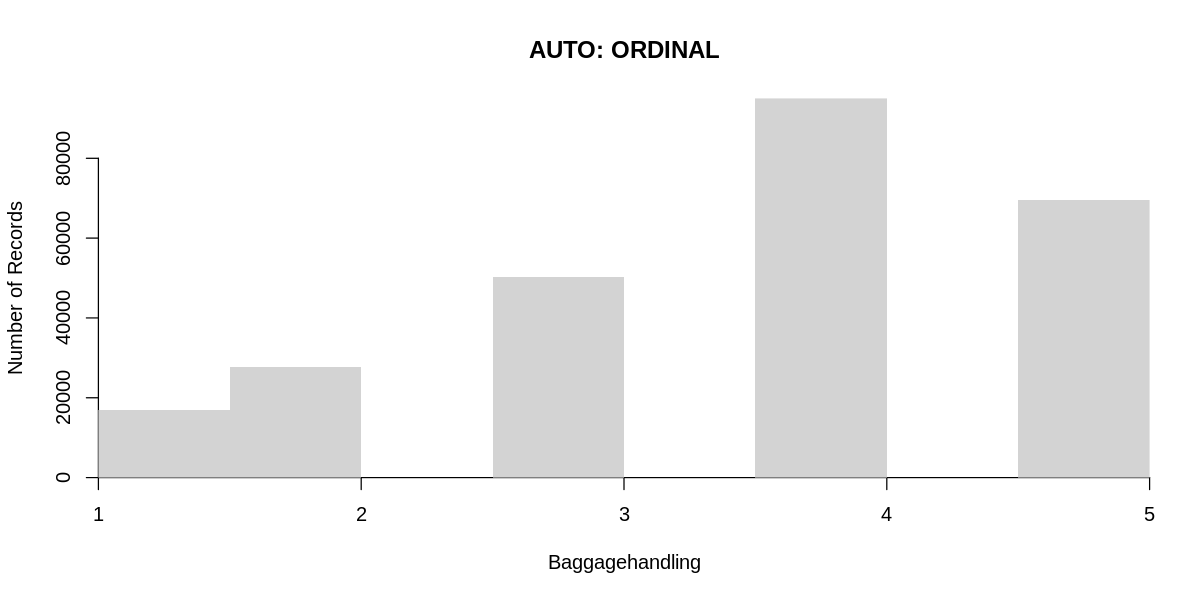

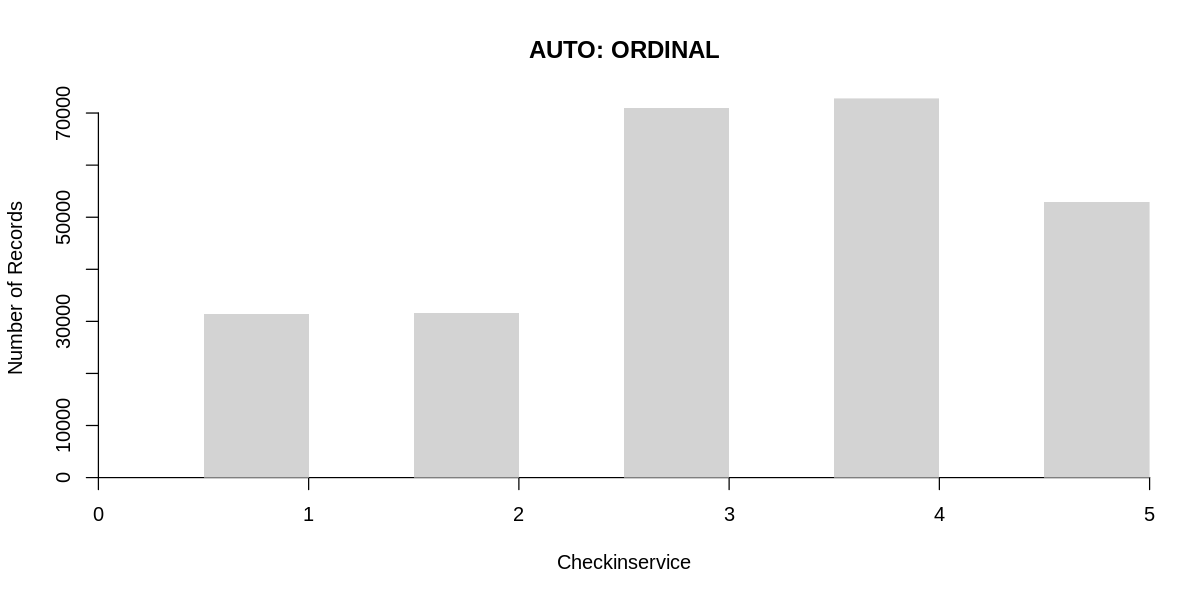

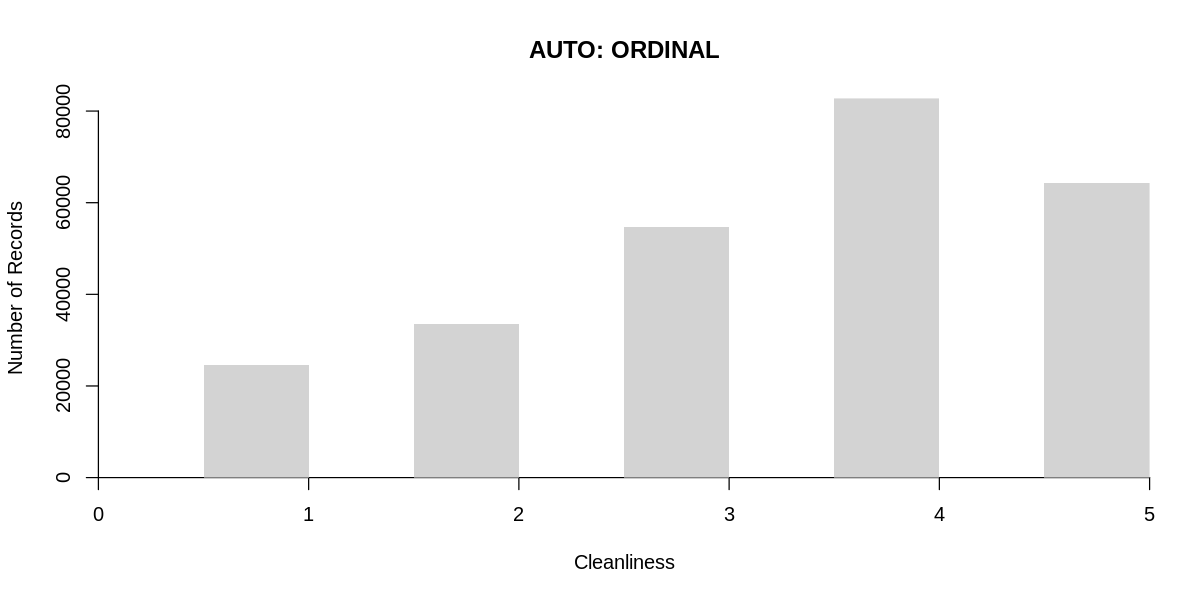

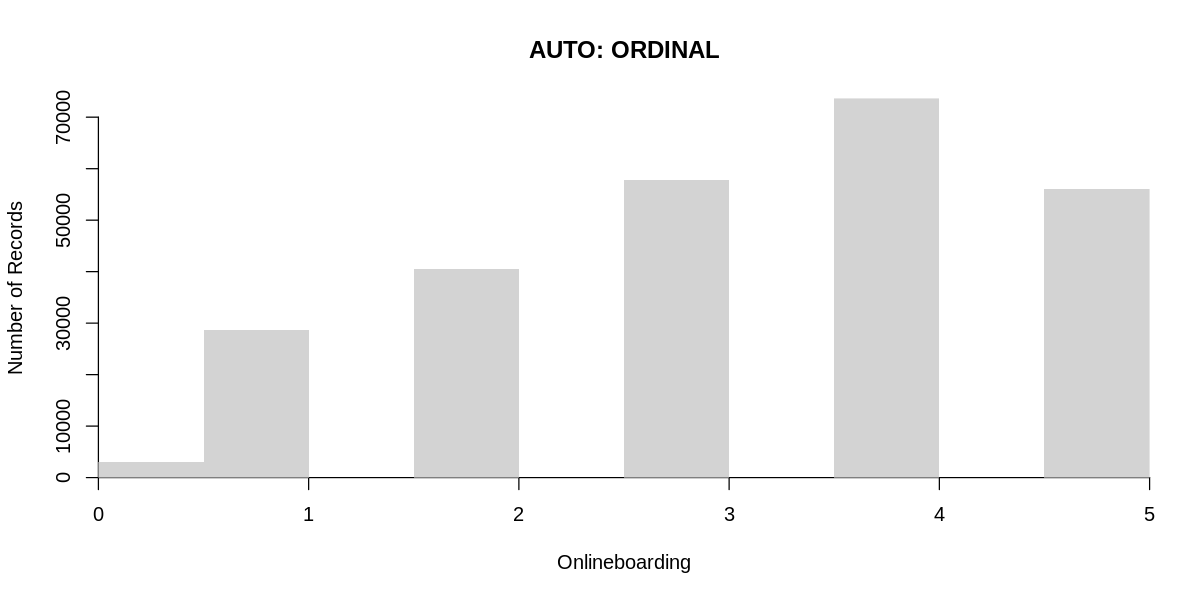

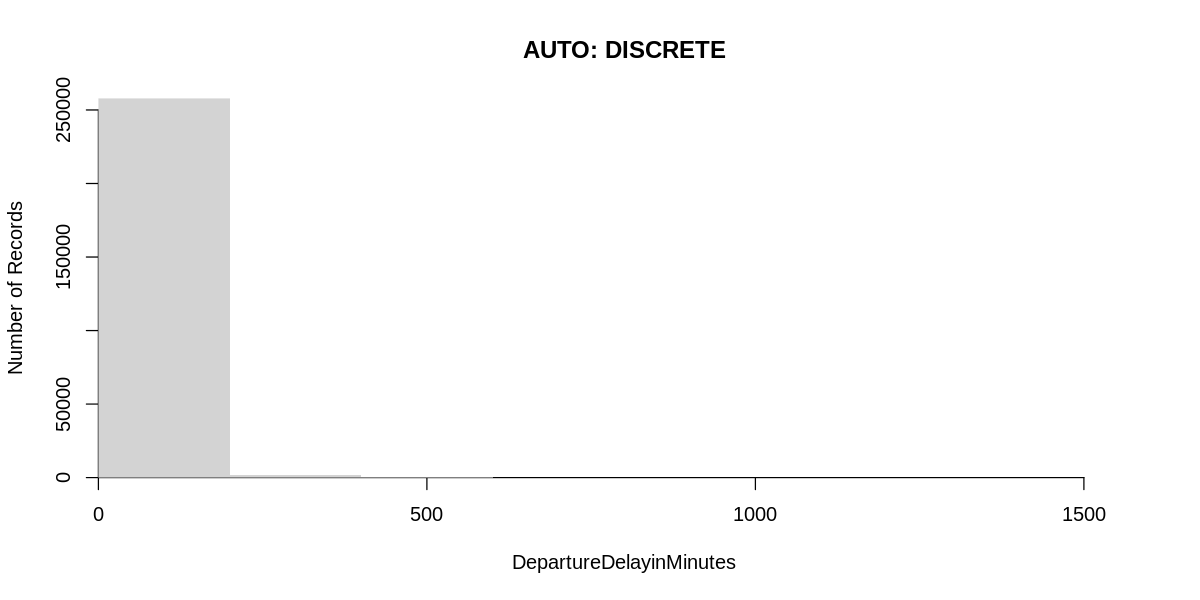

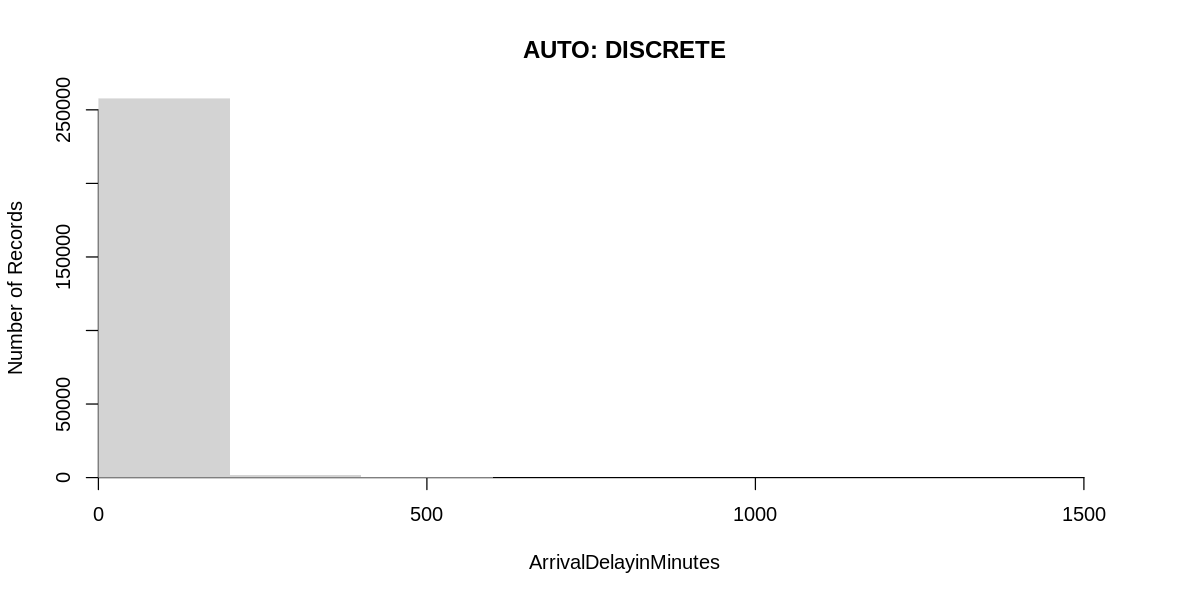

In [39]:
# Number of empty bins to determine discrete
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [40]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field                          initial  types    is_sat is_time is_dis
1  satisfactionv2                 SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
2  Gender                         SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
3  CustomerType                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
4  Age                            NUMERIC  ORDINAL  NOTSAT NOTTIME NOTDIS
5  TypeofTravel                   SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
6  Class                          SYMBOLIC SYMBOLIC NOTSAT NOTTIME NOTDIS
7  FlightDistance                 NUMERIC  DISCRETE NOTSAT NOTTIME DIS   
8  Seatcomfort                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
9  DepartureArrivaltimeconvenient NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
10 Foodanddrink                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
11 Gatelocation                   NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
12 Inflightwifiservice            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
13 Inflightentertainment          NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
14 EaseofOnlinebooking            NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
15 Onboardservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
16 Legroomservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
17 Baggagehandling                NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
18 Checkinservice                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
19 Cleanliness                    NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
20 Onlineboarding                 NUMERIC  ORDINAL  SAT    NOTTIME NOTDIS
21 DepartureDelayinMinutes        NUMERIC  DISCRETE NOTSAT TIME    NOTDIS
22 ArrivalDelayinMinutes          NUMERIC  DISCRETE NOTSAT TIME    NOTDIS

## Remove outlier in ordinals fields

The next step before starting a preprocessing a dataset is removing an outlier from  ordinals fields and replace it with mean of each fields

[1] "Outlier field= Age Records= 12 Replaced with MEAN"


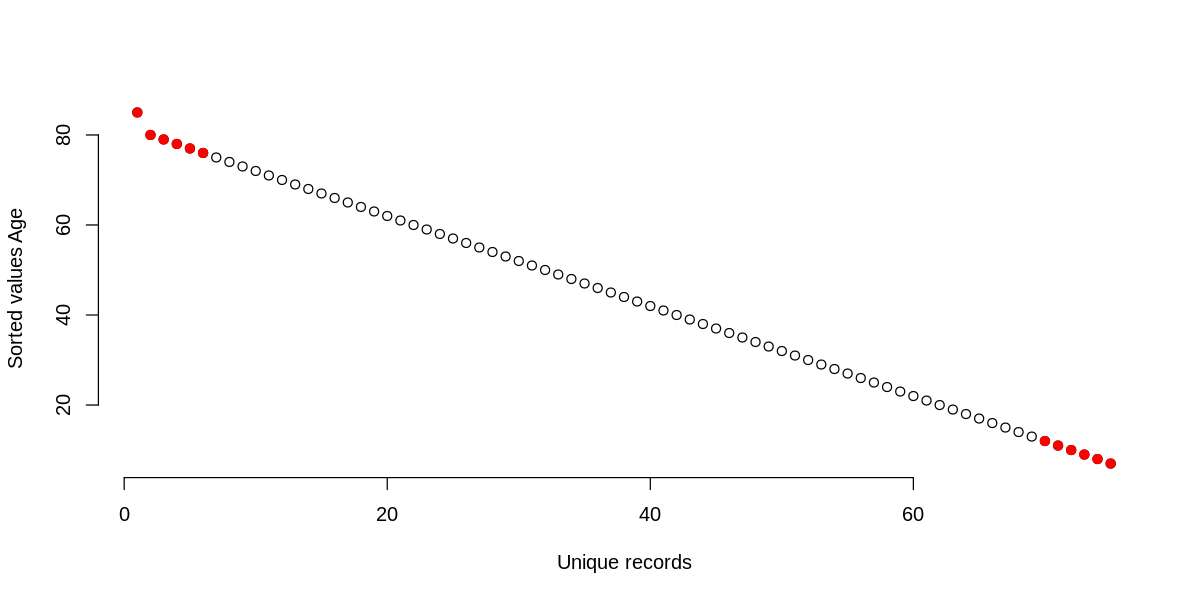

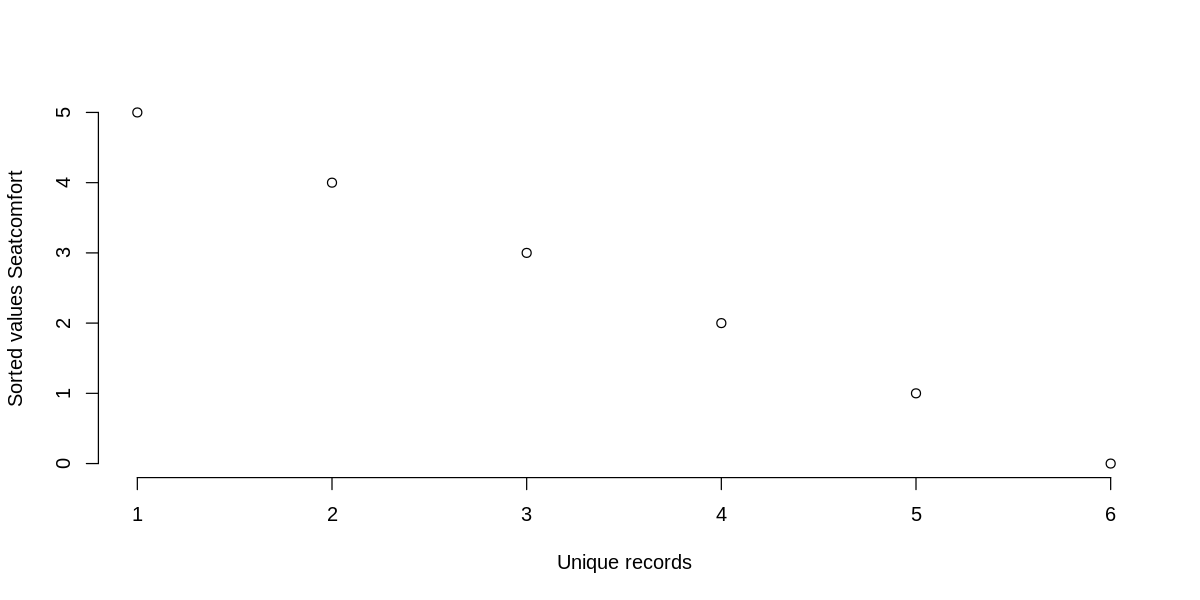

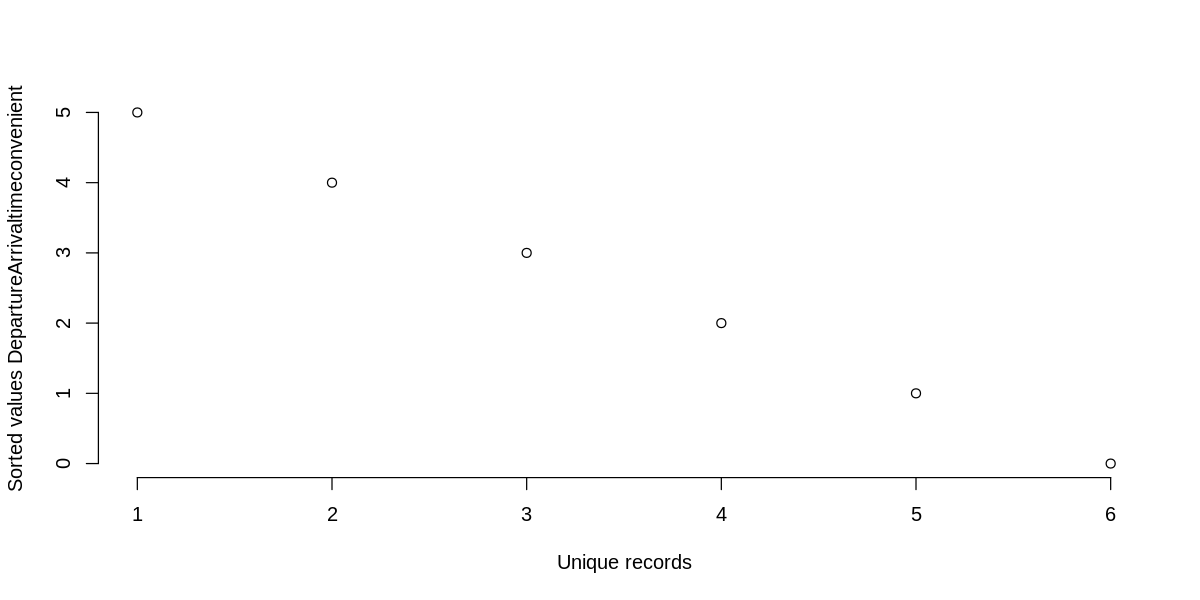

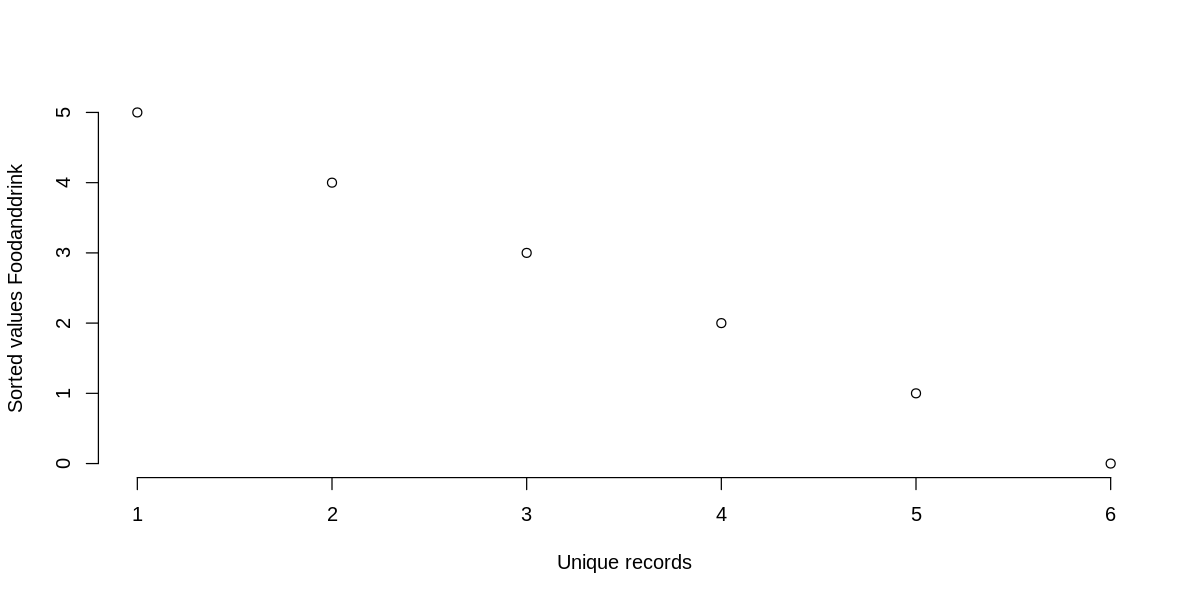

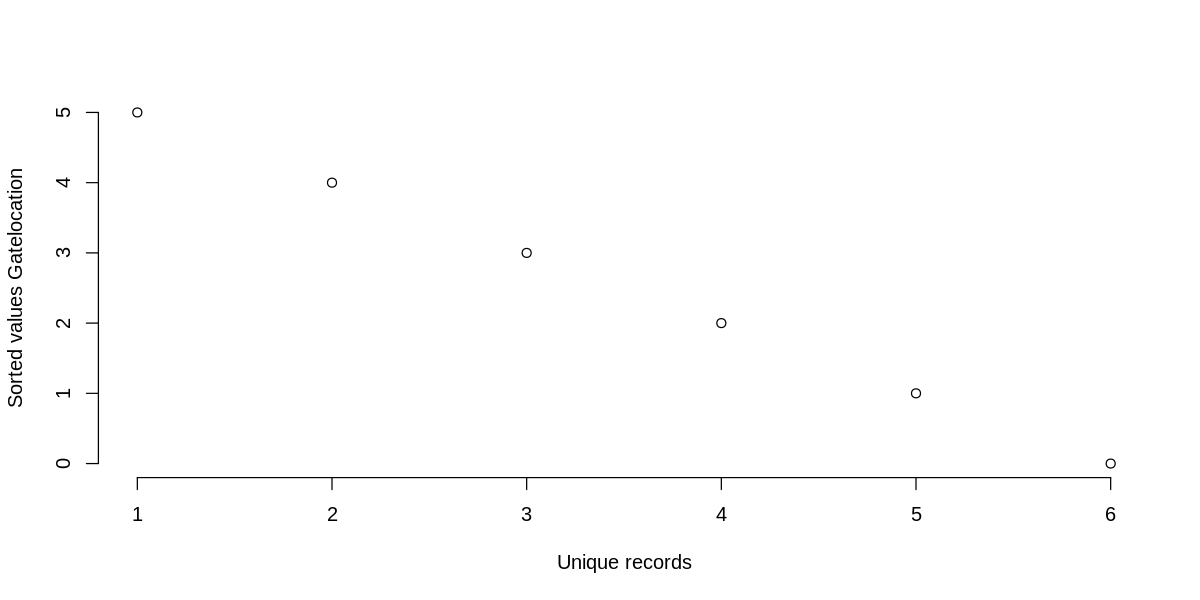

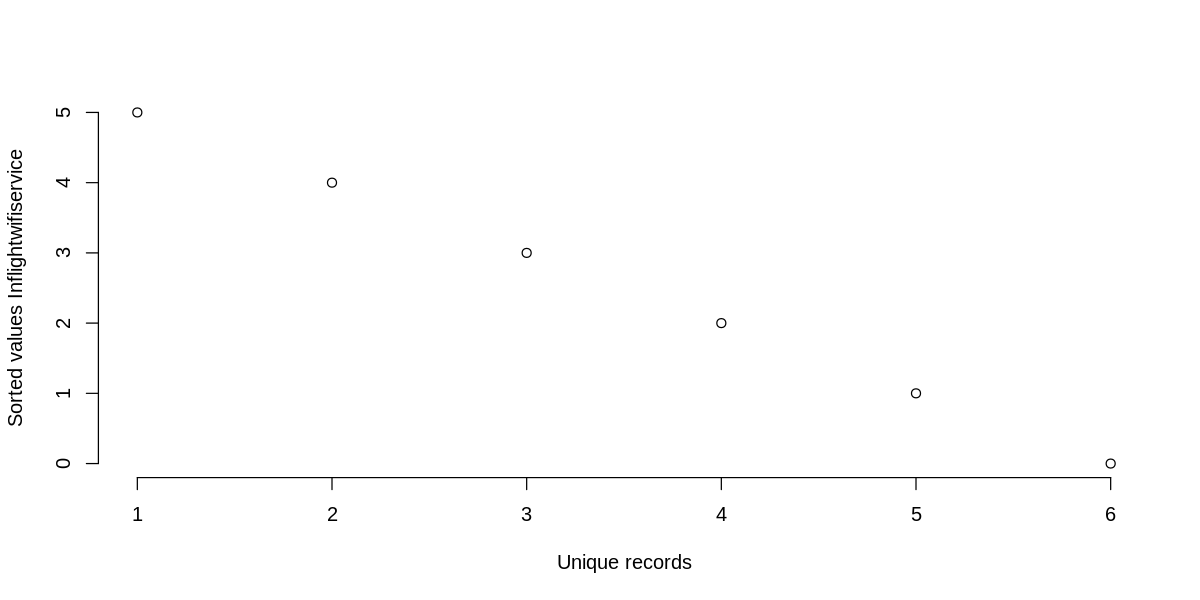

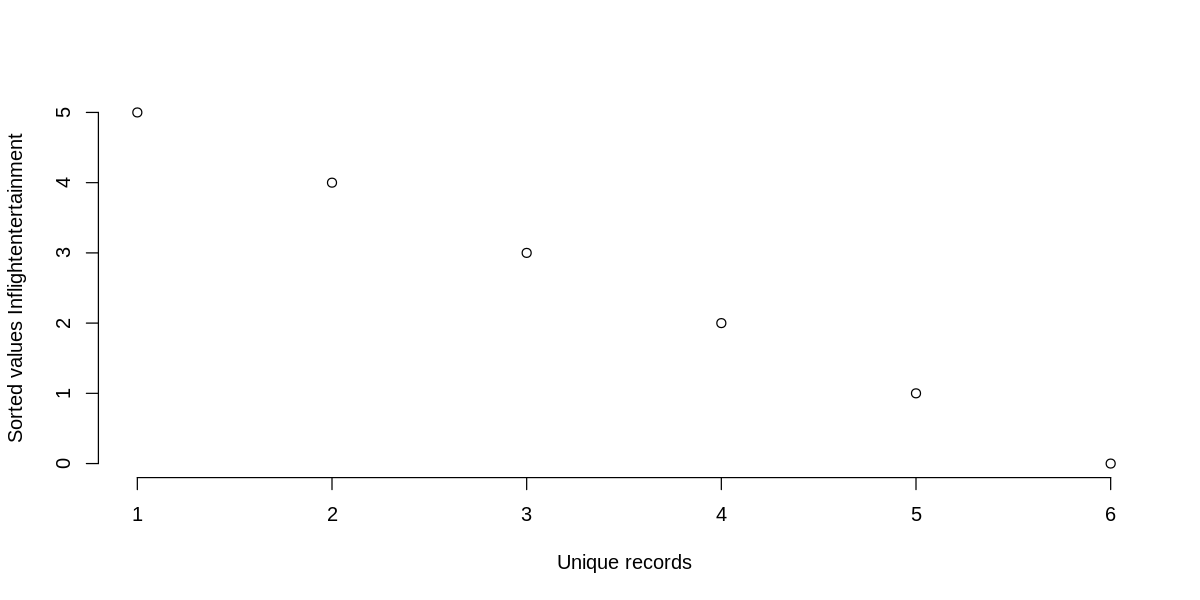

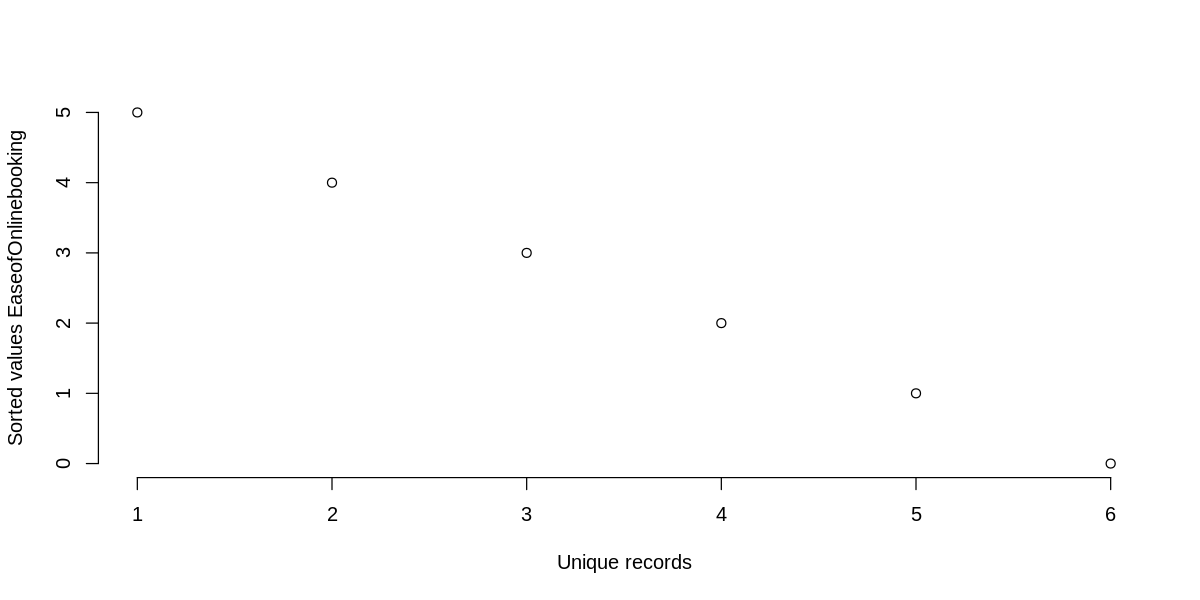

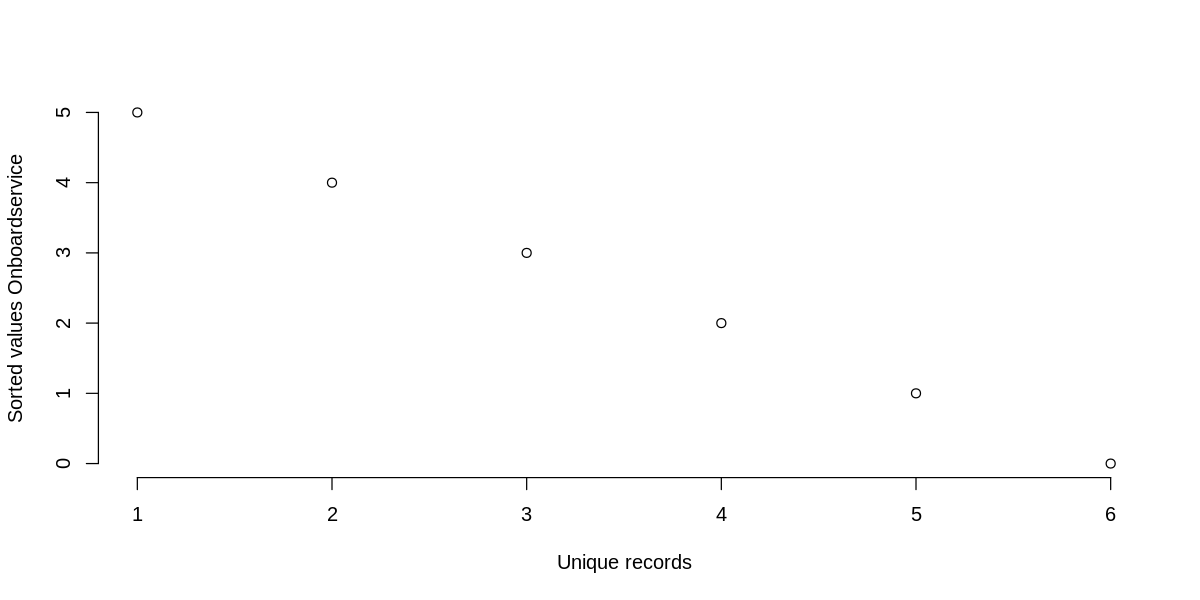

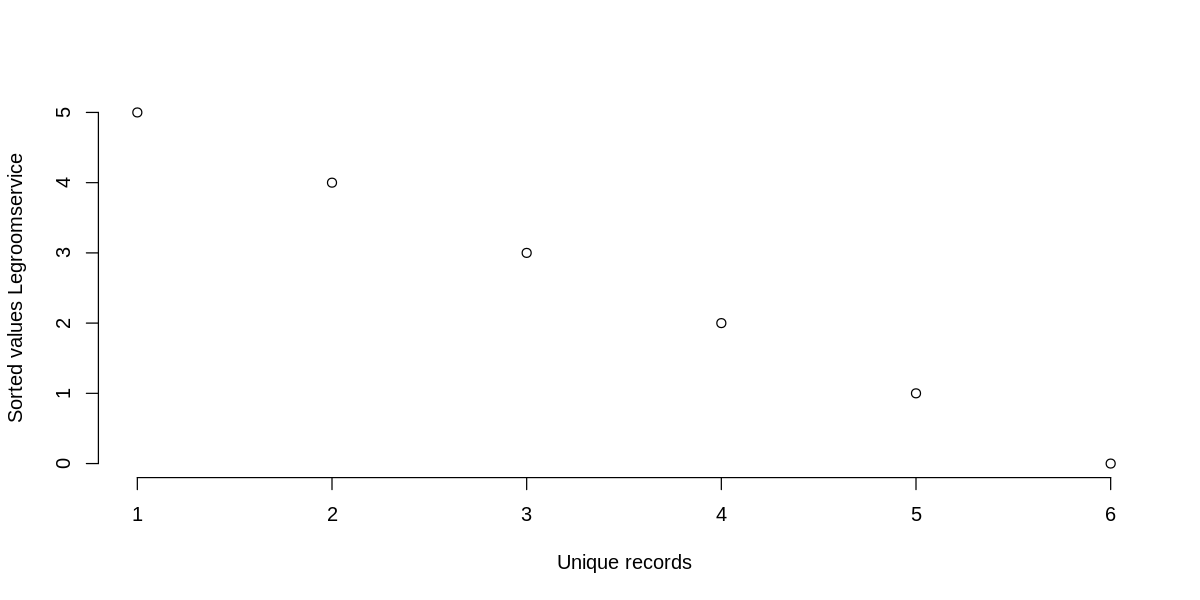

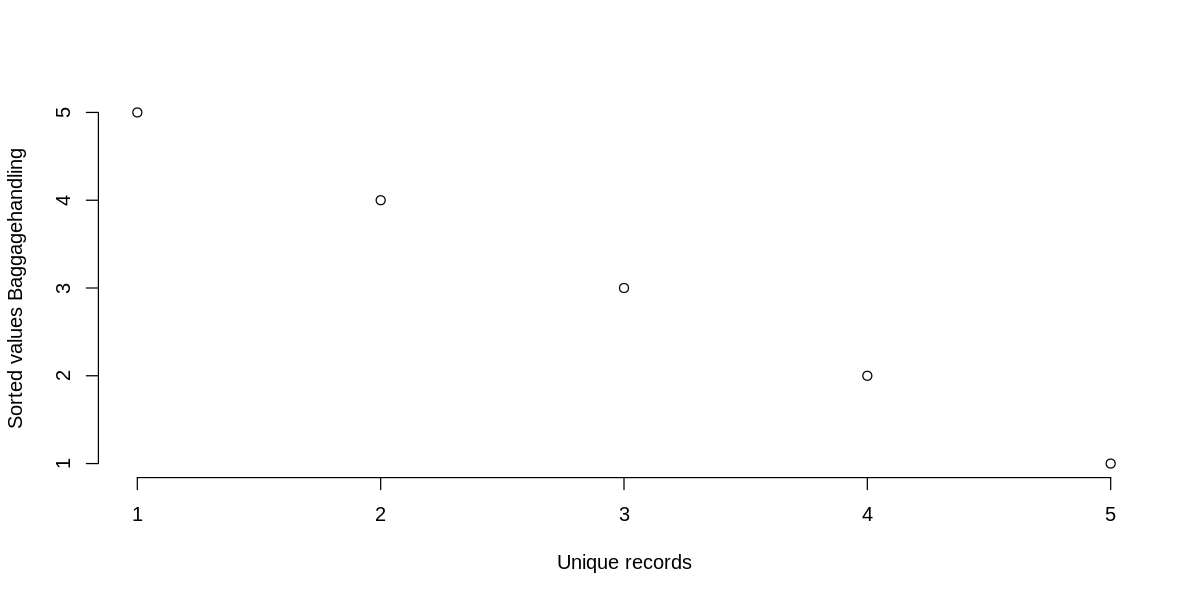

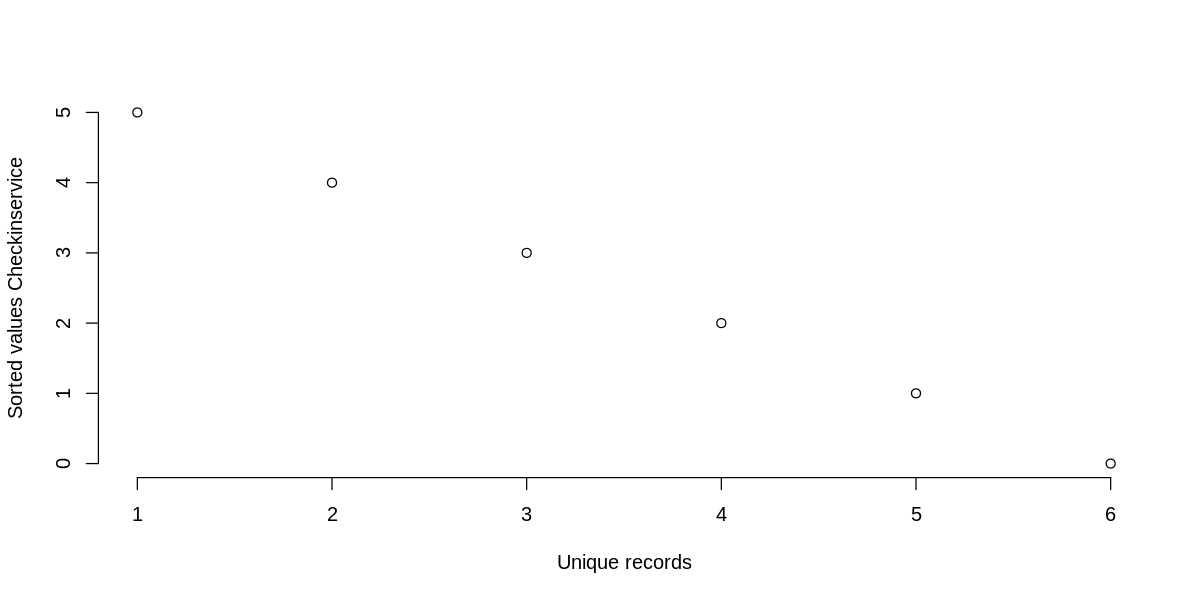

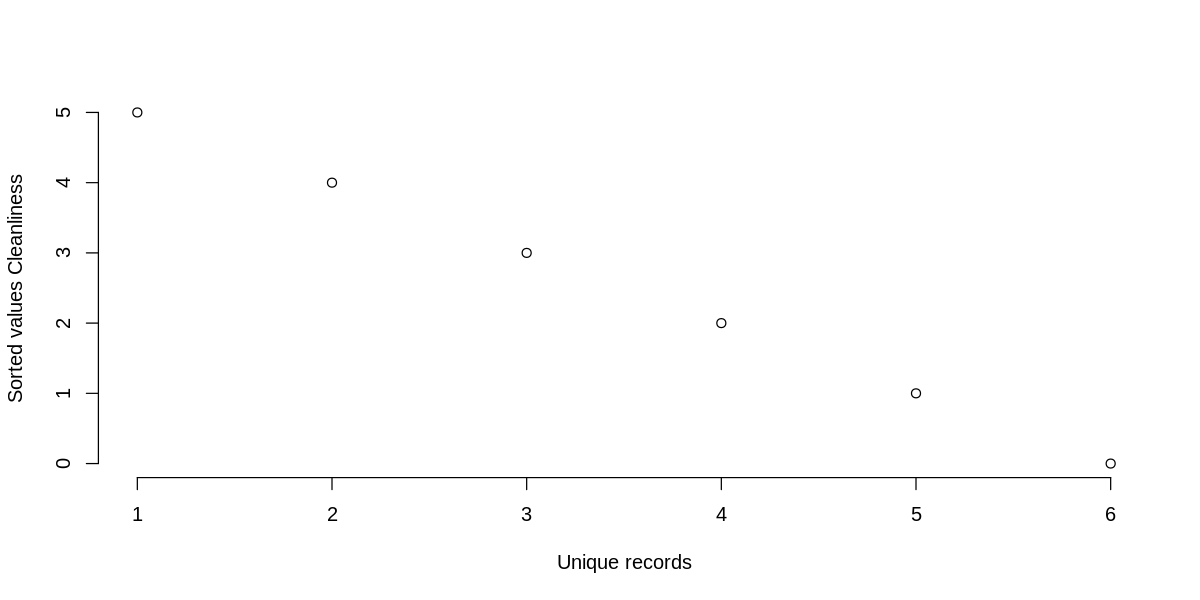

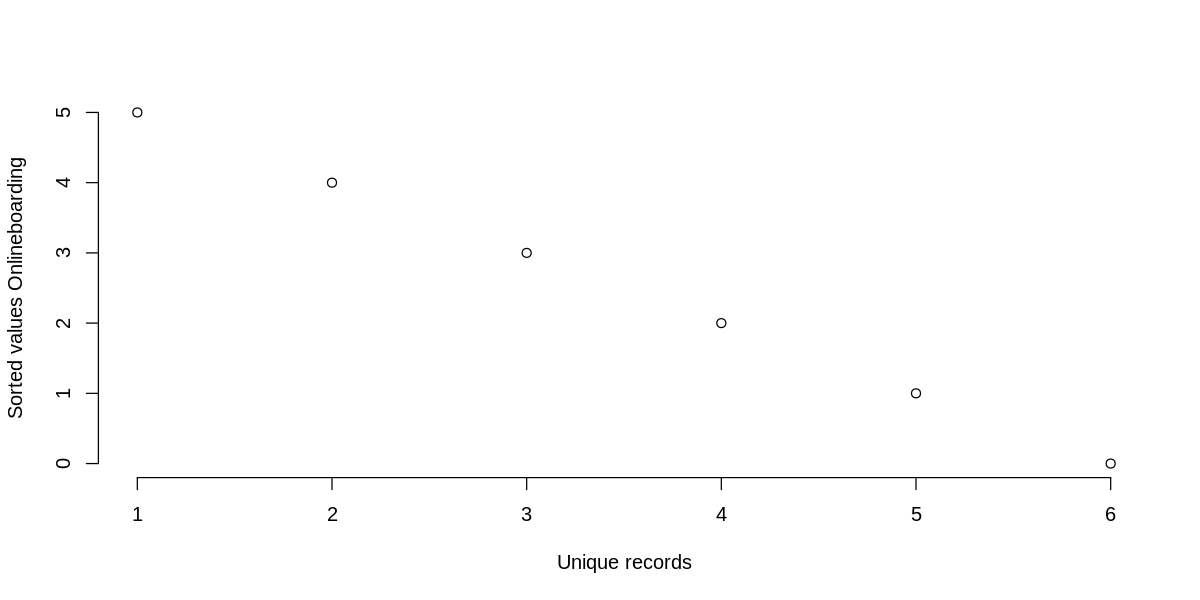

In [41]:
OUTLIER_CONF = 0.85
# get a dataframe contains only ordinals fields
ordinals<-dataset[,which(field_types_ord_dis=='ORDINAL')]
# remove outlier and replace it with means value
ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)

In [42]:
# replace an old ordinal field with new ordinal value after remove outlier
dataset[,names(ordinals)]<-ordinals

In [43]:
######
# 
# Rescale a satisfaction scale column in range of 0.0-1.0
# Input:  columns contain a rating of satisfaction of passenger 
# Return: Normalize value in a range of 0-1
#
######
Preprocess_satscale<-function(input){
    
    
    # max and min is  5 and 0 respectively since the scale is from 0 to 5
    minscale<-0.0
    maxscale<-5.0
    
    rescale<- ((input-minscale)/(maxscale-minscale))
    
    return(rescale)
}
######
#
# Apply linear normalization for rescale a value in a fields into range 0-1
# Inputs : columns containig ordinal values
# Return : Normalize value in a range of 0-1
#
####
Preprocess_ordinalscale<-function(input){
    
     minscale<-min(input)
     maxscale<-max(input)
    
    rescale<- ((input-minscale)/ (maxscale-minscale))
    
    return(rescale)

}

########
#
# Normailze an entire dataframe into range of 0-1
# Inputs : dataframe containig ordinal values
# Return : Normalize dataframe
#
######
Preprocess_dataframe<-function(dataset,sat){
    
    # if this dataframe containing satisfaction rating then apply Preproccess_satscale
    if(sat==TRUE){
  
        fields<-sapply(as.data.frame(dataset),Preprocess_satscale)
   
    }else{
   
        fields<-sapply(as.data.frame(dataset),Preprocess_ordinalscale)
    }
    
    return(fields)
}


#######
#
# Preprocess Ordinal Value
# Inputs : Dataset , fieldtype of dataset
# Return : dataframe containing processed ordinal values
#
#######
Preprocess_ordinal<-function(dataset,fieldtype){
    
   
   sat_position<-which(fieldtype[,'is_sat']=='SAT')

   sat_fields=dataset[,sat_position]
  
   sat_fields<-Preprocess_dataframe(sat_fields,TRUE)
    
   ordinal<-which(fieldtype[,'types']=='ORDINAL')
  
   other_position<- ordinal[!(ordinal %in% sat_position)]
    
   colname = names(dataset[other_position])
   other_ordinal<-dataset[,other_position]
   
 
   other_ordinal<-Preprocess_dataframe(other_ordinal, FALSE)
    
   colnames(other_ordinal) <- colname
    
   processed<- cbind(other_ordinal,sat_fields)
  
   return(processed)
     
  
}

## Preprocess ordinals values


### Satisfaction fields


##### Normalization (satisfaction fields) : $ Xnormalize = \frac{X}{5}$

For ordinal fields which contains a rating of a passenger satisfaction, these field will be normalize by value of 5 which is the different between maximum rating (5) and minimum rating(0). Instead of normalize by a maximum and minimum value in each colums since some fill its does not contains a minimum rating but we want to normalize in a same scale for all the field containing rating information. The range of the value after normalize will be in a range of 0.0 to 1.0. 

### Others Ordinal fields

##### Normalization (satisfaction fields) :  $ Xnormalize = \frac{X-X\min}{X\max -X\min} $

For others ordinal fields, each colums will be normalize by substract the value with the minimum vaue and divide by the different between maximum and minimum values. The range of the value after normalize will be in a range of 0.0 to 1.0. 

In [44]:
# call function Preprocess ordinal which will normalize a value according to type of its fields
processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age       Seatcomfort DepartureArrivaltimeconvenient Foodanddrink
[1,] 0.7945205 0           0                              0           
[2,] 0.5479452 0           0                              0           
[3,] 0.1095890 0           0                              0           
[4,] 0.7260274 0           0                              0           
[5,] 0.8630137 0           0                              0           
[6,] 0.3150685 0           0                              0           
     Gatelocation Inflightwifiservice Inflightentertainment EaseofOnlinebooking
[1,] 0.4          0.4                 0.8                   0.6                
[2,] 0.6          0.0                 0.4                   0.6                
[3,] 0.6          0.4                 0.0                   0.4                
[4,] 0.6          0.6                 0.8                   0.2                
[5,] 0.6          0.8                 0.6                   0.4                
[6,] 0.6          0.4                 0.0                   0.4                
     Onboardservice Legroomservice Baggagehandling Checkinservice Cleanliness
[1,] 0.6            0.0            0.6             1.0            0.6        
[2,] 0.8            0.8            0.8             0.4            0.6        
[3,] 0.6            0.6            0.8             0.8            0.8        
[4,] 0.2            0.0            0.2             0.8            0.2        
[5,] 0.4            0.0            0.4             0.8            0.4        
[6,] 1.0            0.8            1.0             1.0            0.8        
     Onlineboarding
[1,] 0.4           
[2,] 0.4           
[3,] 0.4           
[4,] 0.6           
[5,] 1.0           
[6,] 0.4

In [45]:
#######
#
#Convert a time delay in minutes into 3 numbers represent 3 categories
#
# 1. No Delays
# 2. 0-30 minutes delays
# 3. 30 and above delays
#
#Inputs : columns containig time delays in minutes
#Output : columns containd symbolic values of time delays
#
#######
Convert_minuteDelay<-function(data){
    
   
    out<-ifelse(data==0,'0',
         ifelse(data<30,"1",
         ifelse(data<60,"2","3")))
    
    return((out))
}

Convert_FlightDistance<-function(data){
    
    
    
}

########
#
#Convert a dataframe containing time delay in minutes to symbolic values
#Inputs : dataframe containing a time in minutes
#Output : dataframe contatinig symbolic values of time delay
#
########
Process_timeDelay<-function(dataset){
    
    out<-sapply(dataset,Convert_minuteDelay)
  
    return(out)
}

Process_distance<-function(dataset){
    
    }

## Preprocess Categorical (Symbolic and Discrete values)

For preprocessing a Symbolic and Discrete values, symbolic values will be transform from symbolic value to on hot encoding directly. And for discrete values, it will be convert to a symbolic values first then transform those value to a form of on hot encoding. 

### Convert Discrete values to symbolic 

The fields ***('DepatureDelayinMinutes'), ('ArrivalDelayinMinutes') and ('FlightDistance')*** are discrete fields that need to be convert to symbolic value before tranforming it to one hot encoding.


For ***('DepatureDelayinMinutes') and  ('ArrivalDelayinMinutes')*** fields, we convert a delay to 4 symbolic values

- Value 0 for a delay time equal to 0 minutes or no delay
- Value 1 for a delay time from 1 to 29 minutes
- Value 2 for a delay time from 30 to 59 minutes
- Value 3 for a delay time from 60 minutes above

For ***('Flightdistance')***




In [46]:
# get symbolic and discrete data 
categor_data<-dataset[,symbolic_index]
time_data<-dataset[,time_field]
distance_data<-dataset[,distance_field]

# convert a discrete value to symbolic values
time_data<-Process_timeDelay(time_data)


# combine symbolic data with converted discrete data
categor_data<-cbind(categor_data,time_data)
#categor_data<-cbind(categor_data,distance_data)
head(categor_data)

satisfactionv2 Gender CustomerType   TypeofTravel    Class   
1 satisfied      Female Loyal Customer Personal Travel Eco     
2 satisfied      Male   Loyal Customer Personal Travel Business
3 satisfied      Female Loyal Customer Personal Travel Eco     
4 satisfied      Female Loyal Customer Personal Travel Eco     
5 satisfied      Female Loyal Customer Personal Travel Eco     
6 satisfied      Male   Loyal Customer Personal Travel Eco     
  DepartureDelayinMinutes ArrivalDelayinMinutes
1 0                       0                    
2 3                       3                    
3 0                       0                    
4 0                       0                    
5 0                       0                    
6 0                       0

After converted a discrete value to symbolic value then combine the data together in a same dataframe.

### Transform both symbolic and discrete data to one hot encoding

Then we transform a dataframe containing both symbolic and discrete into a form of one hot encoding.

In [47]:
####
#
# Function from lab 3
#
####
Preprocess_categorical<-function(dataset){

  catagorical<-data.frame()

  field_name<-names(dataset)

  for (field in field_name){

    # Convert into factors. A level for each unique string
    ffield<-factor(dataset[,field])

 

    # 1-hot encoding. A new column for each unique "level"
    xx<-data.frame(model.matrix(~ffield+0, data=ffield))

    names(xx)<-gsub("ffield",field,names(xx))

    # If 2 unique values, then can encode as a single "binary" column
    if (ncol(xx)==2){
      xx<-xx[,-2,drop=FALSE]
      names(xx)<-field  # Field name without the value appended
    }

  catagorical<-as.data.frame(append(catagorical,xx))

  } #endof for()
  return (catagorical)

} # endof categorical_encoding()

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
1 0              1      0            0            0             1       
2 0              0      0            0            1             0       
3 0              1      0            0            0             1       
4 0              1      0            0            0             1       
5 0              1      0            0            0             1       
6 0              0      0            0            0             1       
  ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
1 0             1                        0                       
2 0             0                        0                       
3 0             1                        0                       
4 0             1                        0                       
5 0             1                        0                       
6 0             1                        0                       
  DepartureDelayinMinutes2 DepartureDelayinMinutes3 ArrivalDelayinMinutes0
1 0                        0                        1                     
2 0                        1                        0                     
3 0                        0                        1                     
4 0                        0                        1                     
5 0                        0                        1                     
6 0                        0                        1                     
  ArrivalDelayinMinutes1 ArrivalDelayinMinutes2 ArrivalDelayinMinutes3
1 0                      0                      0                     
2 0                      0                      1                     
3 0                      0                      0                     
4 0                      0                      0                     
5 0                      0                      0                     
6 0                      0                      0

In [48]:
a <-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]

In [49]:
s<-summary(a)

### Combine processed Ordinal data and Categorical

After combine both preprocess dataset then the data is ready to be feed to model 

In [126]:
processed_data<-cbind(processed_catdata, processed_ordinal)
#processed_data<-cbind(processed_data,time_data)

In [127]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)

In [128]:
tail(processed_data)

satisfactionv2 Gender CustomerType TypeofTravel ClassBusiness ClassEco
259755 1              0      0            1            0             1       
259756 1              1      0            1            1             0       
259757 1              1      0            1            0             1       
259758 1              0      0            1            1             0       
259759 1              1      0            1            1             0       
259760 1              1      0            1            1             0       
       ClassEco.Plus DepartureDelayinMinutes0 DepartureDelayinMinutes1
259755 0             1                        0                       
259756 0             1                        0                       
259757 0             0                        0                       
259758 0             1                        0                       
259759 0             1                        0                       
259760 0             1                        0                       
       DepartureDelayinMinutes2 ⋯ Gatelocation Inflightwifiservice
259755 0                        ⋯ 0.4          1.0                
259756 0                        ⋯ 1.0          1.0                
259757 0                        ⋯ 0.2          1.0                
259758 0                        ⋯ 0.2          0.2                
259759 0                        ⋯ 0.2          0.2                
259760 0                        ⋯ 0.2          0.2                
       Inflightentertainment EaseofOnlinebooking Onboardservice Legroomservice
259755 1                     0.4                 0.4            0.8           
259756 1                     1.0                 1.0            1.0           
259757 1                     0.2                 1.0            0.8           
259758 1                     0.2                 0.2            0.6           
259759 1                     0.2                 0.8            0.8           
259760 1                     0.6                 0.4            1.0           
       Baggagehandling Checkinservice Cleanliness Onlineboarding
259755 0.6             0.8            1.0         1.0           
259756 1.0             1.0            0.8         0.4           
259757 0.2             0.4            1.0         1.0           
259758 0.2             1.0            0.4         1.0           
259759 0.4             1.0            1.0         1.0           
259760 0.8             1.0            1.0         1.0

In [129]:
str(processed_data)

'data.frame':	259760 obs. of  29 variables:
 $ satisfactionv2                : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Gender                        : num  1 0 1 1 1 0 1 0 1 0 ...
 $ CustomerType                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ TypeofTravel                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ClassBusiness                 : num  0 1 0 0 0 0 0 0 1 0 ...
 $ ClassEco                      : num  1 0 1 1 1 1 1 1 0 1 ...
 $ ClassEco.Plus                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DepartureDelayinMinutes0      : num  1 0 1 1 1 1 0 1 1 0 ...
 $ DepartureDelayinMinutes1      : num  0 0 0 0 0 0 1 0 0 0 ...
 $ DepartureDelayinMinutes2      : num  0 0 0 0 0 0 0 0 0 1 ...
 $ DepartureDelayinMinutes3      : num  0 1 0 0 0 0 0 0 0 0 ...
 $ ArrivalDelayinMinutes0        : num  1 0 1 1 1 1 0 1 1 0 ...
 $ ArrivalDelayinMinutes1        : num  0 0 0 0 0 0 1 0 0 1 ...
 $ ArrivalDelayinMinutes2        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ArrivalDelayinMinutes3        : num  0 1 0 0 0 0 0 0 0 0 

# Model

In [130]:
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
#                'Gender',
#                 'CustomerType',
#                 'TypeofTravel',
#                 'ClassBusiness',
#                 'ClassEco',
#                 'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
#                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))
names(processed_data)


processed_data<-processed_data[,select_field]
processed_data<-processed_data[sample(nrow(processed_data)),]
training_records<-round(nrow(processed_data)*(70/100))
training_data <- processed_data[1:training_records,]
testing_data <- processed_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))


[1] "Select Fields"
 [1] "satisfactionv2"                 "Seatcomfort"                   
 [3] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
 [5] "Gatelocation"                   "Inflightwifiservice"           
 [7] "Inflightentertainment"          "EaseofOnlinebooking"           
 [9] "Onboardservice"                 "Legroomservice"                
[11] "Baggagehandling"                "Checkinservice"                
[13] "Cleanliness"                    "Onlineboarding"                


[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "Age"                           
[17] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[19] "Foodanddrink"                   "Gatelocation"                  
[21] "Inflightwifiservice"            "Inflightentertainment"         
[23] "EaseofOnlinebooking"            "Onboardservice"                
[25] "Legroomservice"                 "Baggagehandling"               
[27] "Checkinservice"                 "Cleanliness"                   
[29] "Onlineboarding"

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


### Model Formular 

In [131]:
# Function from lab
myModelFormula<-function(dataset,fieldNameOutput,selectField){
     
  inputs<-paste(names(dataset)[which(names(dataset)!=fieldNameOutput )],collapse = "+")

  output<-paste(fieldNameOutput,"~")

  formular=as.formula(paste(output,inputs))

  return(formular)

} 

formula= myModelFormula(training_data,OUTPUT_FIELD)
formula

satisfactionv2 ~ Seatcomfort + DepartureArrivaltimeconvenient + 
    Foodanddrink + Gatelocation + Inflightwifiservice + Inflightentertainment + 
    EaseofOnlinebooking + Onboardservice + Legroomservice + Baggagehandling + 
    Checkinservice + Cleanliness + Onlineboarding
<environment: 0x561a720c39f0>

In [132]:
## Logistic Regression

In [133]:
## Decision Tree

In [134]:
## Random Forest Regression

In [135]:
## Kmeans Clustering

In [136]:
## K-nearest Neighbour

In [137]:
## Support Vector Machine

library(e1071)

svm_training = training_data[1:5000,]
y_svm_test = testing_data[1:500,1]
x_svm_test = testing_data[1:500,-1]
 
classifier = svm(formula = satisfactionv2 ~ .,
                 data = svm_training,
                 type = 'C-classification',
                 kernel = 'radial')


In [123]:
classifier


Call:
svm(formula = satisfactionv2 ~ ., data = svm_training, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2231


In [124]:
y_pred <- predict(classifier, newdata= x_svm_test)
table(y_svm_test,y_pred)

          y_pred
y_svm_test   0   1
         0 212  54
         1  27 207

Inflightwifiservice ~ Seatcomfort
Inflightentertainment ~ Seatcomfort


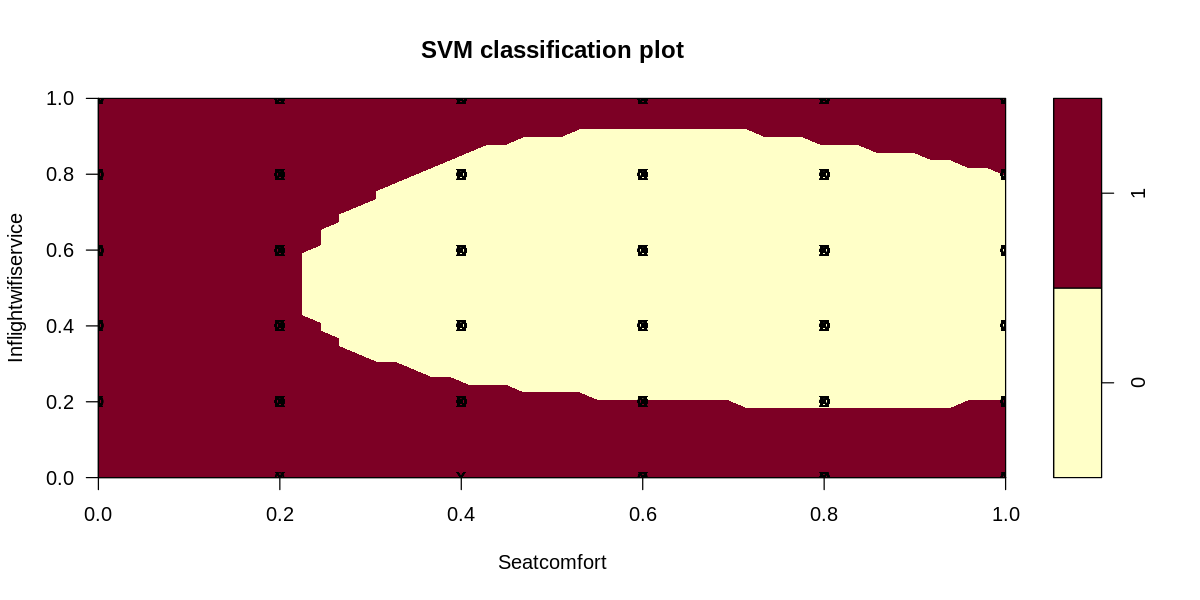

EaseofOnlinebooking ~ Seatcomfort


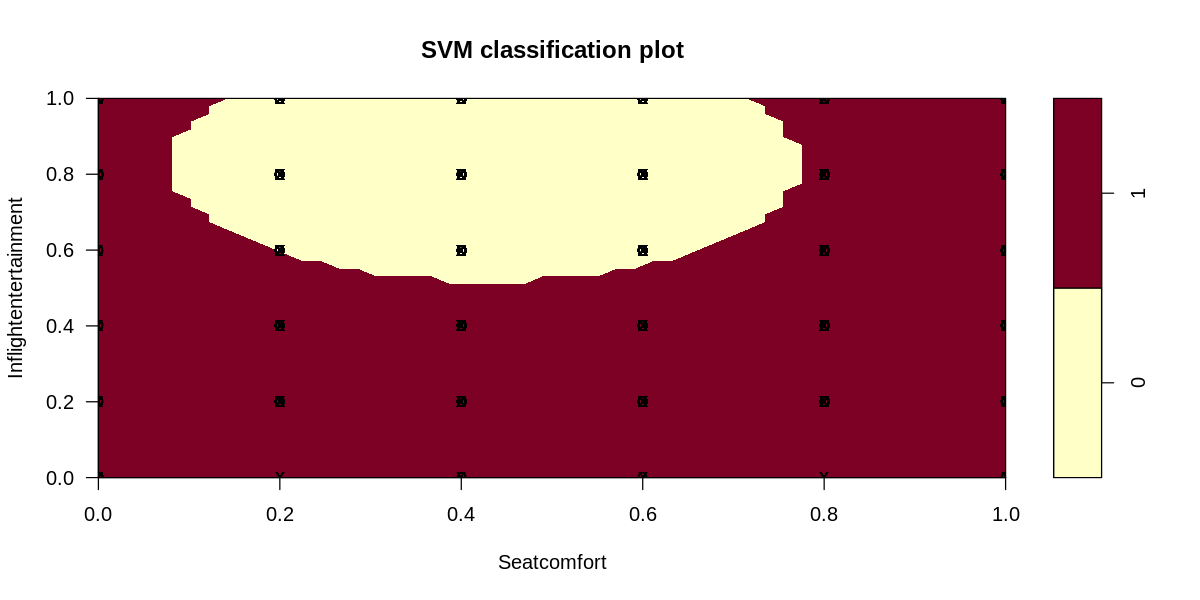

Baggagehandling ~ Seatcomfort


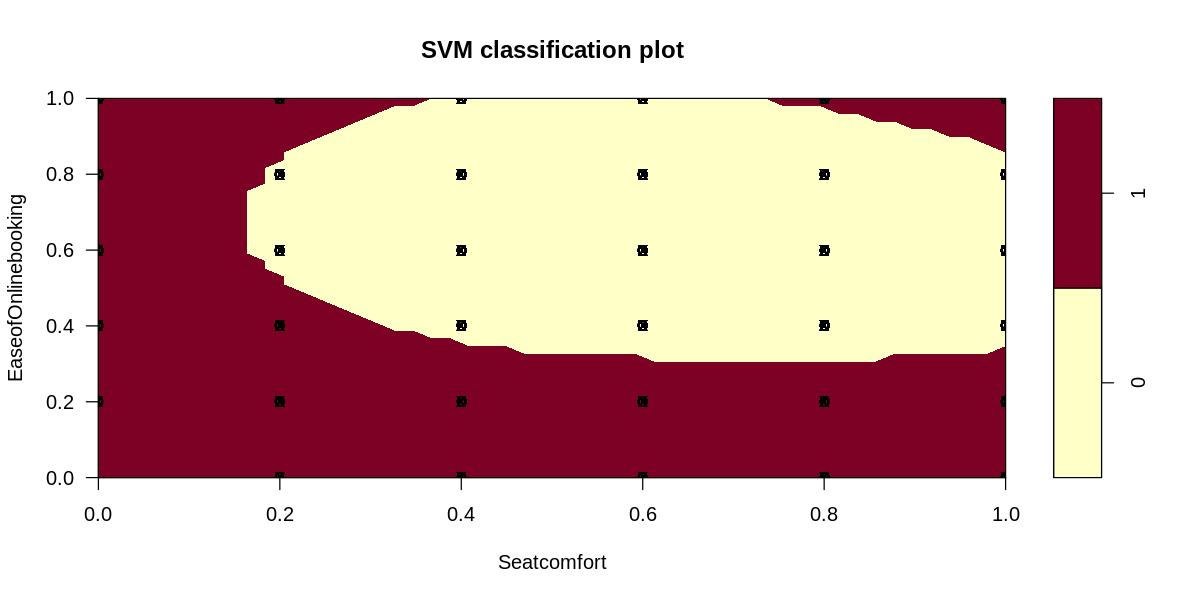

Cleanliness ~ Seatcomfort


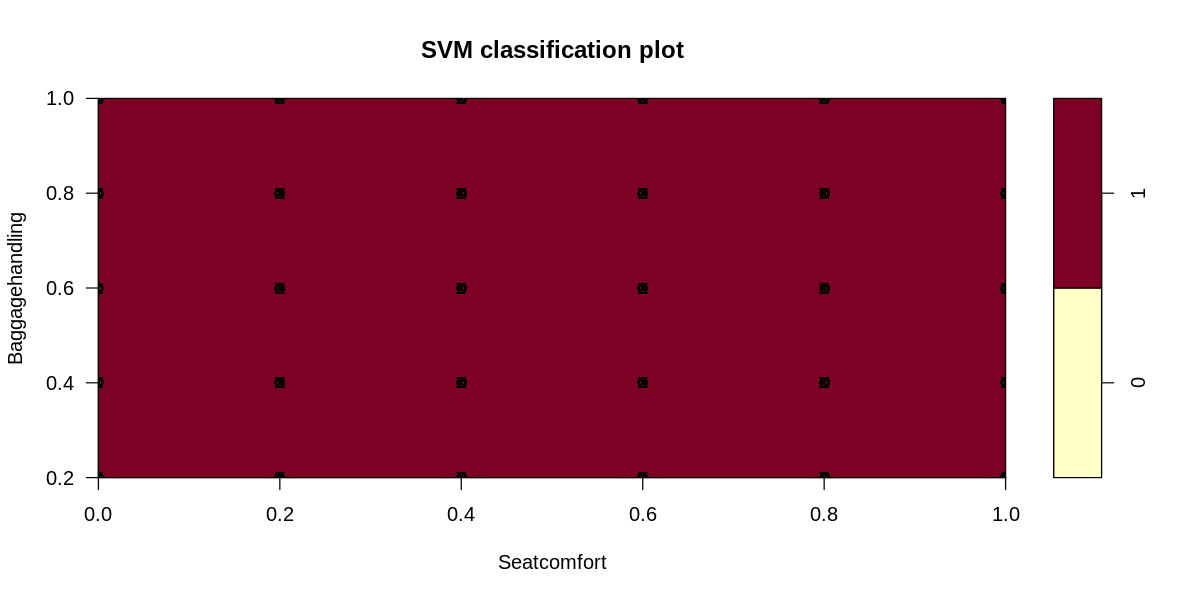

Seatcomfort ~ Inflightwifiservice


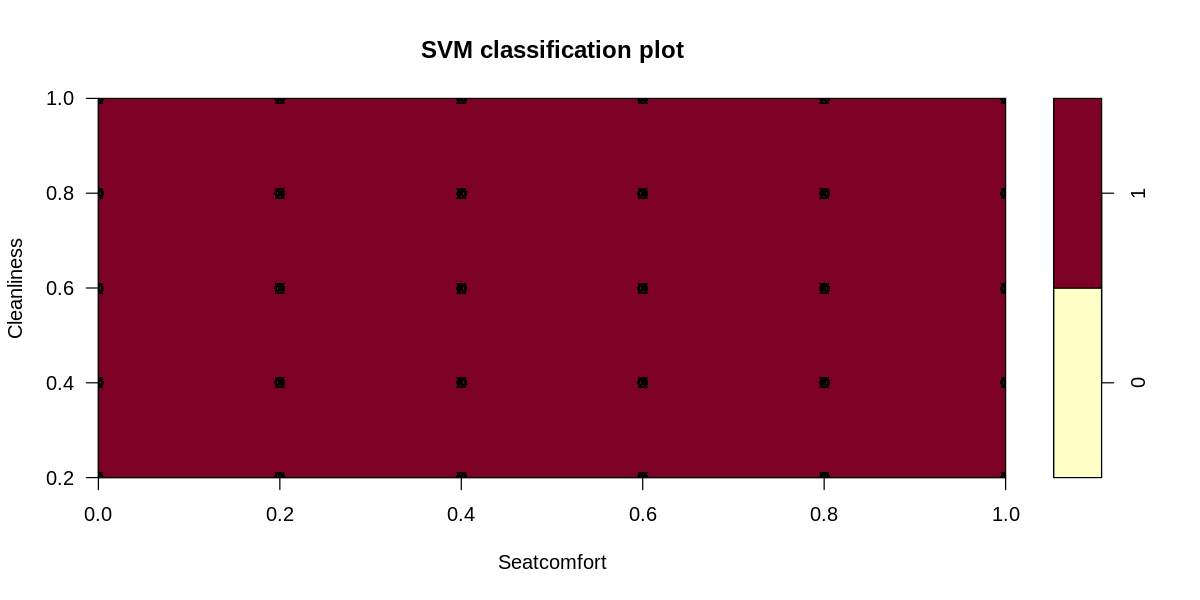

Inflightentertainment ~ Inflightwifiservice


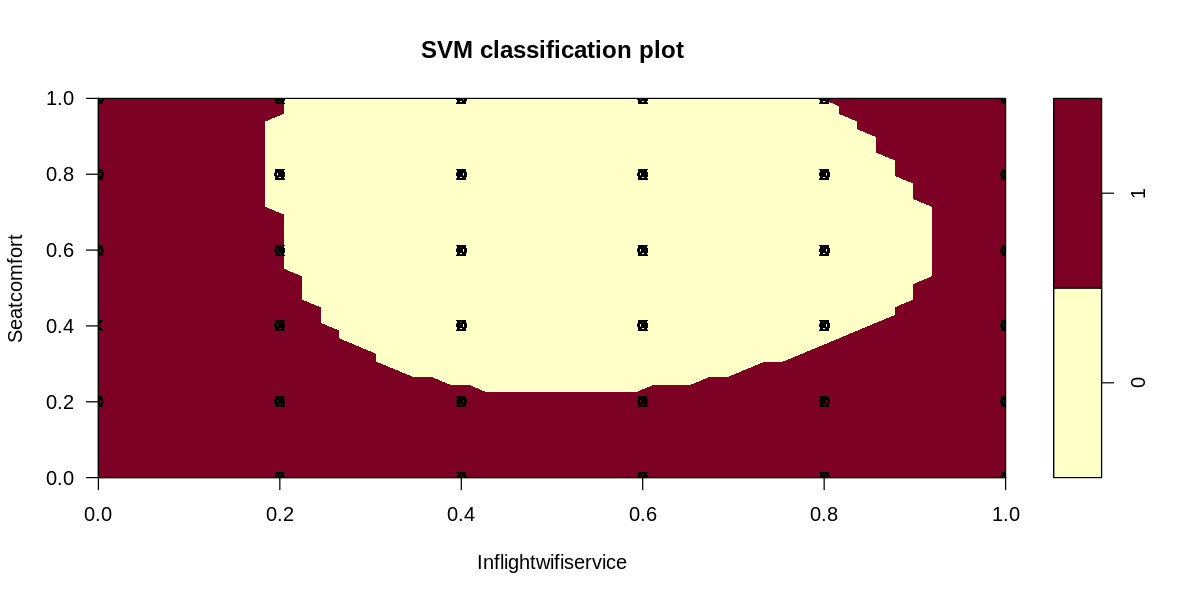

EaseofOnlinebooking ~ Inflightwifiservice


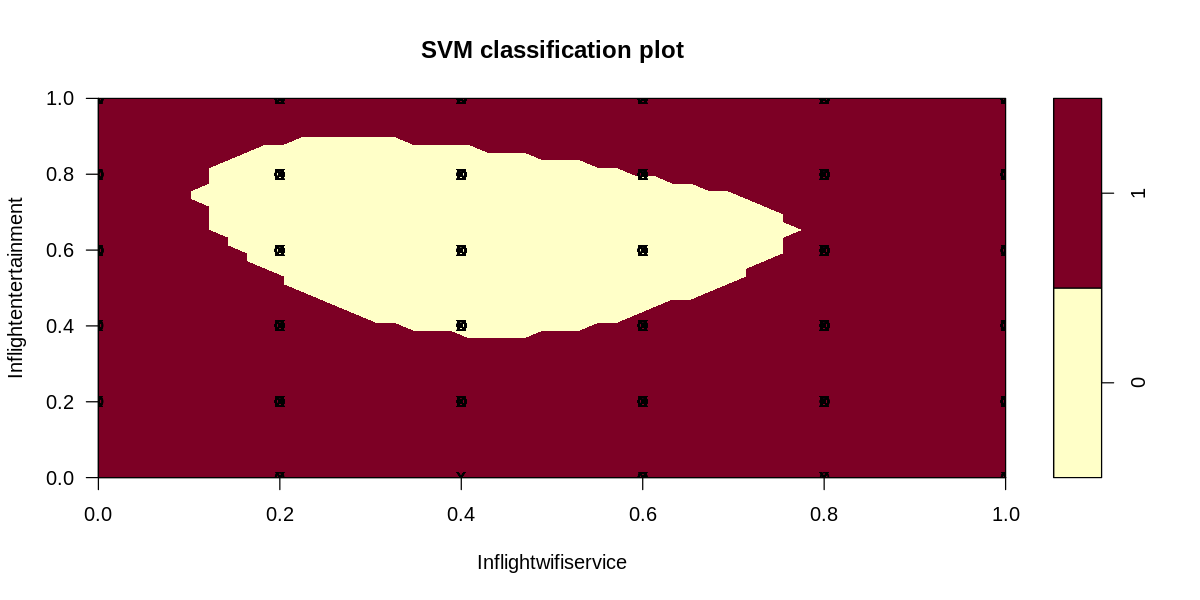

Baggagehandling ~ Inflightwifiservice


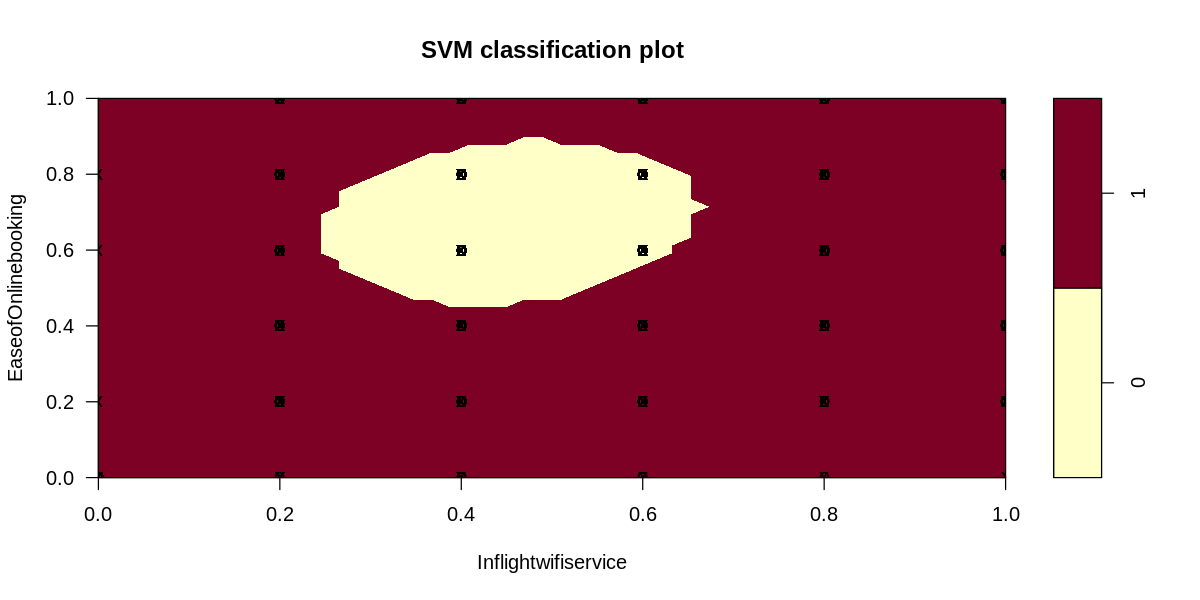

Cleanliness ~ Inflightwifiservice


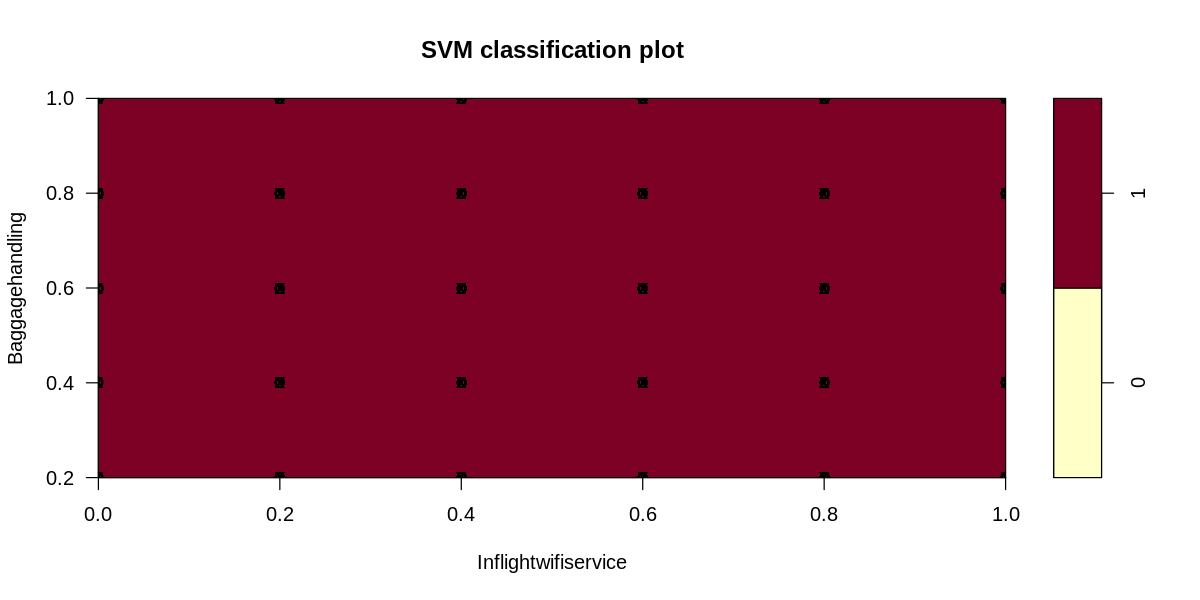

Seatcomfort ~ Inflightentertainment


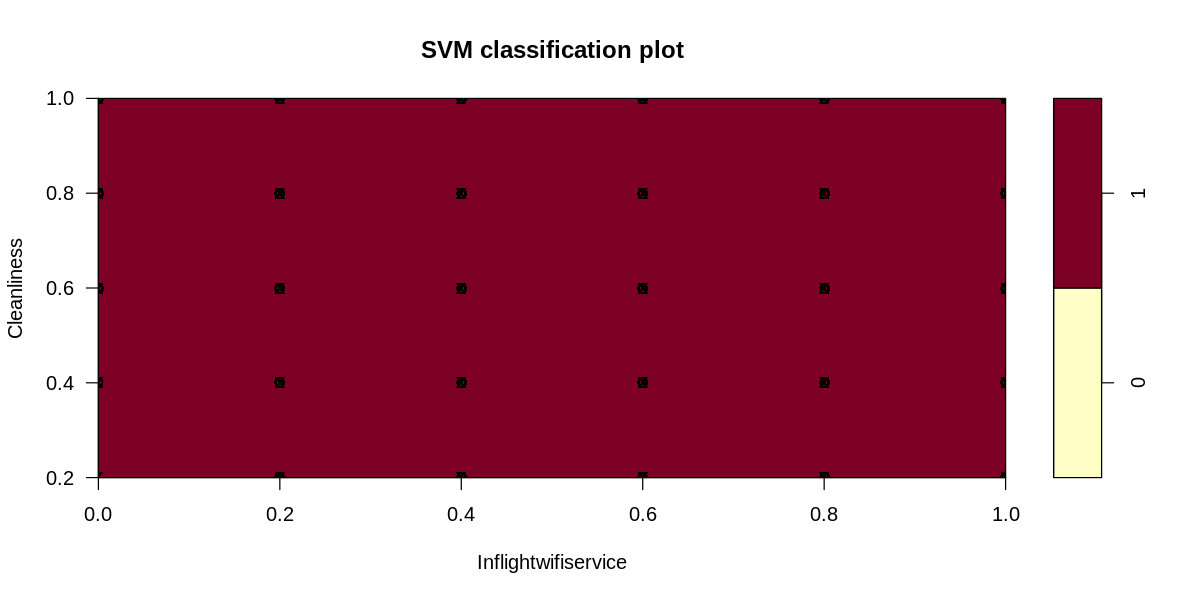

Inflightwifiservice ~ Inflightentertainment


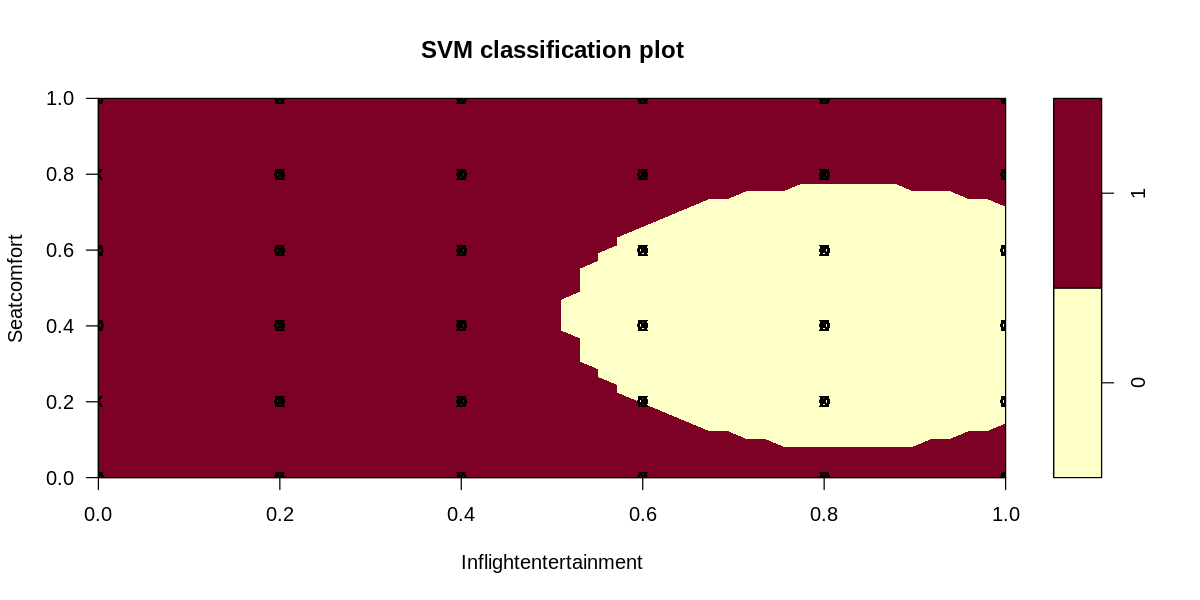

EaseofOnlinebooking ~ Inflightentertainment


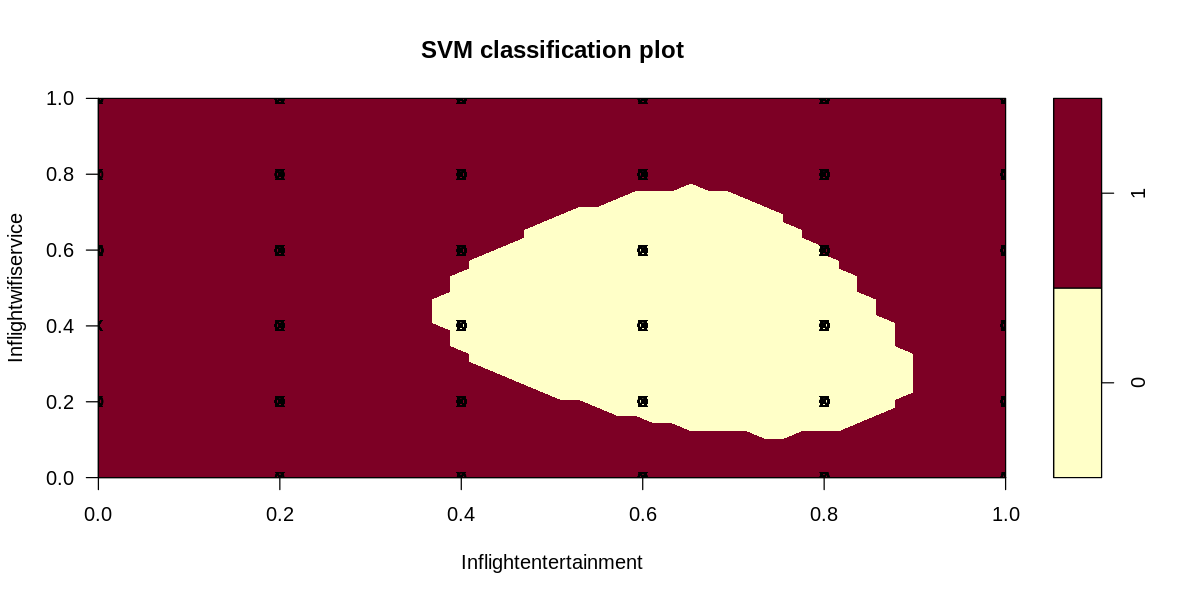

Baggagehandling ~ Inflightentertainment


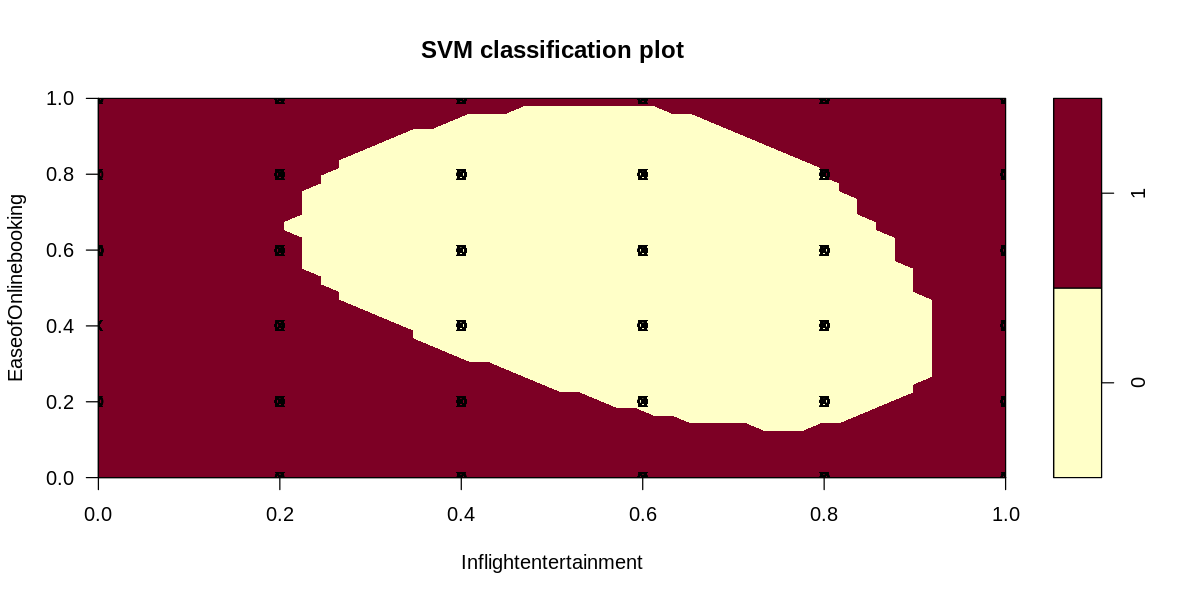

Cleanliness ~ Inflightentertainment


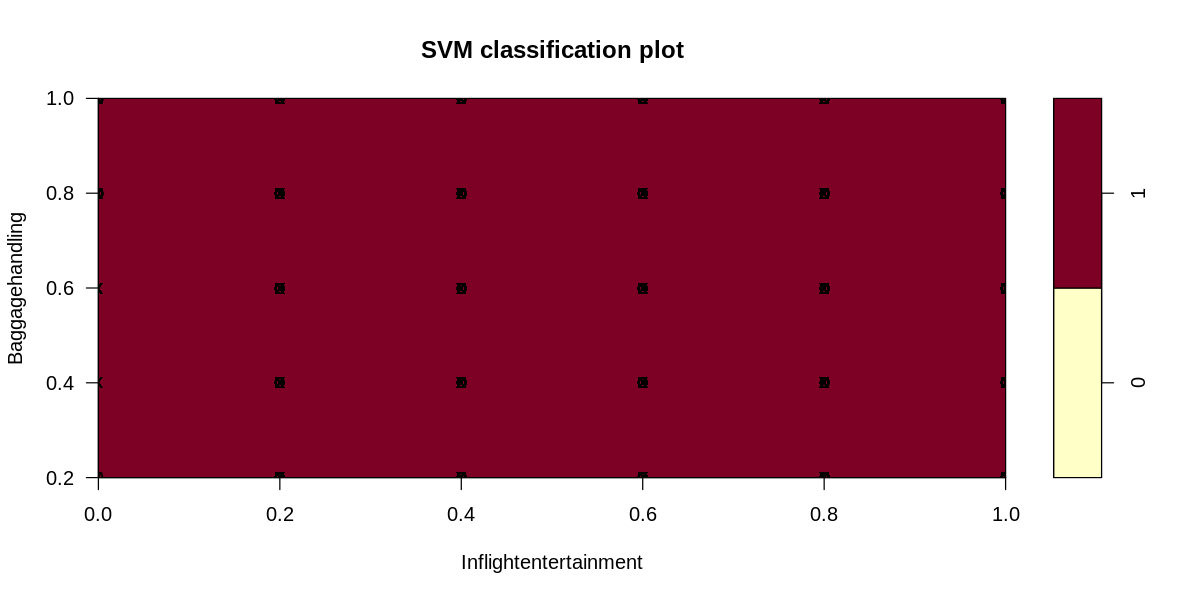

Seatcomfort ~ EaseofOnlinebooking


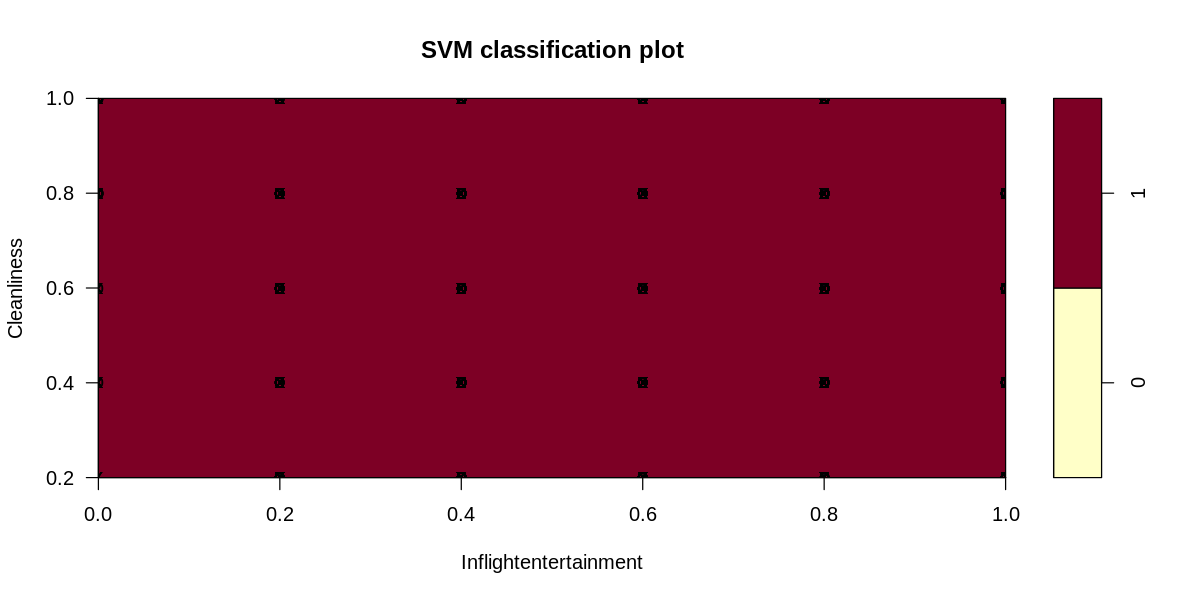

Inflightwifiservice ~ EaseofOnlinebooking


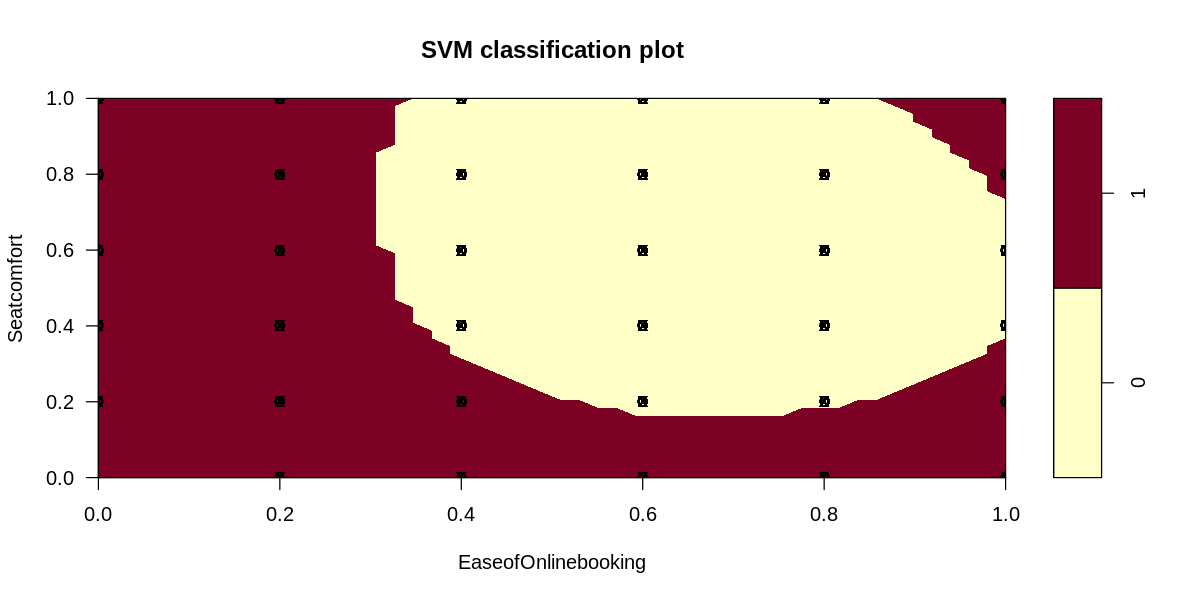

Inflightentertainment ~ EaseofOnlinebooking


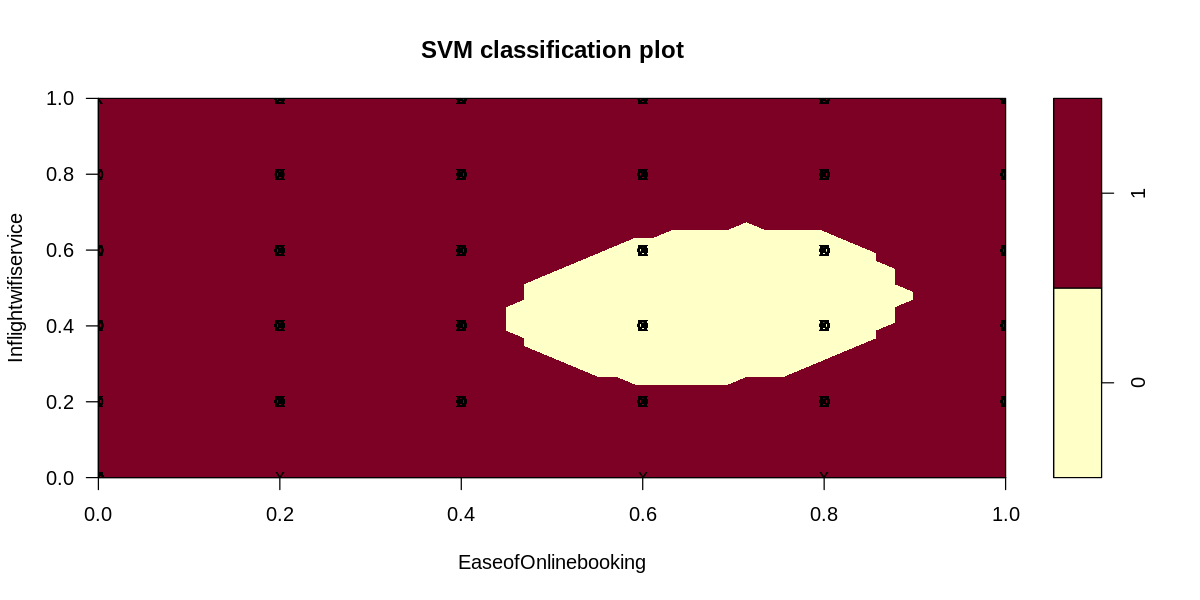

Baggagehandling ~ EaseofOnlinebooking


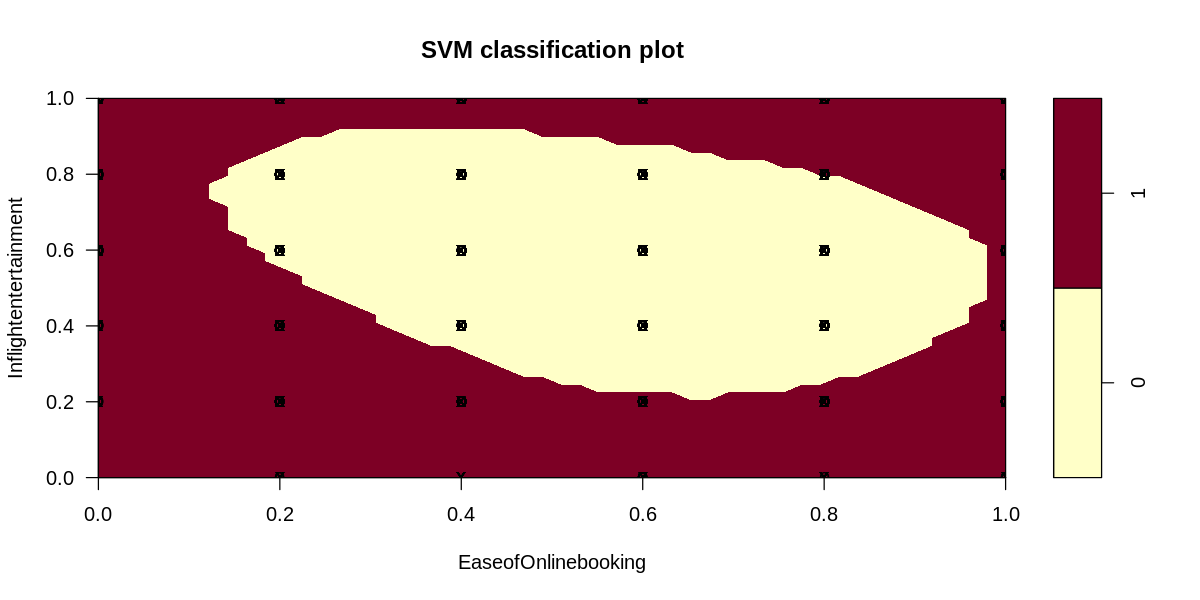

Cleanliness ~ EaseofOnlinebooking


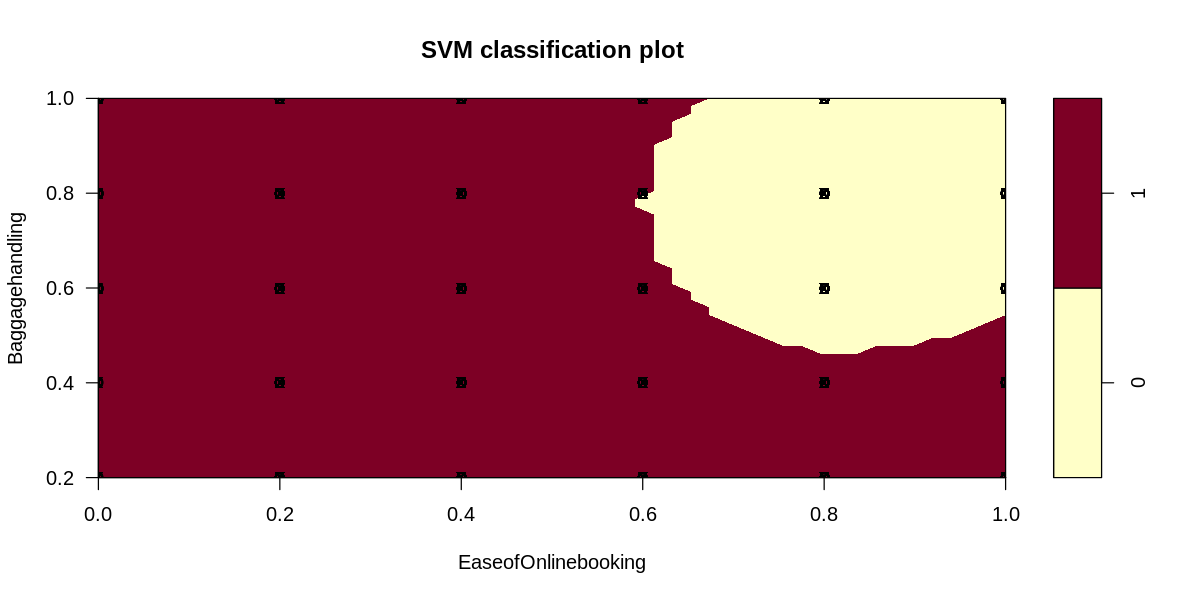

Seatcomfort ~ Baggagehandling


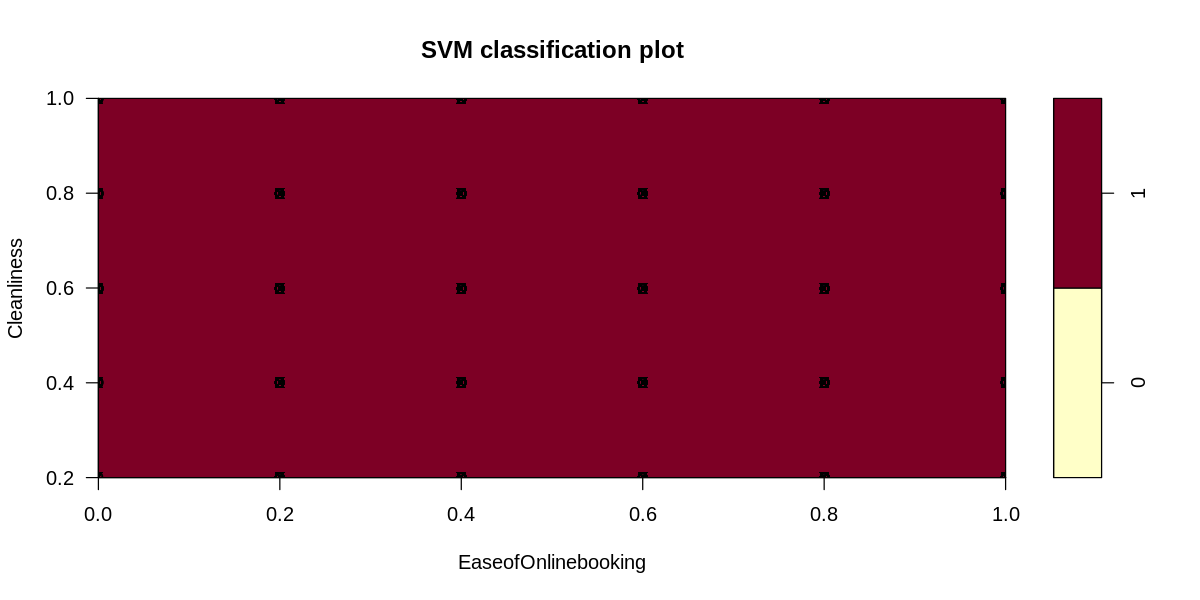

Inflightwifiservice ~ Baggagehandling


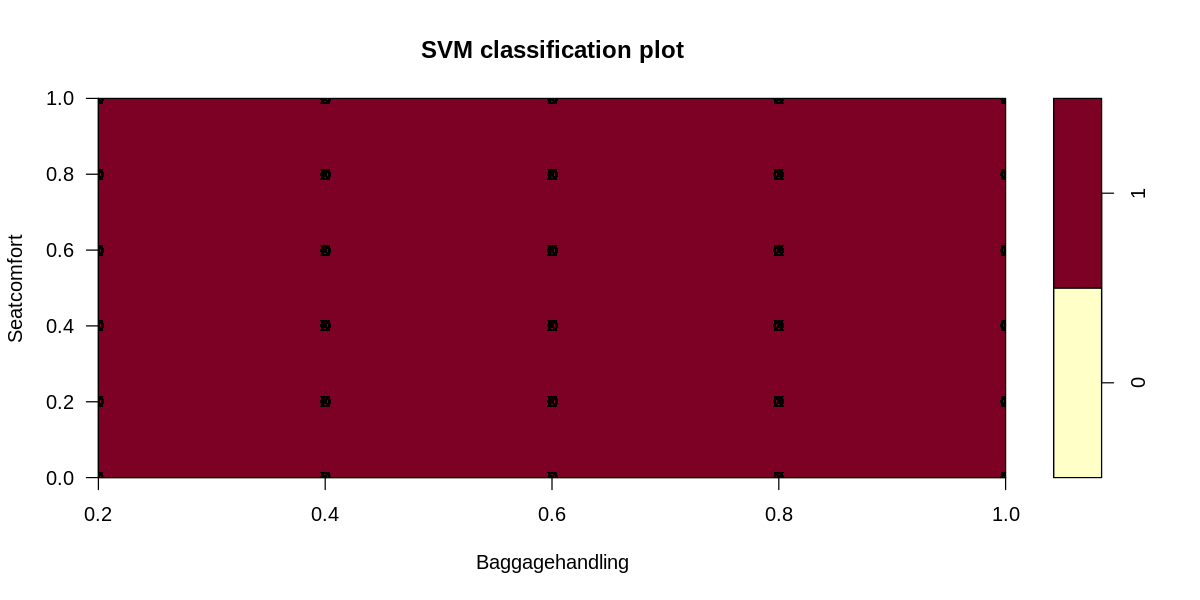

Inflightentertainment ~ Baggagehandling


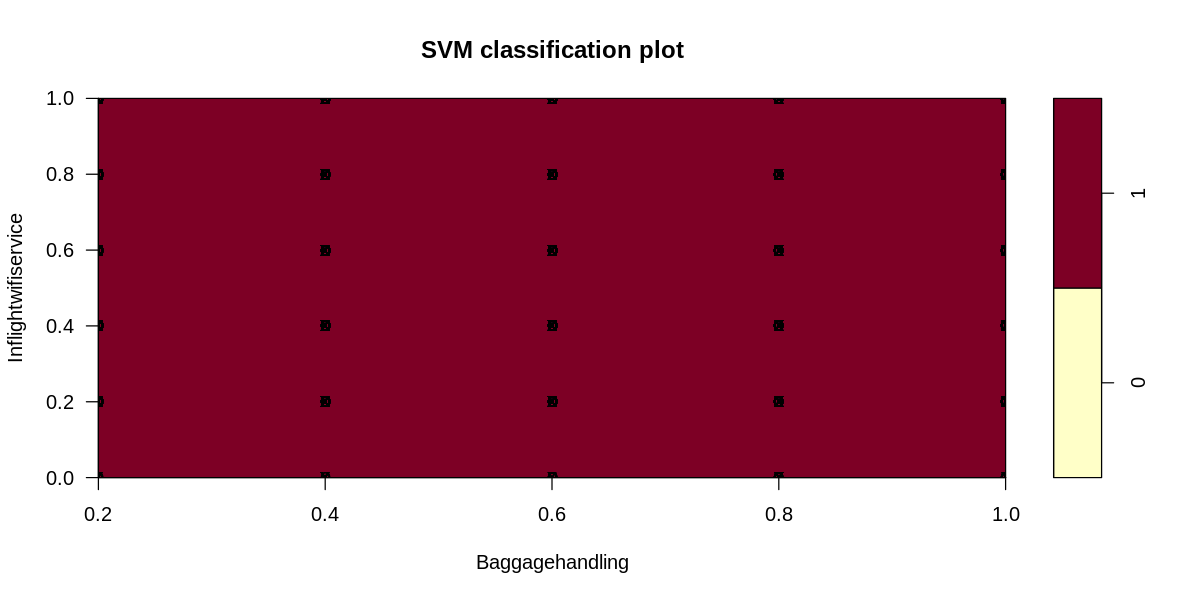

EaseofOnlinebooking ~ Baggagehandling


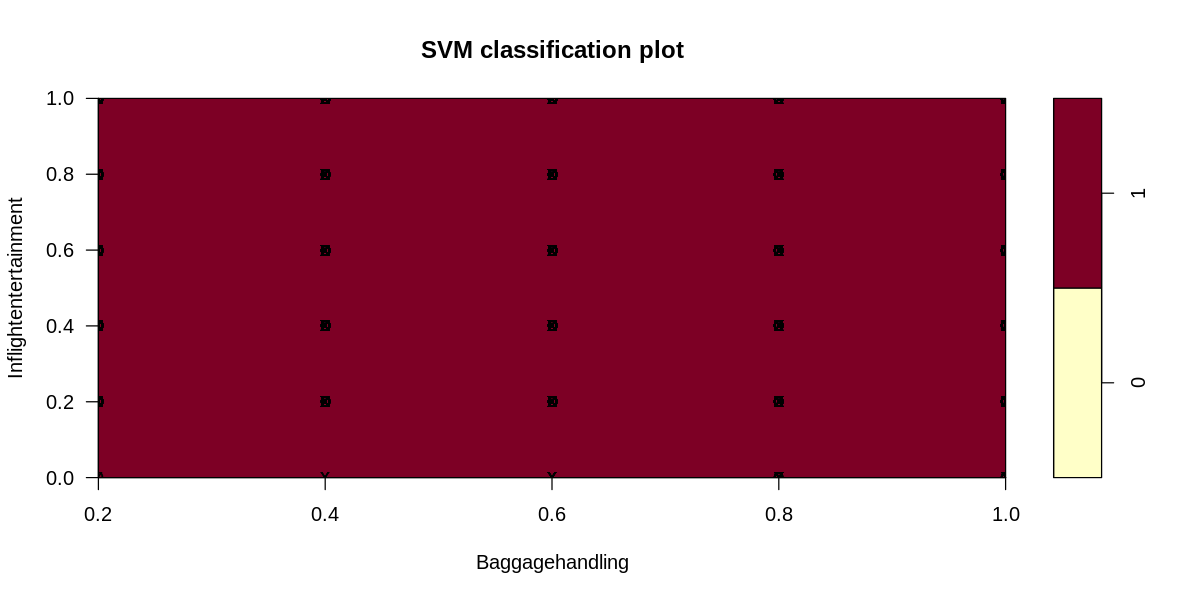

Cleanliness ~ Baggagehandling


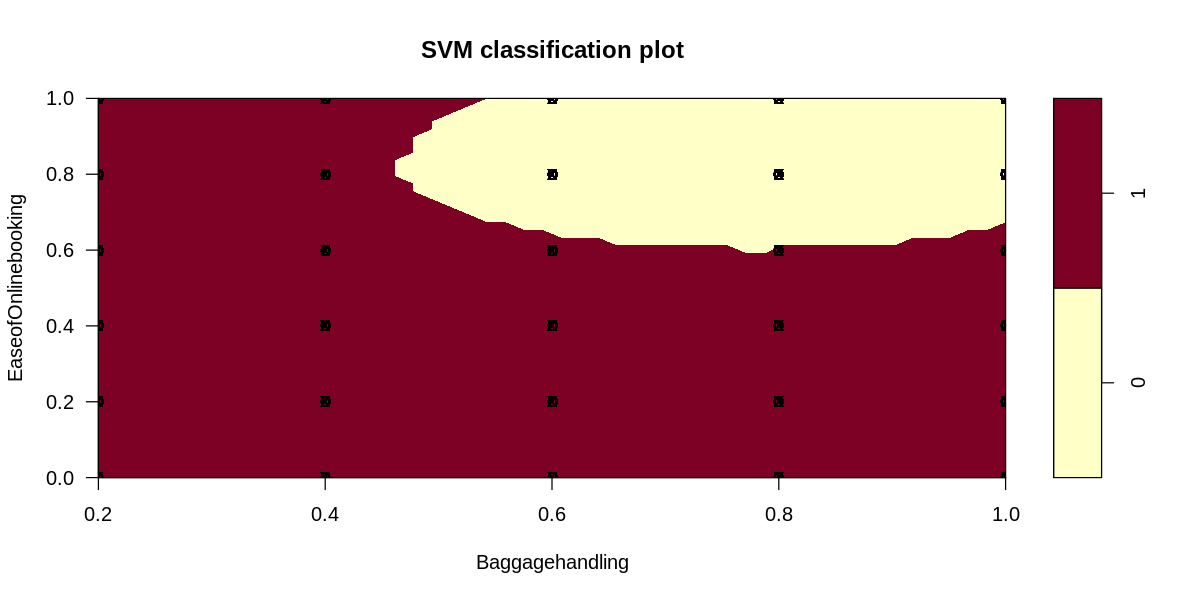

Seatcomfort ~ Cleanliness


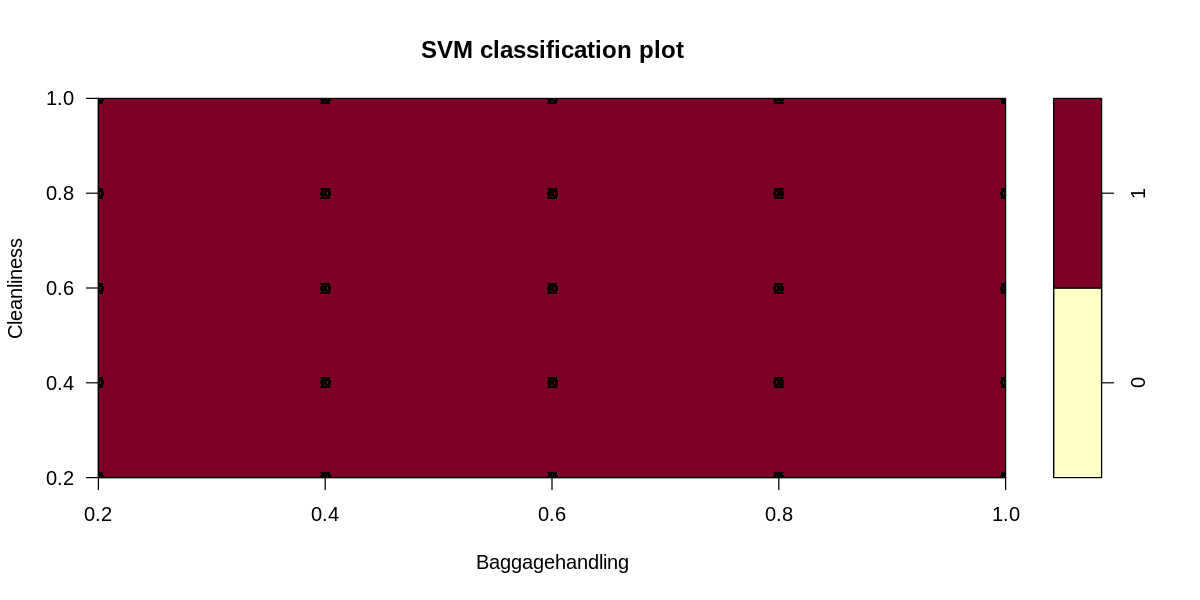

Inflightwifiservice ~ Cleanliness


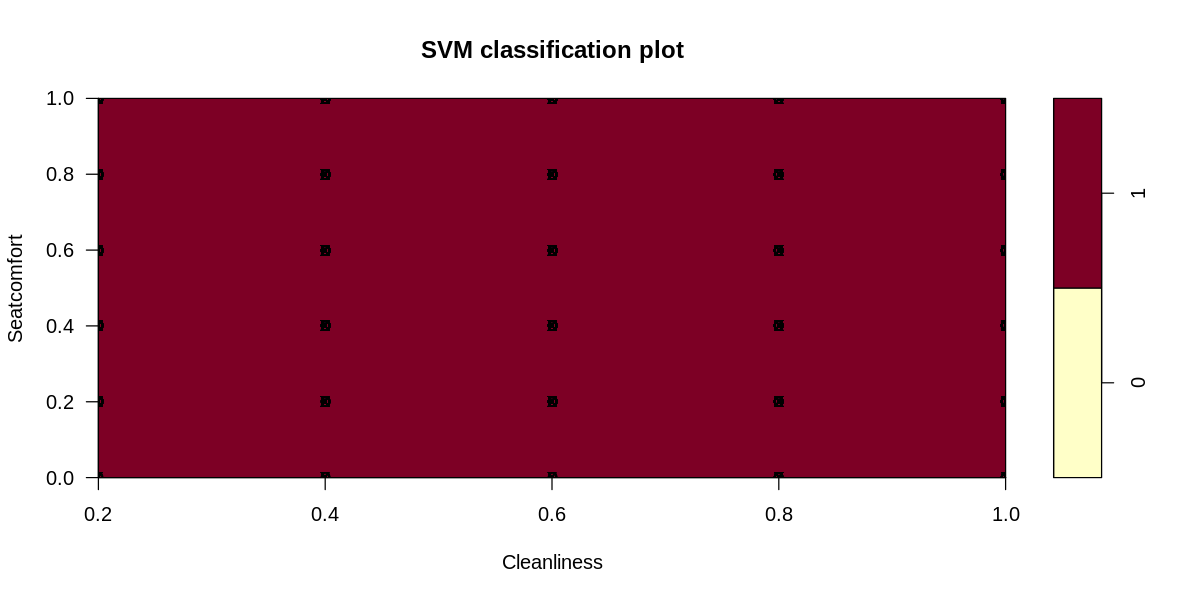

Inflightentertainment ~ Cleanliness


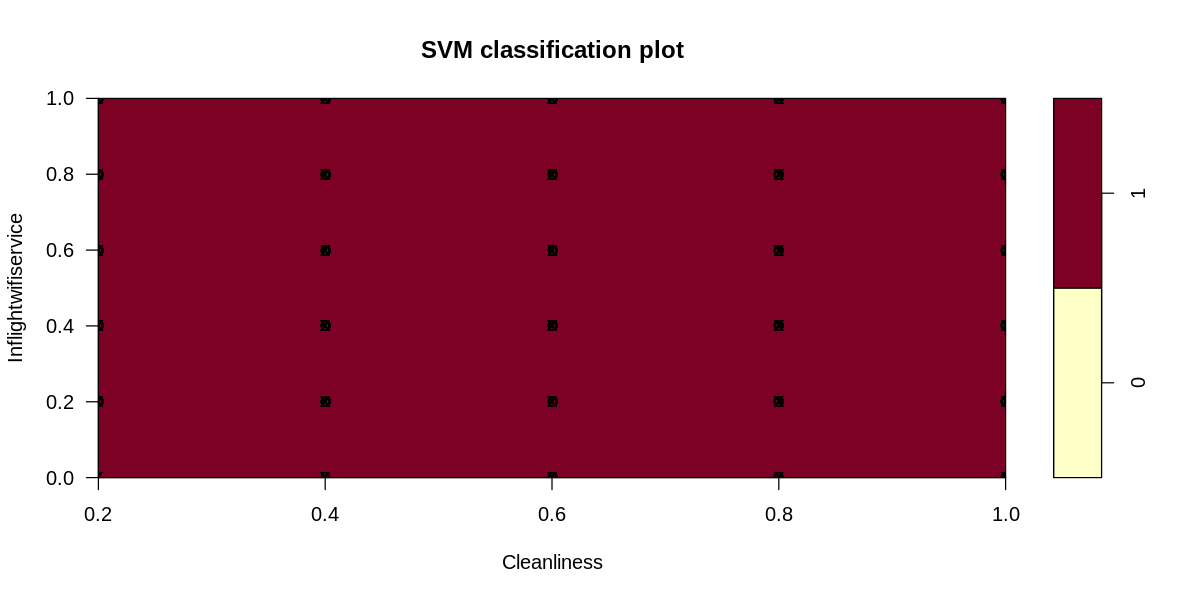

EaseofOnlinebooking ~ Cleanliness


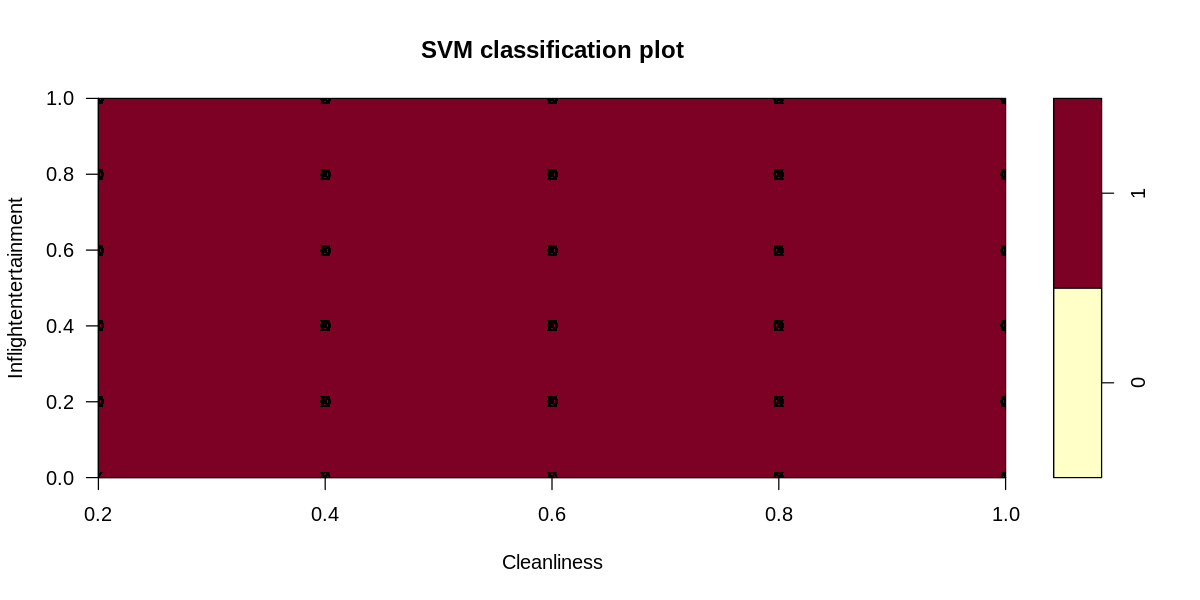

Baggagehandling ~ Cleanliness


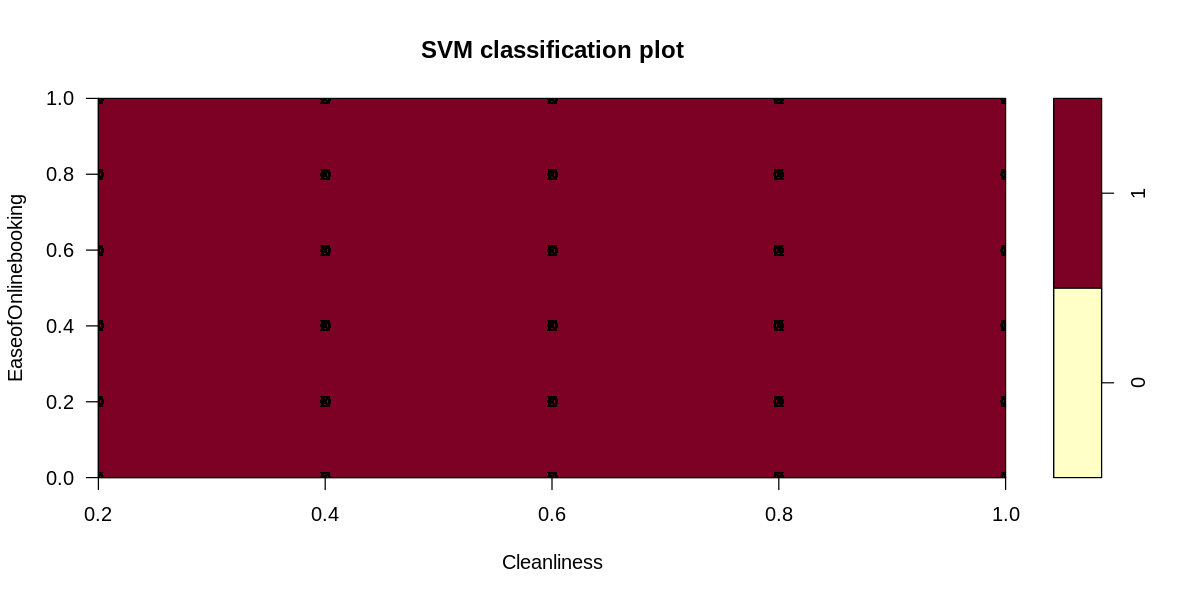

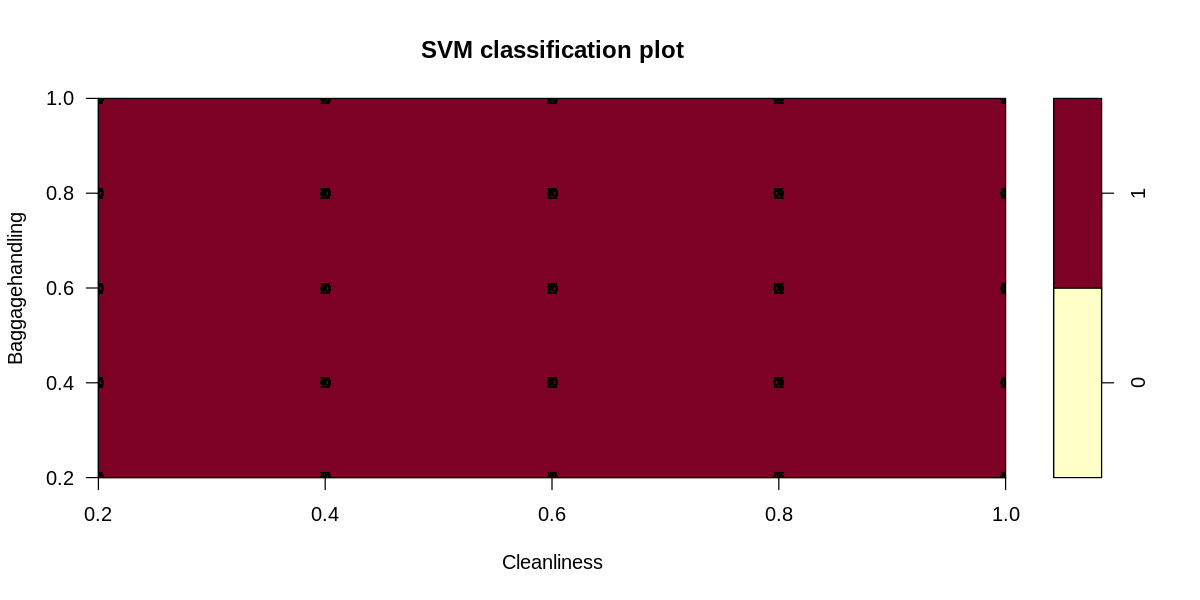

In [125]:
for(i in names(svm_training[-1])){
    for(j in names(svm_training[-1])){
        if(i==j){
            
        }else{
        print(as.formula(paste(paste(j,'~'),i)))
        plot(classifier,svm_training,as.formula(paste(paste(j,'~'),i)))
        }
    }
    
}
# plot(classifier, dummy, Gender~Age) #Ok
# plot(classifier, dummy, CustomerType~DepartureArrivaltimeconvenient) #Ok

## Naive Bayes Classifier

In [65]:

x_test = testing_data[,-1]
y_test = testing_data[,1]
classifier_cl <- naiveBayes(formula, data = training_data )
classifier_cl



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.5100147 0.4899853 

Conditional probabilities:
   Age
Y        [,1]      [,2]
  0 0.4182325 0.2218655
  1 0.4708852 0.1868883

   DepartureArrivaltimeconvenient
Y        [,1]      [,2]
  0 0.6171992 0.3008752
  1 0.5942017 0.3094969

   Foodanddrink
Y        [,1]      [,2]
  0 0.5655887 0.2617483
  1 0.6476031 0.2916876

   Inflightwifiservice
Y        [,1]      [,2]
  0 0.5259389 0.2353528
  1 0.6722038 0.2827116

   Inflightentertainment
Y        [,1]      [,2]
  0 0.5532031 0.2467349
  1 0.7997665 0.2283456

   EaseofOnlinebooking
Y        [,1]      [,2]
  0 0.5373605 0.2525646
  1 0.7121836 0.2797842


In [66]:
# Predicting on test data'
y_pred <- predict(classifier_cl, newdata = x_test)

In [67]:
# Confusion Matrix
cm <- table(y_test, y_pred)
cm
 
# Model Evaluation
confusionMatrix(cm)

      y_pred
y_test     0     1
     0 28547 10961
     1  8954 29466

Confusion Matrix and Statistics

      y_pred
y_test     0     1
     0 28547 10961
     1  8954 29466
                                          
               Accuracy : 0.7444          
                 95% CI : (0.7414, 0.7475)
    No Information Rate : 0.5188          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4892          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7612          
            Specificity : 0.7289          
         Pos Pred Value : 0.7226          
         Neg Pred Value : 0.7669          
             Prevalence : 0.4812          
         Detection Rate : 0.3663          
   Detection Prevalence : 0.5070          
      Balanced Accuracy : 0.7451          
                                          
       'Positive' Class : 0               
                                     

In [68]:
length(y_pred)

[1] 77928

In [69]:
length(y_test)

[1] 77928